In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
from PIL import Image
from io import BytesIO
import base64
import json

In [2]:
ratio = 32
org_img_sz = np.array([78911,50560])
outsize = org_img_sz.T//(ratio)

In [3]:
def blank_img(image):
    image_rgb_blank = np.zeros(image.tolist()+[3],np.uint8)
    return image_rgb_blank

In [4]:
def hex_to_rgb(hexa):
    return tuple(int(hexa[i:i+2], 16)  for i in (0, 2, 4))

In [5]:
def fill_canvas(data,blank_img):
    # print(data['features'])
    for feature in data['features']:
        parts = feature['geometry']['coordinates']

        color = feature['properties']['data']['color_hex_triplet']
        color = hex_to_rgb(color)
#         print(feature['properties']['data']['text'],color,len(parts))
        for part in parts:
    #         outer = []
    #         inners = []
    #         if len(part)==1:
    #             outer = part
    #         else:
    #             outer = part[0]
    #             inners = part[1:]

    #         print(1,len(inners))
    #         print(outer)
    #         print(inner)
            part = apply_correction(part, 270, 50560, 78911)
            outer_np = np.squeeze(np.array(part))
            outer_np = np.vstack((outer_np))
            outer_np/=(ratio)
            outer_np = np.abs(outer_np).astype(int)
            image_580 = np.ascontiguousarray(blank_img, dtype=np.uint8)
            print(outer_np)
            img_fill = cv2.fillPoly(image_580, [outer_np],color )
#         plt.imshow(img_fill)
    return img_fill

In [6]:
def rgb_rgba(img):
    img = Image.fromarray(img)
#      plt.imshow(colorimg)
    k1 = img.convert('RGBA')
#     print(np.asarray(k1).shape)
    return np.asarray(k1)

In [7]:
def str_mask(img):
    data = Image.fromarray(np.asarray(img))
    byte_io = BytesIO()
    data.save(byte_io, 'PNG')
    encoded = base64.b64encode(byte_io.getvalue()) 
    return [{'image_mask':str(encoded)}]
    

In [8]:
data=json.load(open('fetalAtlas_580.json'))

In [9]:
data['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-3718.8901400663162, -60846.525596064566],
    [-3542.12951215684, -60707.98348229768],
    [-3241.158713283963, -60545.554797191675],
    [-2558.002772985201, -60101.26457028409],
    [-2476.7884304321997, -60053.49142760586],
    [-2247.47734557667, -59924.50394237463],
    [-1803.1871186690842, -60301.91176953268],
    [-1005.3756359425606, -60569.4413685308],
    [-498.98032355325995, -61028.063538241855],
    [1794.1305250020232, -61983.526391806554],
    [3628.619203846254, -62862.552217086086],
    [5491.771768297425, -63493.15770043879],
    [6982.293819858358, -64353.074268647026],
    [9265.850039877965, -65279.873236604784],
    [10345.52306440608, -65757.60466338712],
    [10431.514721226904, -65977.361119707],
    [10679.935063153727, -65967.80649117136],
    [11472.969231612431, -66130.23517627735],
    [14702.433676661127, -67276.79060055499],
    [18056.108292673234, -69407.47276400428],
    [20769

In [10]:
def apply_correction(pts,rot,jp2_wid,jp2_hei):
    if rot==270:
        theta = -90*np.pi/180
    elif rot==90:
        theta = 90*np.pi/180
    elif rot==180:
        theta = np.pi
#     elif rot == 0:
#         theta = 0

    c,s = np.cos(theta), np.sin(theta)

    # x' = x c - y s
    # y' = x s + y c

    org = np.array([jp2_wid/2,-jp2_hei/2])

    pts_rot = []
    for pt in pts:
        x,y = pt-org
        x_ = x*c-y*s+org[0]
        y_ = x*s+y*c+org[1]
        pts_rot.append([x_,y_])

    pts_rot = np.array(pts_rot)
    return pts_rot 


In [11]:
data = {"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[-4839.170047213687,-37296.326550221056],[-4359.633066849696,-37443.43901662401],[-3900.370226136307,-39081.425589138584],[-5437.756982650797,-39959.911524732845],[-7905.89283977919,-39722.07396337086],[-8640.732781840321,-39004.71558574468],[-10698.86153996567,-35911.46545128472],[-10365.468451366563,-31855.99604256871],[-4852.215572531917,-26285.762715134893],[518.2952310085093,-21558.115947986917],[6581.289860831086,-17204.345892340094],[12433.391665897747,-14381.965893906527],[17229.253838906618,-12718.939405862431],[23109.878196472448,-12265.935613234535],[34665.7545808803,-13349.907028251168],[41292.22754037191,-17703.80639669633],[51428.04383054713,-27825.095338650146],[53604.86420197139,-37201.32644821853],[50957.29984788758,-45871.207840025345],[41854.52716210556,-51713.97950890684],[33869.76893787145,-48828.83994224532],[32223.30393192365,-45408.74459841395],[30677.192557291455,-43974.94792550026],[27238.695566686423,-44092.78312125085],[27276.418942572425,-47226.47423215513],[23878.405574869445,-50707.295010339585],[18740.934228612503,-49393.173697853854],[17466.50576948849,-45127.731546720606],[17743.709179028752,-42754.6750115602],[15750.049849401606,-42243.57671879693],[13115.49596085772,-39294.031388427604],[12347.56538280355,-32652.772455117898],[15346.859815860931,-27800.785259449374],[18099.313556554596,-27844.093785766643],[16709.74549229686,-26714.18291021503],[16297.225322571016,-24196.54413508305],[12697.58460989812,-23628.336080922272],[10725.022517661499,-31219.895864542887],[4607.678373457449,-37408.94177476504],[1020.9188135261138,-37910.77458774231],[-3805.30607665929,-37051.56188896101],[-4073.0139858288894,-33863.3074071904],[-1114.2839961725185,-33579.25187240938],[2454.7316505395866,-34778.47976444585],[8908.007341510667,-28380.720361379303],[8736.775041916873,-23681.563818530914],[12830.03248291806,-20803.914223377196],[20572.155041711696,-22583.55742466179],[20916.95217494558,-29000.582339304674],[25218.277537287475,-30706.982010065214],[28089.091171300242,-27882.269477585356],[36050.35496769835,-31990.772933573986],[37606.52259165688,-40610.049796753236],[43520.48450646641,-45278.29663952255],[48474.794810926265,-37727.28513520314],[45156.10249354753,-28747.012713264307],[38733.161700102384,-22250.271363527],[23160.524021602367,-17698.29566666831],[13845.08300278624,-18574.86061708624],[36.68086958546337,-27226.21104932105],[-8072.482439568383,-33057.02164779966],[-7272.744364430444,-35990.433209042465],[-4839.170047213687,-37296.326550221056]]]},"properties":{"data":{"text":"brain","acronym":"Br","color_hex_triplet":"E0E0E0","failed_facet":734881840,"graph_order":2,"id":10155,"name":"brain","parent_structure_id":10154,"safe_name":"brain","st_level":None,"structure_id_path":"/10153/10154/10155/","structure_name_facet":3016132225}},"id":"4537"}],"rotation":90}

## FB 40 580 

In [12]:
data = '"{\\"type\\": \\"FeatureCollection\\", \\"features\\": [{\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[22721.495383285248, -34509.09341848034], [22606.839840857487, -32884.806567420346], [23332.991609566656, -32158.65479871117], [25664.320972264533, -31069.42714564741], [26963.75045311253, -30534.367947651175], [28702.692846600286, -30037.52726379753], [30709.164839086166, -30553.47720472247], [31893.938777506395, -31298.73823050294], [32486.32574671651, -32101.327027497297], [32983.166430570156, -33438.97502248788], [33976.84779827744, -35063.261873547875], [34435.4699679885, -36286.25432611069], [34799.42770589629, -37376.54715788252], [34845.25919323385, -38097.30623819036], [34506.76456400144, -39056.218857543085], [34482.184013326376, -39335.56516472463], [33839.2620300458, -41203.697261245965], [33521.186621864814, -42034.00011177757], [32604.35703532146, -43472.96219125283], [33078.71271592664, -41197.33339343328], [32161.46837650452, -42286.56104649704], [31129.56849465464, -43624.209041487615], [30326.97969766028, -44235.70526776903], [28396.944733459575, -44465.01635262456], [26868.204167756056, -44293.03303898291], [25435.009887409004, -43318.46092834692], [24403.110005559123, -41197.33339343328], [23963.597092919357, -38885.11328780669], [23259.710677729956, -36720.79729376837], [22950.80646814077, -36114.27101246905], [22721.495383285248, -34509.09341848034]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"thalamus\\", \\"acronym\\": \\"THM\\", \\"color_hex_triplet\\": \\"E4CCE3\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 1926, \\"id\\": 10390, \\"name\\": \\"thalamus\\", \\"parent_structure_id\\": 10389, \\"safe_name\\": \\"thalamus\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10389/10390/\\", \\"structure_name_facet\\": 853172498}}, \\"id\\": \\"221295\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[33081.69273731022, -41192.89528816572], [32661.28908174175, -43371.35059429324], [32451.087253957514, -44250.37641957276], [31400.07811503634, -45779.11698527629], [31380.968857965046, -45798.226242347584], [30807.691145826226, -46467.05023984288], [28591.017325556128, -49428.98508589345], [28342.596983629297, -49677.40542782028], [27501.789672492367, -50193.35536874522], [27425.352644207178, -50212.464625816516], [27279.491546874928, -50227.56841687718], [27329.80635885071, -50097.80908338875], [27463.571158349765, -49906.716512675805], [27578.22670077753, -49276.1110293231], [27253.369330565532, -48626.39628889911], [27062.27675985259, -47900.24452018993], [26622.763847212824, -47174.092751480755], [26145.03242043047, -46658.142810555815], [25877.502821432354, -46600.815039341935], [25590.863965362943, -46543.487268128054], [25380.662137578714, -47365.1853221937], [25667.300993648125, -48225.10189040193], [25973.04910678883, -49199.67400103793], [25660.27045975047, -48818.03060962838], [25266.006595150946, -48416.19446111487], [24960.258482010242, -48186.88337625934], [24616.29185472695, -47670.9334353344], [23890.140086017775, -46830.12612419746], [22800.912432954014, -46218.62989791605], [22648.038376383658, -46237.73915498734], [22533.382833955897, -45435.150357993], [23862.9999976166, -41519.272573119146], [24081.232656730717, -39473.06215174925], [24310.543741586247, -40753.38237552595], [24406.090026942715, -41192.89528816572], [25437.989908792595, -43314.02282307936], [26871.184189139647, -44288.59493371535], [28399.924754843174, -44460.578247357], [30329.959719043873, -44231.26716250147], [31132.548516038223, -43619.770936220055], [32164.448397888104, -42282.12294122948], [32317.32245445846, -42091.030370516535], [33081.69273731022, -41192.89528816572]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"nucleus of the field of Forel\\", \\"acronym\\": \\"FF\\", \\"color_hex_triplet\\": \\"B67BB4\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2033, \\"id\\": 10462, \\"name\\": \\"nucleus of the field of Forel\\", \\"parent_structure_id\\": 10461, \\"safe_name\\": \\"nucleus of the field of Forel\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10389/10390/10461/10462/\\", \\"structure_name_facet\\": 2193206164}}, \\"id\\": \\"39754\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[20504.794214181333, -47046.96180505248], [20695.886784894275, -46712.54980630483], [20886.41731863453, -46502.3479785206], [21459.69503077335, -46330.36466487895], [22797.343025763934, -46225.26375098684], [23896.12530736334, -46827.2053487326], [24612.72244753687, -47677.56728840518], [24956.689074820162, -48183.962600794475], [25262.437187960866, -48413.273685650005], [25639.84501511893, -48814.56808414718], [25978.537435203565, -49207.43476164284], [26093.986881158493, -49620.785906984], [25875.561419513822, -49644.87578861994], [25680.59375033902, -49862.46087031622], [25626.959745082702, -50189.49715667431], [25657.159572995897, -50316.29337962369], [25355.900373077533, -50180.40772472561], [24916.906128364953, -49990.56774046793], [24579.36181828492, -49769.8430109385], [24455.79382652407, -49549.89890586809], [24255.502411505702, -49093.93247162447], [23925.866713321935, -48534.60638086034], [23647.952491097603, -47830.98202941702], [22552.901378924682, -47471.98305105272], [21587.88389682433, -47491.09230812401], [21110.152470041976, -47491.09230812401], [20546.429386438802, -47395.54602276754], [20504.794214181333, -47046.96180505248]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"substantia nigra\\", \\"acronym\\": \\"SN\\", \\"color_hex_triplet\\": \\"6CA9BF\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2532, \\"id\\": 12251, \\"name\\": \\"substantia nigra\\", \\"parent_structure_id\\": 12195, \\"safe_name\\": \\"substantia nigra\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10648/10649/12195/12251/\\", \\"structure_name_facet\\": 2130000243}}, \\"id\\": \\"32978\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[20460.02844172049, -34514.20994174844], [19594.985429888948, -33941.41649467714], [17875.152293472478, -33702.55078128596], [17101.227382085068, -33826.76095224937], [16613.94132676707, -33979.63500881972], [16183.983042662956, -34342.71089317431], [15457.83127395378, -34925.54323384878], [14569.250820138608, -35460.60243184501], [13957.754593857197, -35814.123687663945], [13231.602825148024, -36349.18288566018], [12667.879741544846, -36941.56985487031], [12190.148314762497, -37686.83088065077], [12094.602029406025, -37782.37716600724], [12772.980655436964, -38584.965963001596], [16001.674682615994, -40449.34974909244], [17625.96153367599, -40067.16460766656], [19651.542783233162, -39245.46655360091], [21634.12205328467, -39484.09432394299], [22384.683143539216, -40462.8341056965], [22515.281049873825, -39897.88224250537], [21934.688203956728, -38372.99955248874], [21312.11360105915, -37204.30687687398], [21113.347607963748, -36831.18474948437], [20888.892417397474, -36422.49928389016], [20502.14453941959, -34689.4129081767], [20460.02844172049, -34514.20994174844]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"superior colliculus\\", \\"acronym\\": \\"SC\\", \\"color_hex_triplet\\": \\"7EB3C9\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2574, \\"id\\": 12292, \\"name\\": \\"superior colliculus\\", \\"parent_structure_id\\": 12291, \\"safe_name\\": \\"superior colliculus\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10648/10649/12291/12292/\\", \\"structure_name_facet\\": 3855155085}}, \\"id\\": \\"144641\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[22609.81986224107, -32880.368462152794], [21778.56717963978, -33577.85634525503], [20918.65061143155, -34170.243314465144], [20460.02844172049, -34514.20994174844], [20937.759868502842, -36501.57267716302], [21945.884204650574, -38416.1922171311], [21999.21379914927, -38551.65008673453], [22431.126736736827, -39649.844279954756], [22504.484122577014, -39862.230570419364], [22624.51794024274, -39969.56048673908], [22982.45037513131, -40667.39071870512], [23527.06420166319, -42520.988654620654], [23861.476200410834, -41517.752658377714], [23871.03082894648, -41450.87025862819], [24043.01414258813, -39807.4741504969], [24062.123399659424, -39387.070494928426], [23507.954944591896, -37476.144787799014], [23259.534602665073, -36721.329133482905], [22953.786489524362, -36109.83290720149], [22724.47540466884, -34504.65531321279], [22628.929119312364, -33252.998975043025], [22609.81986224107, -32880.368462152794]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"pretectal region\\", \\"acronym\\": \\"PTR\\", \\"color_hex_triplet\\": \\"A0C7D5\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2461, \\"id\\": 12181, \\"name\\": \\"pretectal region\\", \\"parent_structure_id\\": 10649, \\"safe_name\\": \\"pretectal region\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10648/10649/12181/\\", \\"structure_name_facet\\": 3557876670}}, \\"id\\": \\"46167\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[12577.459899811689, -44145.27550568065], [14994.780919330387, -46877.8992668757], [17135.017711315322, -49037.24531593193], [19141.489703801202, -50995.944165739566], [19189.262846479443, -50107.363711924394], [19179.70821794379, -49954.489655354046], [19170.15358940814, -49295.2202863944], [18950.397133088256, -48559.51388914957], [19399.46467426367, -47470.28623608581], [19829.422958367788, -46858.790009804405], [20278.490499543193, -46428.831725700285], [20488.69232732743, -46495.71412544981], [20889.98672582461, -46505.26875398547], [20880.43209728896, -46505.26875398547], [20889.98672582461, -46505.26875398547], [21463.26443796343, -46333.28544034382], [22485.609691277663, -46247.293783523], [22653.726571994535, -46254.19812803151], [22619.374490776718, -46008.42807013182], [22533.382833955897, -45435.150357993], [23479.29105898495, -42645.19882558406], [23364.635516557188, -41966.82019955313], [22982.45037513131, -40667.39071870512], [22609.81986224107, -39960.34820706725], [22514.273576884603, -39893.46580731771], [22514.273576884603, -39912.57506438901], [22380.50877738554, -40466.74351945654], [21635.24775160508, -39482.616780284894], [21434.60055235649, -39463.5075232136], [19647.885016190492, -39243.75106689372], [17622.303766633322, -40065.44912095937], [16170.000229214973, -40409.41574824265], [16016.506023250564, -40454.663584526934], [15978.907658502034, -40514.516662134774], [15529.840117326621, -42033.70259930265], [15329.192918078035, -43084.71173822382], [13934.217151873567, -43705.76259304088], [12997.863555380158, -44001.95607764594], [12577.459899811689, -44145.27550568065]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"midbrain tegmentum\\", \\"acronym\\": \\"MTg\\", \\"color_hex_triplet\\": \\"5298AE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2474, \\"id\\": 12195, \\"name\\": \\"midbrain tegmentum\\", \\"parent_structure_id\\": 10649, \\"safe_name\\": \\"midbrain tegmentum\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10648/10649/12195/\\", \\"structure_name_facet\\": 824690733}}, \\"id\\": \\"159552\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[20636.78906962996, -47412.95846487193], [20460.02844172049, -47651.82417826311], [20340.5955850249, -47890.689891654285], [20536.465470005664, -48392.30788977575], [20675.007583772545, -48726.719888523396], [20932.982554235015, -48793.60228827293], [21348.60889553566, -48879.59394509375], [21783.344493907607, -49003.80411605716], [22232.412035083013, -49003.80411605716], [22734.030033204486, -48841.375430951164], [23025.446203541716, -48827.04348814769], [23297.75311680766, -48936.92171630763], [23512.732258859716, -49214.005943841395], [23670.383629697903, -49538.86331405339], [23856.698886143018, -49815.94754158716], [24214.997456229776, -50116.91834046004], [24664.064997405196, -50351.00673958339], [25442.767223060426, -50742.74650954492], [25796.288478879364, -50804.85159502663], [26001.712992395773, -50737.969195277095], [26011.267620931427, -50742.74650954492], [26001.712992395773, -50737.969195277095], [25667.30099364813, -50374.89331092251], [25662.52367938031, -50341.45211104775], [25367.26116457691, -50191.17835795114], [24955.16421280275, -50020.320236663545], [24588.571358239864, -49777.11349791034], [24464.179327232418, -49565.39209679436], [24261.245020650727, -49112.09822466734], [23952.245171499482, -48626.39628889911], [23832.812314803894, -48306.31623295493], [23636.94242982313, -47823.80749190475], [22552.49209102719, -47470.28623608581], [21587.474608926837, -47489.395493157106], [21109.74318214449, -47489.395493157106], [20842.213583146375, -47446.3996647467], [20636.78906962996, -47412.95846487193]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"optic tract\\", \\"acronym\\": \\"ot\\", \\"color_hex_triplet\\": \\"F2F1F0\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2222, \\"id\\": 10589, \\"name\\": \\"optic tract\\", \\"parent_structure_id\\": 10568, \\"safe_name\\": \\"optic tract\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10557/10568/10589/\\", \\"structure_name_facet\\": 473050819}}, \\"id\\": \\"68975\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[34677.31570276327, -39597.272322712655], [34734.64347397716, -41049.57586013101], [34218.69353305222, -42520.988654620654], [34142.256504767036, -42979.610824331714], [33953.641032226464, -43128.548493543385], [33824.74576141586, -43404.982756013254], [33788.7352489481, -43237.585794794184], [33712.298220662924, -42874.50991043959], [33712.298220662924, -42893.619167510886], [33712.298220662924, -42874.50991043959], [33368.33159337963, -43562.443165006174], [32947.92793781116, -45970.20955598923], [33119.91125145281, -48225.10189040193], [33177.23902266669, -50250.6831399591], [32718.616852955634, -50040.48131217487], [32489.3057681001, -49123.23697275275], [32603.96131052787, -47651.82417826311], [32298.213197387166, -46103.97435548829], [31304.531829679872, -48626.39628889911], [30960.56520239658, -48416.19446111487], [31552.952171606696, -46275.95766912993], [31476.515143321514, -46027.537327203114], [31600.72531428493, -45482.923500671226], [32451.087253957514, -44250.37641957276], [32594.406681992223, -43667.544078898296], [33645.4158209134, -41861.719285661005], [34342.903704015625, -39893.46580731771], [34503.08576149959, -39117.49051746064], [34677.31570276327, -39597.272322712655]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"white matter of forebrain\\", \\"acronym\\": \\"FWM\\", \\"color_hex_triplet\\": \\"F2F1F0\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2116, \\"id\\": 10557, \\"name\\": \\"white matter of forebrain\\", \\"parent_structure_id\\": 10156, \\"safe_name\\": \\"white matter of forebrain\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10557/\\", \\"structure_name_facet\\": 4251532924}}, \\"id\\": \\"82126\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[26104.425249153985, -49646.352885079425], [25870.336850030628, -49632.02094227595], [25675.565336054413, -49849.58587684293], [25652.90437491138, -50023.85838904838], [25620.673290536204, -50197.26378051395], [25669.68965078204, -50377.28196805642], [26004.101649529683, -50740.35785241101], [26309.849762670394, -50754.68979521448], [26625.152504346745, -50577.92916730501], [26835.354332130973, -50372.5046537886], [26601.26593300763, -50229.18522575389], [26147.42107756439, -49698.903342025485], [26104.425249153985, -49646.352885079425]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"white matter of forebrain\\", \\"acronym\\": \\"FWM\\", \\"color_hex_triplet\\": \\"F2F1F0\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2116, \\"id\\": 10557, \\"name\\": \\"white matter of forebrain\\", \\"parent_structure_id\\": 10156, \\"safe_name\\": \\"white matter of forebrain\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10557/\\", \\"structure_name_facet\\": 4251532924}}, \\"id\\": \\"61185\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[25597.411223681192, -46540.566492663216], [25387.209395896956, -47362.26454672885], [25664.29362343072, -48222.18111493709], [26103.806536070482, -49645.8207667485], [26600.64721992413, -50228.653107422964], [26941.455658594063, -50438.097207291314], [27233.100024111776, -50241.321940056936], [27460.563788132367, -49903.79573721097], [27584.77395909577, -49273.190253858265], [27250.361960348127, -48633.03014196991], [27059.269389635185, -47897.32374472509], [26619.75647699542, -47180.726604551564], [26151.57967874872, -46664.776663626624], [25597.411223681192, -46540.566492663216]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"subthalamus\\", \\"acronym\\": \\"SubTH\\", \\"color_hex_triplet\\": \\"DDD2E6\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2042, \\"id\\": 10465, \\"name\\": \\"subthalamus\\", \\"parent_structure_id\\": 10389, \\"safe_name\\": \\"subthalamus\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10389/10465/\\", \\"structure_name_facet\\": 961207451}}, \\"id\\": \\"27894\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[40367.92334506712, -30474.630112300798], [40377.47797360277, -30660.945368745906], [40415.69648774536, -30890.256453601436], [40444.3603733523, -31076.57171004655], [40511.24277310183, -31291.550852098608], [40764.44042929648, -31654.6267364532], [40917.31448586684, -31845.719307166142], [41122.73899938325, -32127.58084896773], [41289.94499875707, -32261.345648466788], [41141.84825645454, -32051.14382068255], [40955.533000009425, -31812.278107291375], [40824.51138289551, -31601.41373881701], [40638.196126450384, -31309.997568479772], [40552.20446962956, -31013.804083874715], [40537.87252682609, -30741.49717060877], [40528.31789829044, -30564.736542699302], [40556.98178389738, -30426.19442893242], [40472.64912469076, -30455.232456653026], [40446.08837304937, -30418.047404355082], [40395.73289833448, -30347.549739754224], [40367.92334506712, -30474.630112300798]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"80055\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[30707.36754620193, -30553.816413722743], [31486.06977185717, -30749.686298703506], [32126.229883745516, -31217.863096950212], [32632.62519613481, -32001.34263687327], [33014.81033756069, -32909.03234775974], [33311.003822165745, -33587.41097379068], [33645.4158209134, -34122.47017178691], [34142.256504767036, -34657.529369783144], [34572.214788871155, -35087.48765388726], [34973.509187368334, -35727.64776577561], [35231.484157830804, -36453.79953448479], [35393.9128429368, -37304.16147415737], [35365.24895732986, -37972.98547165266], [35451.24061415068, -38422.05301282808], [35346.139700258565, -38746.91038304007], [35097.71935833174, -38880.67518253913], [34763.3073595841, -39033.54923910949], [34486.223132050334, -39100.43163885901], [34758.53004531627, -38340.83867027507], [34844.5217021371, -38097.195642616076], [34801.525873726685, -37375.82118817473], [34433.67267510427, -36286.593535110966], [33975.050505393214, -35063.60108254814], [32981.36913768593, -33439.31423148815], [32484.52845383228, -32101.666236497564], [31892.141484622167, -31299.077439503213], [31122.993887502576, -30816.56869845304], [30707.36754620193, -30553.816413722743]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"stria terminalis\\", \\"acronym\\": \\"st\\", \\"color_hex_triplet\\": \\"F2F1F0\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2237, \\"id\\": 10591, \\"name\\": \\"stria terminalis\\", \\"parent_structure_id\\": 10568, \\"safe_name\\": \\"stria terminalis\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10557/10568/10591/\\", \\"structure_name_facet\\": 2061919402}}, \\"id\\": \\"91509\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[35740.75217478978, -33248.128617876384], [35860.185031485365, -33147.8050182521], [36025.00237372527, -32978.210361744364], [36225.64957297386, -32849.22287651313], [36493.17917197198, -32739.34464835318], [36696.215028354476, -32672.46224860365], [37030.62702710212, -32646.187020130623], [37286.21334043068, -32662.907620068003], [37448.64202553668, -32696.348819942767], [38029.08570907724, -32834.890933709656], [38473.375935984826, -33002.09693308348], [38788.67867766118, -33150.193675386006], [39103.98141933753, -33350.840874634596], [39615.15404599463, -33737.803330328315], [39854.01975938581, -33952.782472380364], [40097.66278704481, -34153.429671628954], [40326.973871900336, -34377.96344221666], [40632.72198504105, -34774.480526446], [40914.58352684263, -35094.560582390186], [41382.76032508934, -35667.83829452901], [41678.953809694394, -36054.80075022271], [41941.70609442469, -36408.32200604165], [42128.02135086981, -36694.96086211107], [42405.10557840357, -36986.37703244829], [42491.0972352244, -37148.80571755429], [42629.63934899127, -37435.44457362371], [42772.95877702598, -37545.32280178365], [43040.48837602411, -38204.592170743286], [43136.03466138058, -38887.74811104205], [43322.3499178257, -39599.56793694776], [43444.49040848615, -40235.7561432927], [43417.76708781903, -40402.07854235165], [43535.259379574796, -40503.28574229081], [43573.47789371738, -40861.584312377585], [43621.25103639562, -41195.99631112523], [43735.90657882338, -41444.416653052045], [44132.42366305273, -42208.786935903816], [44237.52457694485, -42328.2197925994], [44404.730576318674, -42170.56842176123], [43910.27854959895, -41523.242338471144], [43809.95494997466, -41222.27153959827], [43580.64386511916, -40284.85631771201], [43470.765636959215, -39568.25917753848], [43184.12678088979, -38108.7896687184], [43045.58466712291, -37640.61287047168], [42520.08009766232, -36967.011558708575], [42367.20604109197, -36737.70047385304], [42123.56301343297, -36403.28847510539], [41746.15518627491, -35896.89316271611], [40795.46964697803, -34755.115052706285], [40279.51970605309, -34105.40031228229], [39486.48553759439, -33479.57214319741], [38999.19948227639, -33135.60551591411], [38359.03937038804, -32834.634717041234], [37714.101944231865, -32662.651403399585], [37288.92097439557, -32595.769003650053], [36997.504804058335, -32586.214375114407], [36491.10949166904, -32638.764832060464], [36080.260464636216, -32810.74814570212], [35817.508179905926, -33040.05923055764], [35702.85263747816, -33044.83654482546], [35468.7642383548, -32891.962488255114], [35315.89018178445, -32820.30277423776], [35091.35641119674, -32896.739802522934], [34971.923554501154, -32997.063402147236], [34788.71858753074, -33351.132882201615], [34795.58557094333, -33559.707258747025], [34724.324108650784, -33712.20710491968], [34776.69641026712, -33975.604634257674], [34726.684404670355, -34138.737252076986], [34374.30097807259, -34132.864312128666], [34159.38301757124, -34023.15007486685], [33835.63984354125, -33668.06457895594], [33695.95274997907, -33589.66141802669], [33892.656022544055, -33850.14010155842], [34005.20753335483, -33970.96463807089], [34257.2746332946, -34157.65127735124], [34378.613515388104, -34192.02071296153], [34692.45066983348, -34203.335254772675], [34845.725450914404, -34088.760179455116], [34842.702933513516, -33811.38402778166], [34862.09492706231, -33567.717996769825], [34918.67130420568, -33437.82917839758], [34918.76815068125, -33337.28283533096], [35008.407421353295, -33128.21216227243], [35201.0530877743, -33023.17443672923], [35296.78092471316, -33063.945801896756], [35506.98275249739, -33078.27774470023], [35664.63412333556, -33202.487915663645], [35740.75217478978, -33248.128617876384]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"ventricular zone\\", \\"acronym\\": \\"VZ\\", \\"color_hex_triplet\\": \\"81696B\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 545, \\"id\\": 10542, \\"name\\": \\"ventricular zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"ventricular zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10542/\\", \\"structure_name_facet\\": 3824371252}}, \\"id\\": \\"200521\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[36545.24558148227, -32402.63703537044], [35924.19472666521, -31972.678751266325], [35121.60592967086, -31733.813037875152], [35484.68181402545, -31576.161667036973], [36335.04375369803, -31614.38018117956], [37429.04872102962, -31810.250066160323], [38532.60831689685, -32096.888922229737], [39282.646656945144, -32469.51943511997], [39932.36139736914, -32894.70040495627], [40390.9835670802, -33362.87720320297], [40491.30716670449, -33649.516059272384], [40777.946022773904, -34003.03731509132], [41293.895963698844, -34394.77708505285], [41647.41721951778, -34991.941368530795], [42067.820875086254, -35531.77788079485], [42545.55230186861, -36128.94216427278], [42951.624014633606, -36659.2240480012], [43372.02767020207, -37246.83370294349], [43634.77995493237, -37805.77947227884], [43720.77161175319, -38364.7252416142], [43811.54058284184, -39009.662667770375], [43854.536411252244, -39697.59592233696], [43916.64149673395, -38933.22563948519], [43928.58478240351, -38715.85784029923], [43957.47204844631, -38333.658737596095], [44005.02181068869, -38711.080526031394], [44088.6248103756, -39807.4741504969], [44222.389609874655, -40600.5083189556], [44403.92755205195, -41135.567516951836], [44461.25532326583, -41804.391514447125], [44561.57892289013, -41988.31811375833], [44403.92755205195, -42169.85605593563], [44222.389609874655, -41837.83271432189], [44081.458838973864, -41663.460743546326], [43919.03015386786, -41276.49828785262], [43813.92923997575, -40846.54000374851], [43651.500554869745, -40110.833606503686], [43563.120240915014, -39439.62095187449], [43467.573955558546, -38766.019640111364], [43309.92258472036, -38178.40998516907], [43223.93092789954, -37758.00632960061], [43013.729100115306, -37330.43670263041], [42679.31710136766, -36919.58767559758], [42287.57733140614, -36389.30579186918], [41828.95516169508, -35849.46927960511], [41441.99270600137, -35290.52351026976], [40916.488136540785, -34679.027283988355], [40307.38056739329, -33940.93222960962], [39619.4473128267, -33377.20914600644], [39199.04365725823, -33042.797147258796], [38501.555774156, -32727.49440558244], [37856.61834799982, -32507.73794926256], [37120.911950755, -32455.1874923165], [36882.04623736383, -32483.85137792344], [36688.24874798096, -32503.735149816308], [36638.403209704826, -32467.130777986058], [36545.24558148227, -32402.63703537044]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"intermediate zone\\", \\"acronym\\": \\"IZ\\", \\"color_hex_triplet\\": \\"EAE1E2\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 342, \\"id\\": 10529, \\"name\\": \\"intermediate zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"intermediate zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10529/\\", \\"structure_name_facet\\": 1057681540}}, \\"id\\": \\"174102\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[42168.14447471055, -34046.03314350173], [42397.45555956607, -34342.2266281068], [42645.875901492895, -34724.41176953267], [42655.43053002854, -34733.966398068325], [43257.37212777431, -35402.790395563614], [43381.58229873772, -35536.55519506267], [43601.3387550576, -35746.75702284691], [43679.6146700138, -35840.48758087693], [43754.21281162796, -35928.29496502421], [44165.061838660775, -36406.02639180655], [44633.23863690748, -37074.85038930185], [44996.314521262066, -37753.22901533278], [45044.0876639403, -38097.195642616076], [45187.40709197501, -38918.893696681705], [45187.40709197501, -39692.818608069116], [45196.961720510655, -40390.30649117135], [45168.297834903715, -40734.27311845465], [45130.07932076113, -40915.811060631946], [45110.970063689834, -41250.22305937959], [45072.75154954725, -41441.31563009253], [45063.1969210116, -41527.30728691336], [45130.07932076113, -41708.84522909065], [45120.52469222548, -41813.94614298276], [44986.75989272642, -41909.49242833925], [44910.322864441245, -40839.37403234678], [44929.43212151254, -39989.012092674195], [44824.331207620424, -38689.58261182619], [44700.12103665701, -37562.13644461984], [43859.31372552007, -36539.791191305616], [42292.35464567396, -34753.07565513962], [42156.94145157669, -34568.50174329427], [41817.17932237295, -33593.69939486378], [42168.14447471055, -34046.03314350173]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"cortical plate\\", \\"acronym\\": \\"CP\\", \\"color_hex_triplet\\": \\"81696B\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 140, \\"id\\": 10515, \\"name\\": \\"cortical plate\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"cortical plate\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10515/\\", \\"structure_name_facet\\": 643158875}}, \\"id\\": \\"188130\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[39922.197863013294, -31508.91409350718], [40264.77021687392, -31808.84426417704], [40514.04236441355, -32033.024520078303], [40983.37053629031, -32479.07406365562], [41652.19453378561, -33358.09988893515], [42397.45555956607, -34342.2266281068], [42645.875901492895, -34724.41176953267], [42655.43053002854, -34733.966398068325], [43257.37212777431, -35402.790395563614], [43381.58229873772, -35536.55519506267], [43620.078301931724, -35759.84859707502], [43702.81512053323, -35505.69549580512], [43260.74109069437, -34897.53747787801], [42478.960694082874, -33866.75617594295], [42139.14313950932, -33466.164431691286], [41849.39517478705, -33034.95188800174], [41370.3397879471, -32436.03609382587], [40754.05945143478, -31877.132465909857], [40419.64745268714, -31408.95566766315], [39930.704457620144, -31043.29247948495], [39362.913584212314, -30733.081816380185], [38388.775310193996, -30528.368408682563], [38084.3640154714, -30442.792610192035], [34916.502613915975, -29957.5886389008], [37481.08083304092, -30517.307708063247], [38109.968548542245, -30667.743814941674], [39547.58781510345, -31238.06572639933], [39922.197863013294, -31508.91409350718]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"143929\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[43864.0910397879, -36539.791191305616], [44700.12103665701, -37562.13644461984], [44829.10852188824, -38689.58261182619], [44934.209435780365, -39993.789406942014], [44915.100178709064, -40844.1513466146], [44986.75989272642, -41914.269742607066], [44881.658978834304, -42148.35814173042], [44561.57892289013, -41990.70677089224], [44442.14606619454, -41560.74848678813], [44403.92755205195, -41135.567516951836], [44222.389609874655, -40600.5083189556], [44088.6248103756, -39807.4741504969], [44002.63315355478, -38708.691868897484], [43997.85583928695, -38651.3640976836], [43949.648236265755, -38344.313186682266], [43945.30538234089, -38192.74192797254], [43921.41881100178, -37992.094728723954], [43762.6186070945, -37294.99412471772], [42608.85422619189, -35788.679275990944], [42198.62128269626, -35277.228568104925], [41782.87886207292, -34537.44097811406], [41164.80881893464, -33828.62361430233], [40468.101089685, -32927.73316403973], [39665.02888948741, -32291.966494640827], [39276.31907163028, -32013.889292350977], [38486.68925254501, -31124.54609498491], [37564.12957520831, -30664.70295497362], [35376.25103672012, -30188.20838528599], [34478.57812671711, -29870.547080460623], [38027.2490635459, -30654.025470724522], [39570.537926105855, -31243.508751932033], [40267.986114062696, -31816.903135903154], [40958.975246512455, -32487.568452031377], [41285.107909699334, -32930.04247171973], [41774.94270086685, -33545.67846414329], [42181.19968382491, -34610.15923825512], [42292.42457243821, -34757.23252318584], [43864.0910397879, -36539.791191305616]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"subplate zone\\", \\"acronym\\": \\"SP\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 277, \\"id\\": 10522, \\"name\\": \\"subplate zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"subplate zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10522/\\", \\"structure_name_facet\\": 3962864150}}, \\"id\\": \\"166140\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[33110.35662291716, -30080.862301208217], [33082.31048170708, -29989.0419319856], [32947.92793781116, -30061.753044136924], [32761.612681366045, -30171.631272296865], [32747.28073856257, -30658.917327614865], [32938.373309275514, -31299.077439503213], [33158.1297655954, -31853.24589457074], [33320.55845070139, -32445.632863780855], [33463.8778787361, -32770.49023399285], [33678.85702078816, -33248.221660775205], [33726.63016346639, -33482.31005989856], [33850.840334429806, -33673.4026306115], [34018.04633380363, -33878.82714412791], [34180.47501890963, -34031.70120069826], [34390.67684669386, -34132.02480032256], [34600.878674478095, -34132.02480032256], [34720.311531173684, -34136.80211459038], [34772.861988119745, -33964.818800948735], [34715.534216905864, -33711.621144754085], [34801.525873726685, -33525.30588830897], [34777.639302387564, -33300.772117721266], [34877.96290201186, -33186.116575293505], [34973.509187368334, -32995.02400458056], [34968.73187310051, -33004.57863311621], [34973.509187368334, -32995.02400458056], [35092.94204406392, -32894.70040495627], [35317.475814651625, -32818.26337667109], [35470.34987122197, -32889.92309068845], [35704.43827034533, -33042.797147258796], [35819.09381277309, -33038.019832990976], [36081.84609750339, -32808.70874813544], [36492.69512453621, -32636.725434493794], [36836.661751819505, -32603.28423461903], [36545.24558148227, -32402.63703537044], [35924.19472666521, -31972.678751266325], [35121.60592967086, -31733.813037875152], [35484.68181402545, -31576.161667036973], [36335.04375369803, -31614.38018117956], [37429.04872102962, -31810.250066160323], [38532.60831689685, -32096.888922229737], [39282.646656945144, -32469.51943511997], [39932.36139736914, -32894.70040495627], [40390.9835670802, -33362.87720320297], [40491.30716670449, -33649.516059272384], [40777.946022773904, -34003.03731509132], [41293.895963698844, -34394.77708505285], [41647.41721951778, -34991.941368530795], [42067.820875086254, -35531.77788079485], [42545.55230186861, -36128.94216427278], [42951.624014633606, -36659.2240480012], [43372.02767020207, -37246.83370294349], [43634.77995493237, -37805.77947227884], [43720.77161175319, -38364.7252416142], [43811.54058284184, -39009.662667770375], [43854.536411252244, -39697.59592233696], [43916.64149673395, -38933.22563948519], [43954.86001087654, -38254.84701345426], [43907.086868198305, -37896.54844336749], [43696.88504041407, -37275.49758855044], [43152.27121388219, -36501.57267716303], [42349.68241688784, -35546.10982359832], [41728.63156207078, -34523.76457028408], [40534.3029951149, -33014.13326165186], [39875.03362615526, -32488.628692191265], [39607.50402715714, -32221.09909319315], [39263.53739987385, -32025.229208212382], [38269.85603216656, -31451.951496073558], [35943.30398373651, -30888.228412470384], [33975.050505393214, -30692.358527489625], [33358.776964843986, -30257.622929117686], [33110.35662291716, -30080.862301208217]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"corpus callosum\\", \\"acronym\\": \\"cc\\", \\"color_hex_triplet\\": \\"F2F1F0\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2119, \\"id\\": 10561, \\"name\\": \\"corpus callosum\\", \\"parent_structure_id\\": 10558, \\"safe_name\\": \\"corpus callosum\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10557/10558/10561/\\", \\"structure_name_facet\\": 3022588286}}, \\"id\\": \\"22431\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[36693.3423237848, -32505.349292128645], [37122.10627932196, -32456.381820883456], [37857.81267656678, -32508.932277829514], [38502.75010272295, -32728.688734149397], [39200.23798582519, -33043.99147582575], [39620.64164139365, -33378.403474573395], [40308.57489596024, -33942.12655817658], [40916.488136540785, -34680.22161255531], [41441.99270600137, -35291.71783883672], [41828.95516169508, -35850.663608172064], [42287.57733140614, -36390.50012043613], [42679.31710136766, -36920.78200416453], [43013.729100115306, -37331.631031197365], [43225.1252564665, -37758.00632960061], [43311.116913287326, -38178.40998516907], [43468.7682841255, -38766.019640111364], [43564.31456948197, -39439.62095187449], [43652.69488343671, -40110.833606503686], [43815.1235685427, -40846.54000374851], [43920.22448243482, -41276.49828785262], [44146.849280877504, -41816.77741895885], [43964.414639412185, -41594.189686662896], [43910.66985389918, -41523.724301212496], [43810.34625427488, -41222.75350233962], [43581.03516941935, -40285.20557727925], [43471.15694125941, -39568.60843710572], [43184.51808519, -38109.13892828564], [43045.97597142312, -37640.962130038926], [42520.47140196253, -36967.36081827582], [42367.597345392176, -36738.04973342028], [42123.95431773318, -36403.63773467264], [41746.54649057512, -35897.24242228335], [40795.86095127824, -34755.46431227353], [40279.9110103533, -34105.749571849534], [39486.8768418946, -33479.92140276465], [38999.5907865766, -33135.954775481354], [38359.43067468825, -32834.98397660848], [37714.493248532075, -32663.000662966824], [37289.31227869578, -32596.118263217293], [36997.896108358545, -32586.563634681646], [36931.01370860902, -32593.729606083383], [36791.27726627518, -32572.231691878176], [36693.3423237848, -32505.349292128645]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"subventricular zone\\", \\"acronym\\": \\"SZ\\", \\"color_hex_triplet\\": \\"C6B2B1\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 404, \\"id\\": 10536, \\"name\\": \\"subventricular zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"subventricular zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10536/\\", \\"structure_name_facet\\": 2224280055}}, \\"id\\": \\"46787\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[45636.657868436865, -42404.88506192997], [45864.77462472545, -42619.86420398203], [46108.41765238445, -42856.341260239285], [46375.94725138256, -43212.25117319215], [46700.80462159456, -43582.49302894847], [47061.49184881523, -43981.39877031172], [47379.18324762549, -44492.57139696883], [47942.906331228674, -45213.94585141018], [47818.69616026526, -44850.8699670556], [47426.956390303734, -44382.69316880889], [47211.97724825167, -44000.50802738302], [47030.43930607438, -43771.19694252748], [46629.1449075772, -43393.78911536943], [46318.61948016867, -42954.27620272966], [46127.52690945574, -42691.52391799937], [45965.098224349735, -42438.32626180472], [45817.001482047206, -42333.2253479126], [45668.90473974468, -42357.11191925173], [45636.657868436865, -42404.88506192997]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"69680\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[45126.74399581441, -40913.26581148667], [45110.023395877026, -41250.066467368226], [45076.582196002266, -41438.77038094726], [45062.25025319879, -41531.92800916982], [45129.13265294833, -41708.688637079285], [45117.18936727876, -41813.78955097139], [45303.504623723886, -41632.25160879411], [45227.067595438704, -41293.06229577863], [45317.83656652735, -40829.66281179975], [45346.50045213429, -40483.307527382545], [45365.03657366846, -40362.022030489745], [45378.900861865935, -39712.513536428516], [45394.209169344846, -39421.452301674195], [45370.32259800573, -38786.06950405366], [45327.3267695953, -38169.79596350443], [45174.45271302495, -37677.732593918605], [44835.263400009484, -37166.559967261506], [44328.86808762019, -36373.5257988028], [43679.1533471962, -35518.3865448624], [43621.92860027051, -35776.12875368113], [44166.4394025142, -36406.96699867757], [44634.65884311452, -37078.60309405241], [44992.44464405692, -37757.14023537842], [45047.83013175653, -38099.76184069594], [45184.00734156062, -38919.83430355273], [45184.00734156062, -39688.981900672305], [45198.33928436409, -40391.24709804236], [45169.67539875714, -40735.21372532566], [45126.74399581441, -40913.26581148667]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"68184\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[45046.78885886377, -37342.00881516545], [45190.108286898474, -37585.65184282444], [45362.09160054012, -37795.85367060868], [45567.51611405653, -37953.50504144685], [45863.70959866159, -38082.492526678085], [46174.23502607012, -38096.82446948156], [46561.197481763826, -38072.937898142445], [46905.16410904712, -38006.05549839291], [46752.29005247677, -38230.58926898061], [46656.74376712029, -38431.2364682292], [46570.75211029947, -38708.320695762966], [46556.420167496, -38923.29983781503], [46608.97062444206, -39525.24143556078], [46675.85302419159, -39811.8802916302], [46814.395137958476, -40146.292290377845], [46972.04650879665, -40418.59920364379], [47134.475193902654, -40676.57417410626], [47273.017307669536, -40924.994516033075], [47497.55107825724, -41135.19634381732], [47402.00479290077, -41235.519943441606], [47120.14325109918, -40824.67091640879], [46790.508566619355, -40456.817717786376], [46656.7437671203, -40112.85109050308], [46518.20165335342, -39792.77103455891], [46465.65119640736, -39482.24560715038], [46436.987310800425, -38999.736866100204], [46436.987310800425, -38751.31652417339], [46446.54193933607, -38512.45081078221], [46460.873882139545, -38388.240639818796], [46284.11325423008, -38350.02212567621], [46011.80634096413, -38321.358240069276], [45701.2809135556, -38225.81195471279], [45414.64205748619, -38068.160583874625], [45227.315148164205, -37847.88355702308], [45228.6687136956, -37852.24034607727], [45174.45271302495, -37677.732593918605], [44961.81230106004, -37357.27450828135], [45046.78885886377, -37342.00881516545]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"82229\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[47881.81233902747, -45807.78087088322], [47915.25353890224, -45888.99521343622], [47881.81233902747, -45807.78087088322], [47442.299426387704, -44933.53235987151], [46692.261086339415, -43920.74173509294], [46166.75651687883, -43156.37145224117], [45564.81491913307, -42468.438197674586], [45388.0542912236, -42635.64419704841], [45278.176063063656, -43251.917737597636], [45249.512177456716, -43261.47236613329], [45278.176063063656, -43251.917737597636], [45531.3737192583, -43705.762593040876], [46142.869945539715, -44431.914361750045], [46673.53150893877, -45001.933914164], [47327.04091789032, -46027.28325291354], [47646.54695583568, -46352.16349332069], [47920.03085317006, -45898.54984197187], [47881.81233902747, -45807.78087088322]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"subplate zone\\", \\"acronym\\": \\"SP\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 277, \\"id\\": 10522, \\"name\\": \\"subplate zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"subplate zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10522/\\", \\"structure_name_facet\\": 3962864150}}, \\"id\\": \\"157317\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[47126.996684711354, -47016.441380642565], [47313.31194115647, -46701.138638966215], [47610.77105697483, -46319.056359936214], [47327.242458925124, -46049.845663421635], [46717.379762100194, -45047.13578307376], [46146.605652153296, -44461.00046288127], [46062.75820604883, -44334.74905631399], [45838.40962863495, -44077.18418909317], [45549.527010676735, -43748.052086783406], [45278.176063063656, -43251.917737597636], [44977.20526419077, -43347.464022954126], [44989.058745919225, -43351.06945964026], [45230.40292038542, -43567.22047927399], [45583.92417620436, -44130.94356287717], [45951.77737482677, -44756.77173196205], [46286.189373574416, -45368.26795824346], [46486.836572823006, -45788.67161381193], [46668.3745150003, -46156.52481243434], [46706.59302914289, -46209.0752693804], [46892.908285588004, -46510.04606825328], [47079.22354203312, -46911.34046675046], [47126.996684711354, -47016.441380642565]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"intermediate zone\\", \\"acronym\\": \\"IZ\\", \\"color_hex_triplet\\": \\"EAE1E2\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 342, \\"id\\": 10529, \\"name\\": \\"intermediate zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"intermediate zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10529/\\", \\"structure_name_facet\\": 1057681540}}, \\"id\\": \\"161985\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[35503.411173786866, -37323.31023937574], [35560.738945000754, -37051.0033261098], [35446.083402572986, -36535.053385184845], [35340.98248868087, -36229.30527204415], [35297.98666027046, -36004.771501456446], [35221.5496319853, -35312.060932622044], [35345.75980294871, -34748.33784901886], [35489.079230983414, -34356.59807905734], [35723.16763010676, -33654.33288168728], [35899.928258016225, -33324.69819720746], [36057.57962885441, -33066.72322674499], [36329.886542120345, -32889.96259883551], [36606.97076965411, -32770.52974213993], [36884.05499718787, -32741.865856532982], [37146.80728191817, -32727.533913729512], [37849.072479288225, -32880.40797029987], [38073.60624987593, -32961.622312852865], [38408.01824862357, -33061.94591247717], [38857.085789798984, -33315.14356867182], [39091.174188922334, -33482.34956804564], [39205.8297313501, -33577.89585340211], [39387.36767352739, -33654.33288168728], [39568.90561570469, -33826.316195328924], [39912.872242987985, -34079.513851523574], [40189.95647052175, -34361.37539332516], [40409.71292684163, -34662.34619219805], [40734.57029705363, -35077.97253349869], [41121.532752747335, -35512.70813187062], [41360.39846613851, -35789.79235940438], [41489.385951369746, -35971.33030158168], [41599.26417952969, -36081.20852974162], [41890.680349866925, -36515.944128113566], [42019.66783509816, -36769.1417843082], [42162.98726313286, -36969.78898355679], [42330.193262506684, -37218.20932548362], [42492.621947612686, -37528.73475289215], [42842.31583691503, -38584.10526331072], [43015.345714114046, -38934.61255281714], [43247.437601928796, -39692.8581162162], [43337.65345176367, -40205.795667301514], [43377.7808933797, -40367.48357108177], [43448.084801177385, -40562.32931296008], [43495.85794385562, -41415.1569632225], [43648.73200042597, -41959.77078975439], [43696.5051431042, -42275.07353143074], [43849.37919967456, -42829.241986498266], [43801.606056996316, -43507.62061252921], [43543.631086533846, -44185.999238560136], [43342.98388728526, -44740.16769362768], [43168.073399209665, -45239.935551915274], [42996.090085568016, -45583.90217919857], [42738.115115105546, -45880.09566380363], [42241.2744312519, -46310.05394790774], [41601.11431936354, -46797.34000322575], [41209.37454940202, -47036.205716616925], [40798.52552236919, -47332.39920122198], [40397.23112387202, -47513.93714339928], [40072.373753660024, -47647.70194289833], [40273.020952908606, -47752.802856790455], [40655.206094334484, -47838.79451361127], [40951.39957893955, -47982.11394164598], [40989.618093082136, -48173.20651235893], [40894.07180772567, -48459.84536842833], [40263.46632437296, -48880.2490239968], [39441.768270307315, -49310.207308100915], [39161.0330819808, -49517.719051662585], [38977.3422761611, -49625.401534184086], [38770.385826773025, -49839.70327813398], [38698.851298706344, -49878.486856798365], [38530.727619136, -50081.09339602609], [38700.22250955149, -50013.84055447884], [38567.10682178546, -50136.596937427836], [38581.851702099084, -50475.87198944985], [38543.6331879565, -50714.73770284103], [38304.76747456532, -50991.82193037479], [37846.14530485426, -51354.89781472938], [37540.397191713564, -51784.856098833494], [37005.33799371733, -51985.50329808208], [37119.99353614509, -51278.46078644421], [37282.422221251094, -50666.9645601628], [38199.6665606732, -49472.63599320692], [39518.2052985925, -48335.635197464915], [39499.09604152119, -47160.41588758034], [39212.45718545178, -46587.13817544152], [38543.63318795648, -45956.53269208882], [37874.809190461194, -45689.003093090694], [37435.29627782143, -45153.94389509446], [37607.27959146308, -44045.606984959406], [37607.27959146308, -43071.034874323406], [37683.71661974825, -41160.10916719401], [37473.51479196401, -40701.486997482934], [37339.749992464946, -41351.201737906944], [37053.11113639554, -41676.059108118934], [36995.783365181655, -41198.32768133658], [36862.01856568259, -40739.70551162552], [36728.25376618354, -40013.55374291635], [36269.63159647248, -40319.30185605706], [36174.08531111601, -39459.385287848825], [36021.21125454566, -38866.99831863871], [35658.13537019107, -37854.207693860124], [35503.411173786866, -37323.31023937574]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"Ganglionic eminence (VZ in basal nuclei)\\", \\"acronym\\": \\"GE\\", \\"color_hex_triplet\\": \\"81696B\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 622, \\"id\\": 10549, \\"name\\": \\"Ganglionic eminence (VZ in basal nuclei)\\", \\"parent_structure_id\\": 10542, \\"safe_name\\": \\"Ganglionic eminence (VZ in basal nuclei)\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10542/10549/\\", \\"structure_name_facet\\": 2085374108}}, \\"id\\": \\"177823\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[36268.161353948504, -40318.64677715402], [35943.30398373651, -41861.719285661005], [35628.98887371703, -43278.10126028363], [35875.960592821364, -43440.203310500714], [36374.5446610544, -43310.78078640578], [36631.23723830309, -43122.93025236642], [36994.31312265768, -43524.22465086359], [37032.53163680027, -44250.37641957277], [36497.472438804034, -44880.98190292547], [35905.08546959392, -44594.343046856055], [35847.75769838003, -45052.965216567114], [36153.50581152074, -45626.242928705935], [36057.95952616427, -46696.3613246984], [35616.037221355524, -47892.71131247956], [34757.671057834144, -48764.860255212174], [35022.832776678464, -49883.32823847889], [35127.25933818043, -50356.588039452276], [35134.071372930266, -50978.51374411855], [35385.69608508686, -51286.36518458878], [35459.27203163432, -51477.78212816916], [36229.942839805924, -50843.07010916922], [37357.79714059098, -50344.825856657524], [37959.330604758026, -49787.28365598022], [37032.53163680027, -49505.42211417864], [36344.598382233686, -49524.531371249934], [36210.83358273462, -49046.79994446758], [37003.86775119333, -48530.85000354264], [37825.56580525897, -48549.959260613934], [38661.59580212808, -49070.686515806694], [39516.73505606849, -48334.98011856187], [39497.6257989972, -47159.76080867728], [39210.98694292779, -46586.48309653846], [38542.1629454325, -45955.87761318576], [37873.338947937205, -45688.34801418765], [37433.82603529744, -45153.288816191416], [37605.80934893909, -44044.95190605636], [37605.80934893909, -43070.37979542036], [37682.24637722426, -41159.45408829095], [37472.04454944003, -40700.83191857989], [37338.27974994097, -41350.546659003885], [37051.64089387156, -41675.40402921589], [36994.31312265768, -41197.67260243354], [36860.54832315862, -40739.05043272248], [36798.44323767691, -40380.75186263572], [36726.783523659564, -40012.89866401331], [36507.02706733968, -40160.99540631584], [36268.161353948504, -40318.64677715402]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"striatum\\", \\"acronym\\": \\"STR\\", \\"color_hex_triplet\\": \\"C1CEA7\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 1860, \\"id\\": 10333, \\"name\\": \\"striatum\\", \\"parent_structure_id\\": 10332, \\"safe_name\\": \\"striatum\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10158/10331/10332/10333/\\", \\"structure_name_facet\\": 1010549864}}, \\"id\\": \\"228089\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[36092.4106776235, -43361.95561182496], [36092.4106776235, -43361.95561182496], [36378.039582108446, -43314.02282307936], [36387.59421064409, -43304.468194543704], [36626.45992403527, -43122.93025236642], [36989.53580838985, -43524.22465086359], [37027.75432253244, -44250.37641957277], [36492.69512453621, -44880.98190292547], [35900.30815532609, -44594.343046856055], [35920.925705242706, -44095.697992495436], [36125.14893272054, -44003.747469666894], [36216.88678507932, -43585.3703293243], [36005.40906921821, -43495.560765256654]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"anterior commissure\\", \\"acronym\\": \\"ac\\", \\"color_hex_triplet\\": \\"F2F1F0\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2118, \\"id\\": 10559, \\"name\\": \\"anterior commissure\\", \\"parent_structure_id\\": 10558, \\"safe_name\\": \\"anterior commissure\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10557/10558/10559/\\", \\"structure_name_facet\\": 2776019666}}, \\"id\\": \\"5854\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[33186.265262301444, -29825.356677953685], [34194.004796610825, -29784.02042362772], [35222.72780451385, -30146.306709260232], [37195.11437214653, -30594.271427958305], [37566.24982074948, -30673.62960063969], [38500.12770368831, -31128.781458122303], [39263.53739987385, -32025.229208212382], [38269.85603216656, -31451.951496073558], [35943.30398373651, -30888.228412470384], [33975.050505393214, -30692.358527489625], [33358.776964843986, -30257.622929117686], [33349.22233630834, -30250.45695771595], [33105.06279323285, -30011.66869354432], [33186.265262301444, -29825.356677953685]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"indusium griseum\\", \\"acronym\\": \\"IG\\", \\"color_hex_triplet\\": \\"806BAA\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 1723, \\"id\\": 10304, \\"name\\": \\"indusium griseum\\", \\"parent_structure_id\\": 10293, \\"safe_name\\": \\"indusium griseum\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10158/10159/10292/10293/10304/\\", \\"structure_name_facet\\": 1662367373}}, \\"id\\": \\"174144\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[37414.716778226146, -30271.954871921156], [37715.68757709903, -30310.173386063743], [38054.8768901145, -30338.837271670684], [38336.738431916085, -30386.610414348917], [38551.71757396815, -30434.38355702715], [38771.474030288024, -30496.48864250886], [38910.016144054905, -30415.274299955858], [39220.54157146344, -30367.501157277624], [39435.52071351549, -30381.83310008109], [39617.05865569279, -30420.051614223685], [39683.941055442316, -30443.938185562798], [39330.41979962338, -30553.81641372274], [39048.55825782179, -30491.711328241032], [38924.34808685838, -30558.593727990567], [38761.91940175238, -30558.593727990567], [38585.15877384291, -30520.375213847972], [38389.288888862146, -30463.04744263409], [38131.313918399675, -30439.16087129498], [37925.889404883266, -30381.83310008109], [37524.59500638609, -30353.16921447415], [37414.716778226146, -30271.954871921156]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"79254\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[28734.511247726154, -26694.926916237688], [28619.855705298392, -26463.227174248248], [28550.584648414948, -26210.029518053598], [28478.92493439758, -25999.827690269354], [28385.76730617502, -25885.172147841586], [28390.54462044284, -25729.909434137327], [28366.658049103728, -25567.480749031318], [28287.832363684643, -25433.715949532256], [28235.281906738583, -25321.449064238404], [28230.504592470763, -25197.238893274996], [28280.666392282914, -25111.247236454168], [28400.099248978495, -25409.829378193142], [28507.588820004526, -25768.127948279907], [28689.126762181822, -26255.414003597907], [28753.620504797433, -26458.449859980406], [28873.05336149303, -26692.538259103756], [28911.271875635615, -26816.748430067164], [28985.32024678688, -26938.56994389667], [28949.490389778202, -26745.088716049817], [28827.668875948697, -26470.393145649963], [28734.51124772614, -26167.03368964317], [28660.462876574875, -25980.718433198053], [28667.628847976604, -25849.3422908329], [28622.244362432288, -25734.68674840514], [28603.135105360994, -25608.087920307815], [28564.916591218407, -25495.821035013963], [28483.7022486654, -25395.49743538967], [28440.706420254992, -25285.619207229727], [28469.37030586194, -25242.62337881932], [28610.301076762724, -25280.841892961907], [28679.57213364617, -25471.93446367485], [28727.34527632441, -25696.468234262553], [28777.507076136546, -25904.281404912872], [28856.332761555645, -26234.56754133832], [28978.15427538515, -26518.817740273822], [29076.089217875528, -26695.57836818329], [29114.307732018115, -26984.60588138662], [29157.30356042852, -27435.26586065133], [29042.64801800076, -27549.921403079097], [28951.879046912112, -27497.370946133036], [29013.984132393827, -27301.501061152274], [28956.656361179932, -27076.967290564564], [28904.105904233886, -26928.870548262035], [28813.336933145238, -26761.664548888213], [28734.511247726154, -26694.926916237688]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"63929\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[40162.12369728224, -29838.95891610379], [40329.32969665606, -29604.87051698044], [40463.094496155114, -29208.35343275109], [40510.86763883334, -28897.82800534256], [40673.29632393934, -28477.424349774094], [40673.29632393934, -28233.78132211509], [40730.62409515322, -28047.466065669974], [40807.06112343841, -27832.48692361792], [40926.49398013399, -27713.05406692233], [41103.25460804347, -27746.49526679709], [41065.03609390087, -28195.562807972503], [40945.60323720529, -28682.848863290503], [40854.83426611664, -28955.15577655644], [40716.292152349764, -29246.571946893677], [40692.405581010644, -29566.652002837855], [40692.405581010644, -29948.837144263733], [40592.08198138635, -30139.929714976675], [40472.64912469076, -30455.232456653026], [40377.10283933429, -30321.46765715397], [40568.195410047236, -29700.41680233691], [40592.08198138635, -29418.555260535326], [40706.73752381411, -29108.029833126795], [40807.06112343841, -28811.836348521738], [40883.49815172359, -28615.966463540975], [40888.275465991406, -28410.54195002456], [40921.71666586617, -28171.67623663339], [40940.82592293747, -28009.247551527387], [40873.94352318793, -28114.3484654195], [40811.83843770623, -28338.88223600721], [40764.06529502799, -28563.416006594915], [40711.51483808193, -28802.28171998609], [40587.30466711853, -29141.471033001562], [40539.53152444029, -29346.89554651797], [40429.65329628035, -29580.98394564132], [40386.65746786994, -29795.963087693384], [40276.77923971, -30063.4926866915], [40085.686668997056, -30273.69451447573], [39937.58992669453, -30374.018114100025], [39684.392270499884, -30445.67782811738], [39521.96358539388, -30378.795428367852], [39650.95107062512, -30264.139885940083], [39832.48901280241, -30163.81628631579], [39971.031126569294, -30163.81628631579], [39999.695012176235, -30006.164915477613], [40162.12369728224, -29838.95891610379]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"65744\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[34024.656537079456, -34039.32849104481], [34213.57768082996, -34217.392062606974], [34306.952393431944, -34202.191490701705], [34539.303534351704, -34256.479132955326], [34782.5122474598, -34184.81941893798], [34914.974249098224, -33958.98277759361], [34960.70456779788, -33588.41830316546], [35019.335136872396, -33293.093447662206], [35221.285279773685, -33184.51812670694], [35410.20642352419, -33186.68962656541], [35670.78698970793, -33277.892912204945], [35755.47584866812, -33466.81394661141], [35596.95584872815, -33696.99366056874], [35503.58128191823, -34079.178729098596], [35457.979566202426, -34318.04444248977], [35311.51466353161, -34603.47309964009], [35213.79695121271, -34768.50759915545], [34940.18709429407, -34935.71359852927], [34666.57723737544, -34805.423242541365], [34505.88581047303, -34683.81888598732], [34360.394809683836, -34557.87152971634], [34260.50552461044, -34429.752600690874], [34071.58452665199, -34214.77349508683], [34024.656537079456, -34039.32849104481]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"choroid plexus of lateral ventricle\\", \\"acronym\\": \\"ChoLV\\", \\"color_hex_triplet\\": \\"872601\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2445, \\"id\\": 10601, \\"name\\": \\"choroid plexus of lateral ventricle\\", \\"parent_structure_id\\": 146034908, \\"safe_name\\": \\"choroid plexus of lateral ventricle\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10609/146034908/10601/\\", \\"structure_name_facet\\": 1494643180}}, \\"id\\": \\"11977\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[33850.840334429806, -33673.4026306115], [33597.642678235155, -33542.02648824635], [33210.68022254145, -32796.76546246589], [32957.48256634681, -32075.391008024533], [32670.843710277397, -31129.48278299548], [32537.078910778335, -30603.978213534894], [32537.078910778335, -30221.79307210901], [32603.96131052787, -30035.477815663893], [32842.827023919046, -29873.04913055789], [33179.6276798006, -29830.053302147484], [33105.56149565971, -29984.380741053094], [33000.47839475722, -30033.089158529983], [32947.92793781116, -30061.753044136924], [32761.612681366045, -30171.631272296865], [32747.28073856257, -30658.917327614865], [32938.373309275514, -31299.077439503213], [33158.1297655954, -31853.24589457074], [33320.55845070139, -32445.632863780855], [33463.8778787361, -32770.49023399285], [33678.85702078816, -33248.221660775205], [33726.63016346639, -33482.31005989856], [33779.18062041245, -33561.135745317646], [33850.840334429806, -33673.4026306115]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"indusium griseum\\", \\"acronym\\": \\"IG\\", \\"color_hex_triplet\\": \\"806BAA\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 1723, \\"id\\": 10304, \\"name\\": \\"indusium griseum\\", \\"parent_structure_id\\": 10293, \\"safe_name\\": \\"indusium griseum\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10158/10159/10292/10293/10304/\\", \\"structure_name_facet\\": 1662367373}}, \\"id\\": \\"33326\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[29065.892168513, -27621.008858191628], [29053.94888284345, -27816.87874317239], [29099.333368387768, -28036.635199492273], [29182.936368074686, -28258.780312946066], [29455.243281340616, -28578.860368890244], [29698.886308999627, -28803.394139477947], [29984.269560798577, -28994.486710190897], [30261.353788332355, -29106.753595484755], [30552.769958669593, -29242.907052117727], [30925.400471559824, -29367.11722308112], [31192.930070557948, -29491.327394044536], [31513.01012650213, -29586.87367940101], [31790.094354035893, -29672.865336221832], [32177.056809729598, -29744.525050239186], [32482.804922870302, -29792.29819291742], [32812.43960735013, -29787.520878649593], [33352.27611961417, -29816.184764256526], [33610.25109007664, -29792.298192917406], [33314.057605471586, -29734.970421703525], [33022.64143513435, -29725.41579316788], [32712.116007725825, -29711.08385036441], [32425.477151656414, -29653.756079150524], [32229.60726667565, -29625.092193543584], [31928.636467802768, -29577.31905086535], [31699.325382947234, -29476.995451241055], [31455.682355288238, -29381.449165884587], [31116.49304227276, -29290.68019479594], [30801.19030059641, -29180.801966635998], [30366.454702224477, -29056.59179567259], [29662.936580036734, -28615.82595821515], [29404.961609574264, -28238.418131057093], [29204.31441032569, -27961.33390352333], [29166.095896183102, -27736.800132935627], [29166.095896183102, -27564.816819293977], [29157.30356042852, -27435.26586065133], [29065.892168513, -27621.008858191628]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"78369\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[27440.811870919435, -29501.36494934449], [27519.44442484749, -29593.337450532512], [27832.358509389927, -29471.515936703014], [28204.989022280173, -29289.977994525718], [28422.35682146613, -29141.88125222319], [28644.501934919925, -28981.841224251104], [28857.092419838078, -28668.927139708663], [28907.25421965023, -28394.23156930881], [28888.14496257895, -27883.05894265168], [28955.02736232847, -27763.626085956093], [29026.687076345825, -27668.079800599626], [29042.64801800076, -27549.921403079097], [28941.917168663593, -27510.189945575796], [28884.589397449712, -27560.35174538794], [28829.65028336974, -27640.371759373986], [28796.209083494974, -27716.80878765916], [28748.435940816747, -27770.553573172176], [28724.31419836364, -27986.47339968013], [28774.475998175778, -28160.84537045569], [28805.528540916635, -28361.49256970427], [28762.53271250623, -28538.25319761374], [28623.99059873934, -28834.446682218804], [28466.33922790117, -29006.429995860446], [28332.574428402102, -29128.251509689944], [27835.733744548455, -29374.283194482858], [27647.029830969415, -29436.388279964565], [27491.767117265157, -29479.38410837498], [27440.811870919435, -29501.36494934449]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"76747\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[10026.374080793928, -29230.500361535636], [10590.097164397102, -28494.793964290813], [10609.206421468396, -28475.68470721952], [11125.156362393336, -27864.18848093811], [11774.871102817335, -27243.13762612105], [12892.762641488036, -26192.128487199876], [13580.695896054625, -25571.07763238282], [14469.276349869797, -24940.47214903012], [15548.949374397911, -24290.757408606114], [16561.739999176498, -23717.479696467293], [17650.96765224026, -23268.41215529188], [19160.59896087249, -22723.79832876], [20393.14604197096, -22408.49558708365], [21520.592209177306, -22150.52061662118], [23460.18180191365, -21844.772503480475], [25600.418593898587, -21539.02439033977], [27511.344301028, -21367.041076698122], [28638.790468234347, -21386.150333769416], [29852.22829226151, -21443.478104983296], [30865.018917040095, -21596.352161553652], [31724.935485248334, -21796.99936080224], [32355.540968601035, -22016.755817122124], [33139.0205085241, -22246.066901977647], [33788.7352489481, -22484.932615368823], [34448.00461790775, -22704.689071688706], [35241.03878636645, -22905.336270937292], [35264.5694429103, -22906.99483780112], [35307.92118611597, -22972.21867068682], [36215.610897002436, -23134.647355792822], [37524.59500638608, -23459.50472600482], [41346.446420644905, -24854.480492209284], [44308.38126669548, -26373.666429377165], [45282.953377331476, -26889.616370302105], [46448.61805868041, -27539.3311107261], [47566.50959735112, -28322.810650649157], [48302.21599459594, -29048.962419358333], [49085.695534519, -29908.878987566564], [50165.368559047114, -31064.98904037986], [50834.1925565424, -31676.485266661268], [51942.52946667746, -33157.45268968655], [52276.9414654251, -33587.41097379066], [52630.46272124404, -33969.59611521655], [53184.63117631158, -34829.512683424786], [53671.91723162957, -35737.20239431125], [54455.39677155262, -36960.19484687407], [54837.58191297851, -37590.80033022677], [55210.21242586874, -38345.61598454289], [55888.59105189968, -39520.835294427474], [56146.56602236215, -40103.66763510195], [56633.852077680145, -41928.60168541053], [56729.39836303663, -42167.4673988017], [56643.4067062158, -42444.55162633547], [56719.84373450097, -43075.157109688174], [56805.8353913218, -43763.09036425476], [56805.8353913218, -44938.309674139346], [56853.60853400003, -45100.73835924534], [56863.16316253568, -45893.772527704044], [56777.171505714854, -46285.51229766558], [56633.852077680145, -46849.23538126875], [56347.21322161074, -47326.9668080511], [56117.90213675522, -47842.91674897604], [55821.70865215015, -48626.3962888991], [55649.725338508506, -49428.985085893444], [55391.750368046036, -49562.749885392506], [55191.10316879745, -49591.41377099945], [54914.01894126368, -49400.32120028651], [54694.2624849438, -49151.90085835968], [54579.60694251604, -48817.488859612036], [54541.38842837345, -48263.32040454451], [54570.0523139804, -47728.261206548275], [54292.968086446635, -47002.109437839106], [53872.56443087816, -46170.856755237815], [53872.56443087816, -45033.85595949581], [53987.219973305924, -44126.16624860935], [54034.993115984165, -43753.5357357191], [54025.43848744851, -43161.14876650899], [53767.46351698604, -42463.66088340677], [53509.48854652357, -42091.03037051652], [53261.068204596755, -41833.05540005405], [53012.647862669925, -41613.29894373417], [52248.27757981817, -41078.239745737934], [50843.74718507805, -40285.20557727923], [50289.57873001052, -40027.23060681676], [49764.074160549935, -39874.35655024641], [48942.37610648429, -39625.936208319596], [48971.03999209123, -39195.97792421547], [49104.80479159029, -38622.70021207665], [49315.00661937452, -37963.430843117014], [49458.32604740923, -36969.74947540972], [49324.56124791018, -36539.791191305594], [49085.695534519, -36119.387535737136], [48741.7289072357, -35842.30330820337], [48569.74559359406, -35727.6477657756], [48206.66970923947, -35593.88296627654], [47853.14845342053, -35517.44593799137], [47356.30776956688, -35517.44593799137], [47241.65222713912, -35527.00056652702], [46467.72731575171, -35517.44593799137], [45999.550517505006, -35402.79039556361], [45798.903318256416, -35211.69782485066], [45674.69314729301, -34886.84045463867], [45388.0542912236, -33969.59611521655], [45015.42377833336, -33262.55360357868], [44480.364580337126, -32307.09075001397], [44251.053495481596, -32039.561151015852], [43907.086868198305, -31705.149152268208], [43668.22115480713, -31256.081611092795], [43486.68321262984, -30797.459441381743], [43305.14527045254, -29784.668816603156], [43352.91841313077, -29087.18093350092], [43238.26287070301, -28389.693050398684], [43142.71658534654, -27988.398651901512], [42951.624014633606, -27472.448710976572], [42808.3045865989, -27252.69225465669], [42846.523100741484, -27032.935798336806], [42970.7332717049, -26870.50711323081], [42798.74995806324, -26679.41454251787], [42187.253731781835, -26067.91831623646], [41604.421391107375, -25781.27946016705], [41012.034421897246, -25714.397060417516], [40362.31968147325, -25752.61557456011], [39808.151226405724, -26058.363687700814], [39511.95774180067, -26287.674772556344], [39320.86517108773, -26430.994200591045], [38976.89854380443, -26765.40619933869], [38260.3014036309, -27501.112596583513], [37744.35146270596, -27845.079223866804], [37151.96449349585, -27988.398651901512], [36807.997866212565, -27940.62550922328], [36139.17386871726, -27730.423681439042], [35556.3415280428, -27491.557968047866], [34868.408273476205, -27214.473740514106], [34094.483362088795, -27023.381169801163], [32881.04553806163, -26641.196028375285], [32326.877082994102, -26306.78402962764], [32298.213197387155, -26287.674772556347], [31839.591027676095, -25905.489631130462], [31466.960514785864, -25322.657290455994], [31218.540172859048, -24902.253634887522], [30989.22908800351, -24558.28700760423], [30664.371717791506, -24176.101866178353], [30177.085662473513, -23832.135238895054], [29450.933893764344, -23469.05935454047], [28619.681211163053, -23488.168611611763], [27969.966470739044, -23507.277868683057], [27492.235043956705, -23621.933411110826], [26909.40270328223, -23851.244495966348], [26317.015734072116, -24529.62312199729], [26078.15002068094, -25399.09431874117], [26173.696306037407, -26182.573858664226], [26231.024077251288, -26841.843227623875], [25944.385221181885, -27262.24688319234], [25781.956536075882, -27376.90242562011], [25447.54453732824, -27424.675568298342], [24874.266825189417, -27376.90242562011], [24539.85482644176, -27338.68391147752], [23746.820657983055, -27214.473740514106], [22418.727291528117, -27023.381169801163], [21224.39872457225, -26717.63305666046], [20746.667297789896, -26574.313628625758], [19800.759072760844, -25972.37203087999], [18912.178618945658, -25465.976718490696], [18281.573135592964, -25265.329519242114], [18042.707422201787, -25217.55637656388], [17698.740794918493, -25198.44711949258], [17402.547310313435, -25198.44711949258], [17096.79919717273, -25255.774890706467], [16638.177027461672, -25437.312832883756], [16217.773371893203, -25704.842431881872], [16017.126172644617, -25895.935002594815], [15759.151202182147, -26144.35534452164], [15548.949374397911, -26440.548829126696], [15147.654975900736, -27185.80985490717], [14096.645836979562, -28924.752248394925], [13552.032010447685, -29698.677159782335], [12606.12378541863, -30625.4761277401], [11239.811904821105, -31418.510296198805], [10227.021280042518, -31399.40103912751], [9797.062995938402, -31208.30846841457], [9586.86116815417, -30807.014069917397], [9500.869511333345, -30396.16504288457], [9596.415796689816, -30090.416929743868], [9806.617624474049, -29698.677159782335], [9892.60928129487, -29507.5845890694], [10026.374080793928, -29230.500361535636]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"ventricles of forebrain\\", \\"acronym\\": \\"FV\\", \\"color_hex_triplet\\": \\"231F20\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2256, \\"id\\": 10595, \\"name\\": \\"ventricles of forebrain\\", \\"parent_structure_id\\": 10156, \\"safe_name\\": \\"ventricles of forebrain\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10595/\\", \\"structure_name_facet\\": 2242092230}}, \\"id\\": \\"50068\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[14738.155119194573, -34927.360405459985], [16131.781715072386, -33854.94057278879], [16437.52982821309, -33377.20914600644], [17087.24456863709, -32746.60366265374], [17450.320452991677, -32058.670408087153], [18195.581478772143, -30778.350184310446], [18272.01850705732, -29708.23178831798], [18233.799992914726, -28982.08001960881], [18214.690735843433, -28638.11339232551], [18157.362964629552, -28408.80230746999], [18080.925936344374, -28083.944937257984], [18080.925936344374, -27892.85236654505], [18119.144450486965, -27759.087567045986], [18310.237021199904, -27778.19682411728], [18482.22033484155, -28026.617166044103], [18673.31290555448, -28275.037507970927], [18883.514733338725, -28523.45784989775], [19074.60730405166, -28905.642991323628], [19303.918388907197, -29211.39110446434], [19686.10353033308, -29593.576245890217], [20202.05347125802, -29937.54287317351], [21042.860782394957, -30243.290986314212], [21616.138494533778, -30357.94652874198], [22227.634720815193, -30453.49281409845], [22820.021690025307, -30434.383557027155], [23374.190145092834, -30357.94652874198], [23928.35860016036, -30205.072472171625], [24673.61962594083, -30147.744700957744], [25074.914024438003, -30090.416929743864], [25304.225109293533, -30071.30767267257], [25609.973222434237, -30033.089158529983], [25762.847279004593, -30013.97990145869], [26221.469448715652, -29937.54287317351], [27215.150816422938, -29574.466988818924], [27425.35264420717, -29517.139217605043], [27463.571158349758, -29498.02996053375], [27482.68041542105, -29478.920703462456], [27654.663729062693, -29440.70218931986], [27826.64704270435, -29383.37441810598], [28323.487726557996, -29134.954076179158], [28629.235839698693, -28829.205963038454], [28763.000639197748, -28542.567106969043], [28801.219153340335, -28370.583793327394], [28782.10989626904, -28160.381965543165], [28724.78212505516, -27988.398651901516], [28743.891382126454, -27778.19682411728], [28801.219153340335, -27720.8690529034], [28820.32841041163, -27644.432024618225], [28858.54692455423, -27606.213510475638], [28934.983952839404, -27281.356140263633], [28743.891382126454, -26688.96917105352], [28724.78212505516, -26688.96917105352], [28629.235839698693, -26459.65808619799], [28552.79881141352, -26211.237744271166], [28476.361783128345, -26001.035916486937], [28380.815497771877, -25886.38037405917], [28399.92475484317, -25733.50631748882], [28361.706240700583, -25561.52300384717], [28285.269212415395, -25427.75820434811], [28227.941441201514, -25313.102661920348], [28227.941441201514, -25198.44711949258], [28285.269212415395, -25102.90083413611], [28323.487726557996, -25217.55637656388], [28476.361783128345, -25217.55637656388], [28514.58029727093, -25255.774890706467], [28610.1265826274, -25274.88414777776], [28686.563610912573, -25465.976718490696], [28724.78212505516, -25695.287803346226], [28782.10989626904, -25905.489631130462], [28858.54692455423, -26230.34700134246], [28973.20246698199, -26516.98585741187], [29011.42098112458, -26593.42288569705], [29068.74875233846, -26688.96917105352], [29106.967266481046, -26975.60802712293], [29126.07652355234, -27204.91911197846], [29164.295037694927, -27567.994996333044], [29164.295037694927, -27739.978309974693], [29202.513551837514, -27969.289394830223], [29412.715379621757, -28236.81899382834], [29661.135721548573, -28619.004135254218], [30368.17823318645, -29058.517047893984], [30807.691145826215, -29173.172590321745], [31113.439258966926, -29287.828132749513], [31457.40588625021, -29383.37441810598], [31705.82622817704, -29478.920703462456], [31935.137313032574, -29574.466988818924], [32221.776169101984, -29631.794760032804], [32412.868739814927, -29650.904017104098], [32431.97799688622, -29650.904017104098], [32718.61685295563, -29708.23178831798], [33024.364966096335, -29727.34104538928], [33311.003822165745, -29727.34104538928], [33349.22233630834, -29746.450302460573], [33712.298220662924, -29746.450302460573], [34400.231475229506, -29784.66881660316], [35336.58507172292, -29975.76138731609], [35611.69403505474, -30018.747162836687], [36559.57752428574, -30166.853958029034], [37878.11626220503, -30319.72801459939], [38050.099575846674, -30338.837271670684], [38336.738431916085, -30377.05578581327], [38451.39397434385, -30415.274299955858], [38546.94025970032, -30434.38355702715], [38776.25134455585, -30491.711328241032], [38910.016144054905, -30415.274299955858], [39215.76425719562, -30357.946528741977], [39406.85682790855, -30377.05578581327], [39655.277169835375, -30262.40024338551], [39827.260483477025, -30166.853958029034], [39980.13454004737, -30166.853958029034], [39999.24379711867, -30013.979901458686], [40171.227110760316, -29841.996587817037], [40324.10116733067, -29612.685502961507], [40457.86596682972, -29211.391104464336], [40515.1937380436, -28905.642991323624], [40668.06779461396, -28485.23933575516], [40668.06779461396, -28236.818993828336], [40725.39556582784, -28045.726423115393], [40801.83259411302, -27835.524595331157], [40935.59739361207, -27720.869052903396], [41107.58070725373, -27739.97830997469], [41088.471450182435, -27911.96162361634], [41069.36219311114, -28198.60047968575], [40954.706650683365, -28676.3319064681], [40859.1603653269, -28962.970762537512], [40763.61407997043, -29154.063333250448], [40725.39556582784, -29249.609618606923], [40687.177051685256, -29574.46698881892], [40687.177051685256, -29956.652130244798], [40591.63076632879, -30147.74470095774], [40572.521509257494, -30224.181729242915], [40534.3029951149, -30491.711328241032], [40534.3029951149, -30740.131670167855], [40553.4122521862, -31007.661269165972], [40629.849280471375, -31313.409382306676], [40820.94185118432, -31600.048238376094], [40954.70665068337, -31810.250066160323], [41145.799221396315, -32058.67040808715], [41375.110306251845, -32287.981492942676], [42101.262074961014, -33090.57028993704], [42311.46390274525, -33530.0832025768], [42865.63235781278, -34313.56274249985], [42980.287900240546, -34523.76457028408], [43209.598985096076, -34638.42011271186], [43744.65818309231, -35383.68113849232], [43935.750753805245, -35861.41256527467], [44528.13772301536, -36683.11061934031], [44986.75989272642, -37199.06056026525], [45044.0876639403, -37332.82535976432], [45196.961720510655, -37581.24570169113], [45368.945034152304, -37791.44752947536], [45560.03760486524, -37944.32158604572], [45865.78571800595, -38078.086385544775], [46171.533831146655, -38097.19564261607], [46553.71897257253, -38078.086385544775], [46897.685599855824, -38001.6493572596], [46744.811543285476, -38230.96044211512], [46649.265257929, -38422.05301282806], [46572.82822964383, -38708.69186889748], [46553.71897257253, -38918.893696681705], [46611.04674378641, -39530.38992296313], [46668.3745150003, -39817.02877903253], [46821.24857157065, -40141.886149244536], [46974.122628141005, -40409.415748242645], [46974.122628141005, -40428.52500531394], [48235.33359484641, -41861.719285661], [48426.42616555935, -42091.03037051652], [48598.409479201, -42205.6859129443], [48923.266849413, -42396.77848365723], [49324.56124791018, -42664.30808265534], [49649.418618122174, -42836.291396297], [50031.60375954805, -43103.82099529511], [50566.662957544286, -43447.787622578406], [50872.41107068499, -43581.55242207746], [51235.48695503958, -43524.22465086358], [51292.81472625346, -43715.317221576515], [51292.81472625346, -43810.863506933], [51139.94066968311, -43849.082021075585], [50891.52032775628, -43925.51904936076], [50757.75552825723, -44097.5023630024], [50566.662957544286, -44384.14121907182], [50471.11667218782, -44632.561560998634], [50375.57038683134, -44823.65413171157], [50203.5870731897, -45320.49481556522], [50069.82227369064, -45626.24292870593], [50069.82227369064, -45893.77252770404], [50050.713016619346, -45989.31881306052], [50108.040787833226, -46830.12612419745], [50184.47781611841, -47594.49640704922], [50260.91484440358, -48836.59811668333], [50432.89815804523, -49180.56474396663], [50662.20924290076, -49543.640628321205], [50910.62958482758, -49944.935026818384], [51101.72215554053, -50193.355368745215], [51388.36101160993, -50556.43125309979], [51522.125811108985, -50728.41456674145], [51789.65541010711, -50919.507137454384], [52057.18500910522, -51053.27193695344], [52305.60535103205, -51167.9274793812], [52515.80717881628, -51225.25525059508], [53203.740433382874, -51378.12930716544], [53413.9422611671, -51435.457078379324], [53490.37928945228, -51531.00336373579], [53452.16077530969, -51588.33113494967], [53127.303405097686, -51473.67559252191], [52859.773806099576, -51416.34782130803], [52592.24420710145, -51359.02005009415], [52630.46272124404, -51359.02005009415], [52592.24420710145, -51359.02005009415], [52229.168322746875, -51301.69227888027], [51942.52946667746, -51339.91079302286], [51636.78135353676, -51511.8941066645], [51407.47026868122, -51741.20519152002], [51273.70546918217, -51855.8607339478], [50987.066613112765, -52371.81067487274], [50910.62958482758, -52639.34027387085], [50815.08329947111, -52964.19764408285], [50662.20924290076, -53403.71055672262], [50566.66295754429, -53594.80312743555], [50509.33518633041, -53747.6771840059], [50413.788900973945, -53862.33272643366], [50318.24261561746, -54091.6438112892], [50222.696330260995, -54301.84563907343], [50127.15004490453, -54492.93820978638], [50165.368559047114, -54951.56037949742], [49993.38524540547, -54722.2492946419], [49993.38524540547, -54187.19009664567], [50260.91484440358, -53728.56792693461], [50375.57038683134, -53308.164271366135], [50413.788900973945, -53193.508728938374], [50490.22592925912, -52945.08838701156], [50547.553700473, -52620.23101679955], [50490.22592925912, -52524.684731443085], [50471.116672187825, -52429.13844608662], [50452.00741511653, -52066.062561732026], [50528.444443401706, -51913.18850516168], [50509.33518633041, -51702.986677377434], [50471.116672187825, -51569.22187787838], [50471.116672187825, -51397.23856423674], [50490.22592925912, -51129.70896523861], [50509.33518633041, -50976.834908668265], [50452.00741511653, -50728.41456674145], [50318.24261561746, -50613.75902431367], [50260.91484440358, -50556.43125309979], [50165.368559047114, -50193.355368745215], [50203.5870731897, -49964.04428388968], [50108.04078783323, -49868.49799853321], [49936.05747419159, -49792.060970248036], [49859.62044590642, -49486.312857107325], [49783.18341762123, -49352.54805760827], [49630.30936105088, -49123.23697275273], [49611.20010397959, -49027.690687396265], [49572.98158983699, -48760.161088398156], [49420.107533266644, -48377.97594697227], [49248.124219624995, -48167.77411918804], [49057.03164891206, -47766.47972069086], [48904.157592341704, -47479.840864621445], [48732.174278700055, -47231.42052269463], [48693.95576455747, -47174.09275148075], [48490.70296958761, -47238.36926392487], [47891.36696756312, -45760.00772820498], [47719.38365392147, -44919.20041706805], [47241.65222713912, -44288.594933715336], [46706.59302914289, -43581.55242207746], [46706.59302914289, -43600.661679148754], [46706.59302914289, -43581.55242207746], [46381.735658930884, -43218.47653772287], [46114.20605993277, -42855.40065336829], [45865.78571800595, -42626.089568512754], [45655.583890221715, -42415.887740728525], [45563.4045586346, -42468.79843283384], [46164.54094980147, -43158.209937463726], [46690.59091594799, -43918.751465275614], [47443.82377815454, -44933.74805365336], [47883.970355554586, -45808.380410474936], [48510.48459851889, -47279.63290798486], [48985.37015140513, -47985.5694918584], [49307.705368799376, -48703.13576561036], [49704.16138811562, -49668.0312556409], [50071.47717642934, -50468.99346740633], [50211.219863108345, -51726.61004050694], [50260.9148444036, -52903.39535646176], [50080.9715596516, -53484.068370010726], [49834.63855876254, -54472.5914722338], [49936.05747419159, -54875.12335121225], [50280.024101474875, -55085.32517899649], [50293.44228276094, -54649.14346880094], [50626.57178295577, -54020.64821330555], [50926.755750886325, -53342.03690808082], [51479.04748128097, -52277.37553942628], [51736.319762350715, -51994.61142886617], [52256.14473240824, -51690.20406967622], [52507.86294213978, -51747.99337217397], [52206.24197372749, -52114.04825223181], [52347.20965570715, -52414.52106979279], [53585.925574808745, -52161.60884708849], [54063.6570015911, -52142.4995900172], [54140.09402987627, -51932.29776223297], [54063.6570015911, -51683.87742030614], [53987.219973305924, -51569.22187787838], [53738.79963137911, -51397.23856423674], [53108.19414802639, -50862.1793662405], [52114.5127803191, -50269.79239703039], [52045.600677618146, -50649.507063377045], [51560.54505011508, -50374.56229465559], [50907.1550684204, -49561.01291877303], [50575.52139016336, -48830.32957836131], [50536.46419878147, -48295.71916895903], [50421.70810090291, -46995.91419398251], [50317.69444444861, -46160.79410512189], [50493.15720383393, -45161.37408871354], [50749.38128688047, -44484.46788297073], [51174.78126736567, -44213.440483862105], [51673.407757162146, -43801.523274720625], [51584.66535693365, -43498.16636097791], [51183.09225348392, -43187.32257930839], [50432.184112814655, -43020.75545828537], [49493.84734607948, -42524.426935961026], [48467.15583995371, -41806.7182053576], [47872.611762941786, -41079.13604270423], [47365.851333486324, -40405.68832756334], [46791.60187730948, -39548.4272452573], [46958.23448573722, -38387.87302602834], [47693.63025094175, -37463.15734748149], [47617.01421218219, -37168.66988128503], [47311.72679145393, -37082.775627670206], [46861.58750615237, -37523.06354051979], [46526.223824956156, -37778.881834349384], [45831.85669466818, -37781.7180969493], [45496.63041072433, -37424.2152438195], [44681.011779585715, -35842.30330820338], [44321.506433849456, -35313.03154920279], [43993.078525019126, -34829.51268342479], [43171.38047095348, -33510.973945505495], [42528.75852871867, -33006.59991132986], [41817.469726017625, -32290.309361155818], [40957.765837286424, -31222.468114087616], [40787.87032372041, -30498.154220521294], [41074.146746064616, -29572.278963636174], [41326.40165608608, -28602.692885000386], [41536.17616080849, -27942.156945899147], [41501.033739350285, -27491.695093717153], [41144.496755221044, -27342.598741197096], [40820.59789867517, -27308.730761492978], [40542.642057720106, -27614.588303158187], [40367.868680076484, -28015.14330917616], [40241.00581926704, -28788.80156828181], [39867.7164906904, -29705.796513977253], [39095.068156389534, -30073.192788294047], [38429.45450413212, -29930.77864213184], [37979.19635593356, -29955.51846078059], [36330.26643943021, -29708.231788317975], [34916.181416154446, -29383.37441810598], [33884.281534304566, -29154.06333325045], [33042.35034151579, -29008.94505443691], [31663.83279181318, -29023.42504195436], [30498.533214876716, -28666.92227866775], [29763.907012584135, -28161.74849578626], [29579.41975288647, -27768.181969338068], [29369.176655311992, -27060.401610515386], [29094.633344850674, -26123.032685525817], [28882.95694368731, -25121.036678641096], [28440.925557915758, -24733.988978331217], [28018.663891710148, -24643.445231454672], [27830.678606769066, -25036.637219776305], [28391.079061903303, -26532.83993021356], [28618.812290477126, -27211.867853208714], [28527.15037527133, -27922.074911828786], [28206.097593651863, -28769.183794067118], [27536.53367022774, -29100.209932651705], [27023.204411268624, -29143.1388342524], [26624.43555129332, -29219.723953698187], [25975.937652099845, -29483.93772820592], [25522.645204274202, -29567.87499274951], [24788.275168368593, -29593.576245890217], [23957.674399609794, -29908.46541569579], [22798.931127163058, -30249.36912675183], [21154.74709955888, -29934.059629669697], [20037.965213367464, -29461.416287264605], [19434.343601031793, -28784.95192835728], [19235.55581831536, -28289.695869638643], [18864.391277718776, -27934.57787236546], [18645.949697599888, -27546.84505133745], [18032.051015062007, -27224.422946513856], [17830.18417006016, -27316.19091631456], [17700.40680313924, -27468.837733541222], [17825.45054881874, -28477.95281295813], [17845.943024682452, -29538.28290030884], [17495.664053752436, -30987.560127559387], [16909.86963912163, -32119.935970438884], [16293.474831466741, -32866.52277779579], [15246.205425285993, -33885.722784622296], [14790.40257732079, -34299.38805256486], [14277.72480744125, -34612.10199025199], [14738.155119194573, -34927.360405459985]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"cortical plate\\", \\"acronym\\": \\"CP\\", \\"color_hex_triplet\\": \\"81696B\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 140, \\"id\\": 10515, \\"name\\": \\"cortical plate\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"cortical plate\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10515/\\", \\"structure_name_facet\\": 643158875}}, \\"id\\": \\"122768\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[34360.818632519964, -34558.400098725804], [34279.60428996696, -34614.53354137273], [34640.29151718764, -35070.76705394988], [34819.44080223102, -35481.6160809827], [34973.509187368334, -35727.64776577561], [35231.484157830804, -36453.79953448479], [35391.52418580289, -37294.60684562173], [35503.79107109674, -37323.270731228666], [35561.11884231062, -37050.96381796272], [35446.46329988286, -36535.01387703778], [35341.36238599074, -36229.265763897085], [35298.36655758033, -36004.73199330938], [35221.92952929516, -35312.021424474966], [35346.139700258565, -34748.2983408718], [35489.459128293274, -34356.55857091026], [35723.547527416624, -33654.293373540204], [35900.30815532609, -33324.65868906038], [36057.95952616427, -33066.68371859791], [36330.26643943021, -32889.92309068845], [36607.350666963976, -32770.49023399285], [36884.43489449774, -32741.826348385912], [37147.18717922803, -32727.49440558244], [37849.452376598085, -32880.368462152794], [38073.986147185795, -32961.5828047058], [38408.39814593344, -33061.90640433009], [38857.46568710885, -33315.10406052474], [39091.5540862322, -33482.31005989856], [39206.20962865997, -33577.85634525503], [39387.74757083726, -33654.293373540204], [39569.285513014554, -33826.27668718186], [39913.252140297845, -34079.474343376496], [40190.33636783161, -34361.335885178094], [40410.09282415149, -34662.30668405097], [40734.95019436349, -35077.93302535161], [41121.912650057195, -35512.668623723555], [41360.77836344837, -35789.75285125732], [41489.765848679606, -35971.290793434615], [41599.64407683955, -36081.16902159456], [41891.060247176785, -36515.90461996649], [42020.04773240802, -36769.10227616114], [42163.36716044272, -36969.74947540973], [42330.573159816544, -37218.169817336544], [42493.001844922546, -37528.695244745075], [42841.745786473664, -38584.48169793408], [43014.92342868226, -38934.41996805214], [43247.81749923866, -39692.81860806914], [43337.39214176035, -40206.37989186015], [43377.99931303685, -40367.6142483992], [43448.464698487245, -40562.289804813016], [43496.237841165486, -41415.04040161951], [43649.111897735835, -41959.65422815138], [43696.88504041407, -42274.95696982775], [43849.759096984424, -42829.125424895276], [43801.98595430619, -43507.5040509262], [43544.01098384372, -44185.882676957146], [43343.36378459513, -44740.05113202467], [43167.79748525262, -45240.474801579185], [42995.81417161097, -45584.44142886248], [42737.8392011485, -45880.63491346754], [42240.99851729486, -46310.59319757165], [41600.8384054065, -46797.87925288966], [41209.09863544498, -47036.744966280836], [40798.24960841215, -47332.93845088589], [40396.95520991498, -47514.47639306319], [40072.097839702976, -47648.241192562244], [40272.745038951565, -47753.342106454365], [40654.93018037745, -47839.33376327518], [40881.85260809906, -47948.017662868166], [40951.12366498251, -47982.65319130989], [40989.342179125095, -48173.74576202282], [40893.79589376862, -48460.38461809224], [40263.19041041592, -48880.78827366071], [39441.492356350274, -49310.746557764825], [39160.82514311565, -49517.36539984819], [38976.89854380445, -49624.85497087422], [38770.27970172107, -49839.834112926284], [38698.619987703714, -49878.05262706887], [38530.21965976294, -50081.08848345137], [38626.960273686374, -50042.869969308784], [38781.02865882368, -49911.49382694364], [38778.64000168977, -49913.88248407755], [38781.02865882368, -49911.49382694364], [38924.34808685839, -49782.506341712404], [39250.39978563733, -49511.393757013415], [39258.76008560603, -49476.75822857169], [39329.22547105643, -49450.48300009867], [39588.39477008585, -49233.115200912696], [39754.406440892715, -49169.81578686403], [40261.99608184896, -48879.59394509376], [40285.882653188084, -48865.262002290285], [40261.99608184896, -48879.59394509376], [40782.72333704172, -48607.287031827815], [40892.601565201665, -48459.190289525286], [41484.98853441179, -47895.467205922105], [42230.24956019225, -47761.70240642305], [42841.745786473664, -47704.37463520917], [43243.040184970836, -47991.01349127857], [43357.695727398605, -48545.181946346114], [43185.712413756955, -49118.459658484935], [42994.61984304401, -49710.84662769505], [42832.191157938025, -50780.96502368752], [42688.871729903316, -51086.71313682821], [42440.451387976485, -51134.486279506455], [42383.123616762605, -51411.57050704022], [42077.37550362191, -52051.730618928574], [41800.291276088145, -52567.680559853514], [41532.76167709002, -53074.0758722428], [41427.6607631979, -53446.70638513303], [41504.09779148309, -53800.22764095197], [41695.19036219602, -54182.412782377854], [42144.25790337143, -54707.91735183845], [42851.30041500932, -55338.52283519115], [43386.35961300555, -55797.14500490221], [44016.96509635825, -56198.439403399374], [44876.88166456648, -56676.17083018173], [45794.1260039886, -56943.70042917983], [46513.111801296036, -56983.113271889386], [47109.081756207015, -56990.279243291116], [48207.86403780643, -57067.910600143245], [48427.62049412631, -57032.08074313457], [48544.664693687984, -57006.9998432285], [48699.92740739226, -56989.08491472416], [48977.01163492602, -56899.51027220247], [49080.91822025117, -56852.931458091196], [49128.691362929414, -56743.053229931254], [49144.21763429984, -56639.14664460609], [49061.80896317988, -56427.75048825489], [48923.266849413005, -56076.61788956986], [48689.17845028965, -55615.60706272489], [48596.02082206709, -55418.54284917718], [48259.220166185536, -54707.91735183843], [48068.127595472586, -54144.19426823526], [47982.13593865177, -53398.93324245478], [48010.799824258705, -52911.64718713679], [48029.90908133, -52519.907417175265], [48068.127595472586, -51803.310277001736], [48001.245195723066, -51096.267765363846], [47877.03502475965, -50389.22525372597], [47647.72393990413, -49739.510513301975], [47351.530455299064, -49175.787429698794], [47007.563828015765, -48526.0726892748], [46920.37784262799, -48182.106061991515], [46806.91662876718, -47921.74243439512], [46806.91662876718, -47312.63486524762], [46673.15182926812, -47045.10526624951], [46319.63057344918, -46280.73498339774], [45564.81491913307, -44718.55321781946], [45211.29366331413, -44145.27550568064], [44867.32703603083, -43667.544078898296], [44743.11686506742, -43505.11539379229], [44761.03179357176, -43478.84016531927], [44237.915881245084, -42328.70175534075], [44132.81496735297, -42209.26889864517], [43736.29788312362, -41444.89861579341], [43621.64234069585, -41196.47827386658], [43573.869198017615, -40862.06627511894], [43535.65068387503, -40503.76770503218], [43417.412155746395, -40402.24977684092], [43444.88171278638, -40236.238106034056], [43321.86587038993, -39599.66097984658], [43135.55061394481, -38887.84115394087], [43040.00432858834, -38204.68521364211], [42772.47472959022, -37545.41584468246], [42629.15530155552, -37435.53761652252], [42490.61318778864, -37148.898760453114], [42404.62153096781, -36986.47007534711], [42127.537303434045, -36695.053905009874], [41941.22204698893, -36408.41504894047], [41678.46976225864, -36054.89379312152], [41382.276277653575, -35667.93133742781], [40914.099479406876, -35094.65362528899], [40632.237937605285, -34774.57356934482], [40326.48982446458, -34378.05648511546], [40097.17873960905, -34153.52271452776], [39853.535711950055, -33952.87551527917], [39614.66999855888, -33737.89637322712], [39103.49737190176, -33350.93391753342], [38788.19463022541, -33150.28671828483], [38472.89188854906, -33002.1899759823], [38028.60166164147, -32834.98397660848], [37448.15797810091, -32696.441862841588], [37285.72929299491, -32663.000662966824], [37030.14297966636, -32646.28006302944], [36695.730980918706, -32672.55529150247], [36492.69512453621, -32739.437691252], [36225.16552553809, -32849.31591941195], [36024.51832628951, -32978.303404643186], [35859.700984049596, -33147.89806115092], [35740.26812735401, -33248.221660775205], [35665.02542763579, -33202.83717523089], [35507.374056797606, -33078.62700426747], [35297.17222901338, -33064.295061464], [35201.6259436569, -33023.6878901875], [35008.14471581005, -33128.788804079624], [34918.57007328836, -33337.7963032969], [34918.57007328836, -33438.11990292119], [34862.43663064144, -33568.30171671938], [34842.13304500318, -33811.94474437839], [34845.716030704054, -34089.02897191215], [34692.8419741337, -34203.68451433991], [34378.7335610243, -34191.74122867035], [34256.912047194804, -34157.10570022863], [34004.908719567116, -33970.79044378351], [33892.64183427326, -33850.16325852097], [33806.65017745244, -33736.70204466016], [33755.29404907334, -33748.64533032972], [33912.94541991151, -33939.73790104266], [34025.212305205365, -34038.8671721], [34028.79529090623, -34043.64448636782], [34213.91621878439, -34216.82212857642], [34307.07384700695, -34202.49018577296], [34538.77358899639, -34256.23497128597], [34782.41661665539, -34184.57525726862], [34914.98708758749, -33958.84715811396], [34923.34738755618, -33894.353415498335], [34960.371573131815, -33588.60530235763], [35018.89367291266, -33293.60614631953], [35220.735200728195, -33184.92224672655], [35410.63344287418, -33186.116575293505], [35670.99707047056, -33278.07987494911], [35755.79439872443, -33466.78378852813], [35596.9486993193, -33697.289201950625], [35503.79107109674, -34079.474343376496], [35458.40658555242, -34318.34005676767], [35333.002086022054, -34560.788755859714], [35311.50417181684, -34603.784584270135], [35213.569229326466, -34768.60192651005], [34940.06798749357, -34935.80792588386], [34666.56674566067, -34805.62611208567], [34505.33238912163, -34683.804598256174], [34387.093860992994, -34581.09234149796], [34360.818632519964, -34558.400098725804]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"ventricles of forebrain\\", \\"acronym\\": \\"FV\\", \\"color_hex_triplet\\": \\"231F20\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2256, \\"id\\": 10595, \\"name\\": \\"ventricles of forebrain\\", \\"parent_structure_id\\": 10156, \\"safe_name\\": \\"ventricles of forebrain\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10595/\\", \\"structure_name_facet\\": 2242092230}}, \\"id\\": \\"61705\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[19313.47301744286, -50718.8599382058], [18883.514733338732, -51435.45707837933], [18205.136107307793, -52543.793988514386], [17822.95096588191, -53403.710556722624], [17421.656567384736, -54397.39192442991], [16685.950170139917, -55419.737177744144], [16064.899315322858, -56222.325974738495], [15281.419775399801, -56757.38517273472], [15606.277145611803, -56776.49442980602], [16007.571544108978, -56910.259229305084], [16638.17702746168, -57053.578657339785], [17163.681596922266, -57015.3601431972], [17966.270393916617, -56910.259229305084], [18902.623990410026, -56537.628716414845], [19475.901702548847, -56289.20837448802], [20125.616442972856, -55735.039919420495], [20603.34786975521, -55152.20757874603], [21176.62558189403, -54196.74472518133], [21453.709809427794, -53403.710556722624], [21501.48295210602, -52658.449530942155], [21606.583865998142, -51865.41536248345], [21491.92832357038, -51043.71730841781], [21128.85243921579, -50680.641424063215], [20842.213583146386, -50632.86828138498], [20708.448783647316, -50651.977538456274], [20727.55804071861, -51062.8265654891], [20861.32284021768, -51521.44873520015], [20584.238612683916, -50967.280280132625], [20412.25529904226, -50843.07010916922], [20335.818270757085, -50948.17102306133], [20383.591413435326, -51225.255250595095], [20354.92752782838, -51550.11262080709], [20469.58307025614, -52085.17181880333], [20316.70901368579, -52171.163475624155], [20297.599756614498, -51511.894106664506], [20211.60809979367, -50976.83490866827], [20058.73404322332, -50843.07010916922], [19705.212787404384, -51081.935822560394], [19638.33038765485, -51511.894106664506], [19514.120216691448, -52075.61719026769], [19495.01095962014, -52448.24770315792], [19475.901702548847, -51894.07924809039], [19581.00261644097, -51311.246907415916], [19619.221130583555, -50852.624737704864], [19466.347074013207, -50737.969195277095], [19313.47301744286, -50718.8599382058]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"pontine nucleus\\", \\"acronym\\": \\"PN\\", \\"color_hex_triplet\\": \\"6586BF\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2745, \\"id\\": 12406, \\"name\\": \\"pontine nucleus\\", \\"parent_structure_id\\": 12405, \\"safe_name\\": \\"pontine nucleus\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10653/10654/10655/10661/12405/12406/\\", \\"structure_name_facet\\": 704052768}}, \\"id\\": \\"131540\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[14803.688348617452, -55782.81306209872], [15214.537375650274, -56356.09077423756], [15281.419775399801, -56757.38517273472], [14927.898519580864, -56795.60368687731], [14306.847664763805, -56919.81385784072], [13685.796809946747, -57015.36014319719], [13236.729268771338, -57130.01568562497], [12883.208012952397, -57282.889742195315], [12587.01452834734, -57559.97396972908], [12166.61087277887, -58028.15076797578], [11870.417388173813, -58419.8905379373], [11354.467447248873, -58840.294193505775], [10953.173048751698, -59193.81544932471], [10313.012936863346, -59490.00893392977], [10093.256480543463, -59528.22744807237], [9529.53339694029, -59547.336705143665], [8669.616828732058, -59642.88299050013], [7867.028031737707, -59556.891333679305], [6835.128149887827, -59394.4626485733], [6252.295809213356, -59270.2524776099], [5879.6652963231245, -59126.93304957519], [5315.942212719947, -58983.61362154049], [3183.5671857600864, -58572.60501962489], [913.6710984798265, -59087.49715726422], [-909.1662538811252, -56223.56895005299], [114.70883619217784, -54349.495235250426], [1379.4352560333755, -53250.83650015228], [1790.284283066194, -52152.05421855287], [2592.8730800605445, -50890.843251847466], [3471.898905340073, -50441.775710672046], [3959.184960658069, -50374.893310922525], [4542.01730133254, -49792.06097024805], [5229.950555899126, -49562.74988539253], [5917.883810465712, -49572.30451392816], [6319.178208962887, -49858.94336999756], [6710.917978924415, -50126.47296899569], [6997.556834993826, -50298.45628263733], [7886.137288809001, -50355.78405385121], [8698.280714338998, -50193.35536874522], [9309.776940620406, -49944.93502681839], [9883.05465275923, -49830.27948439063], [14803.688348617452, -55782.81306209872]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"myelencephalon (medulla oblongata)\\", \\"acronym\\": \\"Mo\\", \\"color_hex_triplet\\": \\"D1D7E8\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2880, \\"id\\": 10662, \\"name\\": \\"myelencephalon (medulla oblongata)\\", \\"parent_structure_id\\": 10654, \\"safe_name\\": \\"myelencephalon (medulla oblongata)\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10653/10654/10662/\\", \\"structure_name_facet\\": 397671386}}, \\"id\\": \\"180100\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[11436.61763024197, -44627.39591463069], [11388.844487563732, -43996.79043127799], [11341.071344885499, -43729.26083227986], [11054.432488816088, -43194.20163428363], [10614.919576176326, -42869.34426407164], [10022.532606966208, -42544.486893859634], [9669.011351147266, -42334.285066075405], [9210.38918143621, -42171.8563809694], [8627.55684076174, -42143.192495362455], [8321.808727621035, -42171.8563809694], [7996.951357409038, -42372.50358021799], [7920.51432912386, -42482.38180837792], [7777.194901089155, -42511.04569398487], [7691.20324426833, -42377.28089448581], [7552.6611305014485, -42195.742952308516], [7227.803760289451, -41961.65455318516], [6831.286676060092, -41794.44855381134], [6406.1057062238, -41727.5661540618], [6129.021478690036, -41746.675411133096], [5780.277537138918, -41851.77632502522], [5426.75628131998, -42033.31426720252], [5192.667882196627, -42181.41100950505], [4963.356797341097, -42439.38597996752], [4762.709598092511, -42630.478550680455], [4471.293427755278, -42898.00814967858], [4361.415199595336, -43050.88220624893], [4347.083256791866, -43218.08820562275], [4247.625158041206, -43308.98545974946], [4037.42333025697, -43437.9729449807], [3836.7761310083843, -43619.510887157994], [3664.7928173667387, -43824.9354006744], [3526.250703599857, -43982.58677151257], [3359.044704226031, -44178.45665649334], [3215.725276191326, -44469.87282683058], [3151.693479144673, -44750.609913408836], [3108.6976507342624, -44970.36636972872], [3099.1430221986157, -45228.34134019119], [3170.8027362159664, -45495.8709391893], [3314.1221642506716, -45787.28710952654], [3490.882792160144, -45968.82505170383], [3624.6475916592026, -46054.81670852466], [3643.756848730496, -46193.358822291535], [3648.5341629983195, -46331.900936058424], [3591.2063917844353, -46484.77499262877], [3567.319820445322, -46604.20784932437], [3543.433249106205, -46790.523105769484], [3591.206391784439, -46952.951790875486], [3701.0846199443804, -47129.71241878495], [3853.9586765147324, -47368.578132176124], [3968.6142189424972, -47569.225331424714], [3978.168847478144, -47722.09938799508], [3978.168847478144, -47889.3053873689], [4016.3873616207347, -48046.95675820707], [4088.0470756380855, -48190.276186241776], [4107.156332709379, -48319.26367147301], [4078.4924471024387, -48390.923385490365], [4131.042904048496, -48496.02429938247], [4236.143817940614, -48687.11687009542], [4207.479932333674, -48844.76824093359], [4006.8327330850843, -48973.755726164825], [3787.076276765205, -49126.629782735174], [3672.42073433744, -49265.17189650206], [3643.7568487304998, -49398.93669600112], [3586.429077516619, -49633.025095124474], [3815.740162372149, -49709.46212340965], [4035.496618692032, -49738.126009016596], [4441.568331457031, -49723.79406621312], [4775.980330204675, -49613.91583805318], [5038.732614934968, -49446.70983867936], [5177.2747287018465, -49346.38623905506], [5363.589985146962, -49093.18858286042], [5497.354784646021, -48782.66315545187], [5640.674212680729, -48443.473842436404], [5731.443183769374, -48271.49052879476], [5836.544097661492, -47903.63733017235], [5927.31306875014, -47659.994302513354], [6022.8593541066075, -47492.78830313953], [6233.061181890844, -47354.24618937264], [6414.599124068136, -47311.250360962236], [6734.679180012314, -47382.91007497959], [6992.65415047478, -47464.124417532585], [7432.167063114546, -47669.548931048994], [7766.579061862194, -47784.204473476755], [8129.654946216782, -47860.64150176193], [8550.058601785251, -47932.301215779284], [9132.890942459719, -47999.18361552882], [9734.83254020548, -48085.17527234963], [10145.681567238302, -48195.05350050957], [10532.644022932007, -48290.59978586604], [10938.715735697006, -48357.482185615576], [11043.816649589124, -48319.26367147299], [11273.127734444653, -48443.473842436404], [11411.669848211546, -48515.133556453744], [11559.766590514075, -48496.02429938245], [11793.854989637424, -48524.6881849894], [11860.737389386955, -48605.90252754239], [11965.838303279073, -48882.986755076156], [12037.498017296424, -49074.07932578909], [12180.81744533113, -49327.27698198374], [12391.01927311537, -49618.69315232098], [12505.674815543134, -49790.67646596262], [12672.880814916956, -50048.65143642509], [12744.54052893431, -50168.084293120686], [12730.20858613084, -50349.62223529798], [13078.32232950571, -50189.33727067009], [13204.441607675173, -49293.8976326237], [12878.305328433351, -47287.36378962311], [11999.279503153826, -45013.36219813912], [11436.61763024197, -44627.39591463069]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"cerebellar hemisphere\\", \\"acronym\\": \\"CBH\\", \\"color_hex_triplet\\": \\"6197D0\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2695, \\"id\\": 10659, \\"name\\": \\"cerebellar hemisphere\\", \\"parent_structure_id\\": 10657, \\"safe_name\\": \\"cerebellar hemisphere\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10653/10654/10655/10656/10657/10659/\\", \\"structure_name_facet\\": 4016245784}}, \\"id\\": \\"185481\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[4157.157110931887, -51081.14378371492], [4825.981108427175, -50316.773500863164], [5533.023620065058, -50068.35315893633], [6383.385559737642, -50498.31144304044], [7386.621555980582, -50966.48824128715], [8769.102807946125, -50512.275900131004], [9733.007162510145, -50437.84699201504], [10195.804718680563, -50367.705328221244], [10396.329544709395, -50450.53830036221], [9278.438006038694, -51138.471554928794], [9037.537339705403, -52222.09868183351], [8483.37969889406, -52360.44653206154], [7627.658851113301, -52285.71443190347], [7349.002087533001, -52107.907045471045], [6870.671615055642, -51826.404809495376], [6201.84761756035, -51549.32058196161], [5934.318018562233, -51673.53075292503], [5962.9819041691735, -51921.95109485186], [5408.813449101646, -52437.901035776806], [4720.880194535061, -52361.46400749163], [4281.367281895295, -51864.623323637985], [4157.157110931887, -51081.14378371492]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"vestibular nuclei in medulla\\", \\"acronym\\": \\"8Ve\\", \\"color_hex_triplet\\": \\"475CA9\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2927, \\"id\\": 12579, \\"name\\": \\"vestibular nuclei in medulla\\", \\"parent_structure_id\\": 12556, \\"safe_name\\": \\"vestibular nuclei in medulla\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10653/10654/10662/12538/12556/12579/\\", \\"structure_name_facet\\": 3540917322}}, \\"id\\": \\"197922\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[5934.604410403095, -51674.32279177051], [6307.234923293327, -52046.95330466074], [6937.840406646032, -52266.70976098062], [7320.339721445194, -52308.49933509521], [7769.0930892473225, -52486.466217300505], [7781.451860413024, -52704.391318555194], [7482.7383522464515, -52892.448406950585], [7279.607684284278, -53246.73639563144], [6893.892959435474, -53267.9667210036], [5967.890902183757, -52777.82749121725], [5409.099840942508, -52438.693074622286], [5963.268296010036, -51922.743133697324], [5951.325010340475, -51820.03087693913], [5934.604410403095, -51674.32279177051]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"solitary nucleus\\", \\"acronym\\": \\"Sol\\", \\"color_hex_triplet\\": \\"475CA9\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2905, \\"id\\": 12557, \\"name\\": \\"solitary nucleus\\", \\"parent_structure_id\\": 12556, \\"safe_name\\": \\"solitary nucleus\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10653/10654/10662/12538/12556/12557/\\", \\"structure_name_facet\\": 946732910}}, \\"id\\": \\"203591\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[11658.435006264946, -21507.133104679528], [12081.227318967325, -21218.105591476207], [12539.849488678385, -20914.746135469413], [13428.42994249356, -20415.51679448185], [14059.035425846265, -20095.43673853767], [14608.426566645969, -19804.02056820044], [15050.328136419645, -19622.482626023146], [15368.019535229909, -19493.49514079191], [15774.091247994907, -19321.511827150258], [16055.952789796494, -19180.581056249466], [16688.94693028311, -18920.21742865307], [17243.115385350637, -18721.958886538392], [17613.35724110696, -18595.360058441074], [18148.416439103188, -18411.43345912987], [18564.042780403834, -18270.502688229077], [18807.685808062834, -18186.899688542166], [19660.436404869342, -17945.64531801708], [20353.146973703744, -17744.99811876849], [20959.865885717332, -17625.56526207291], [21576.13942626656, -17458.35926269908], [22216.299538154915, -17367.59029161044], [22746.58142188333, -17272.044006253964], [23214.75822013003, -17176.497720897496], [23783.25861800103, -17071.396807005374], [24394.754844282466, -16956.741264577613], [24791.27192851181, -16899.413493363732], [25206.898269812464, -16870.749607756792], [25904.3861529147, -16746.53943679337], [26859.84900647939, -16650.993151436895], [27552.559575313808, -16596.054037356924], [28966.644598589588, -16565.001494616074], [29879.111623743873, -16560.224180348254], [30667.36847793477, -16646.21583716909], [31374.410989572647, -16741.762122525564], [32181.777100834825, -16842.08572214986], [33027.36172623957, -16980.62783591674], [33677.07646666358, -17133.50189248709], [34126.144007838986, -17252.934749182677], [35158.043889688866, -17477.468519770388], [36381.0363422517, -17807.10320425021], [37288.72605313816, -18012.527717766625], [38588.155533986166, -18452.04063040639], [39142.32398905369, -18585.805429905453], [40317.54329893828, -18967.990571331353], [42373.44134054922, -19707.38981645345], [43628.50667821734, -20239.36441250575], [44980.46499277334, -20912.938695221306], [45830.826932445925, -21447.997893217533], [47471.83438344329, -22338.967004166614], [47818.1896678605, -22573.055403289964], [48233.816009161135, -22840.58500228808], [48790.513630605754, -23170.219686767898], [49058.04322960388, -23385.198828819954], [49578.77048479667, -23772.161284513702], [50008.72876890078, -24073.13208338658], [50811.31756589514, -24703.737566739273], [51289.048992677475, -25114.5865937721], [52058.196589797066, -25831.18373394563], [52746.12984436365, -26605.108645333046], [52973.052272085275, -26832.031073054666], [53362.40338491289, -27266.766671426605], [53670.54015518751, -27577.29209883513], [53868.79869730219, -27842.433040699336], [54384.7486382271, -28477.81583831985], [54707.2173513052, -28902.996808156142], [54969.96963603547, -29256.518063975087], [55641.22243616279, -30132.63334064606], [56228.83209110508, -30973.440651783], [56496.36169010319, -31398.621621619306], [56682.67694654831, -31680.483163420897], [56997.979688224645, -32115.218761792836], [57201.015544607144, -32400.6632892953], [58280.68856913518, -34350.69978201234], [58815.74776713144, -35530.69640616475], [59135.82782307561, -36218.629660731334], [59589.67267851884, -37341.29851366986], [59852.424963249156, -38019.677139700805], [60134.28650505074, -38812.71130815951], [60354.04296137065, -39710.846390510334], [60669.345703047074, -40986.38930001921], [60879.5475308313, -42362.25580915239], [60975.093816187844, -43771.563518160336], [60979.871130455664, -44752.390256338615], [60960.761873384414, -45769.95819538501], [60939.26395917921, -46410.11830727336], [60843.71767382271, -46902.18167685919], [60755.33735986799, -47384.69041790936], [60678.90033158279, -47728.65704519266], [60545.13553208373, -48421.36761402706], [60447.200589593354, -49032.86384030847], [60318.213104362105, -49680.189923598555], [60117.56590511353, -50719.25577685018], [59981.41244848058, -51137.27077528473], [59809.42913483895, -51782.2082014409], [59594.449992786904, -52302.93545663367], [59384.24816500266, -52744.837026407346], [59212.264851361004, -53088.80365369064], [59085.66602326368, -53365.8878812244], [58920.84868102378, -53623.86285168687], [58739.3107388465, -53922.44499342584], [58574.49339660659, -54154.144735415284], [58536.18628257129, -54263.4593413248], [58421.198660547074, -54407.19525646502], [58359.607304682155, -54337.89324772345], [58318.262103510235, -54364.50031363079], [57925.55823136974, -54789.46566220939], [57641.06824493164, -55137.384611960915], [57554.0238009006, -55218.08790174528], [57023.47610582759, -55793.24782580499], [56517.87783832055, -56248.981300262836], [56421.335934380215, -56357.89115634092], [56169.3506933365, -56570.4780894203], [55781.38677002676, -56967.84908464344], [54723.88126975109, -57807.93170225317], [54079.04067058467, -58291.298891350445], [53430.84560341954, -58681.72847211449], [53066.68199617196, -58894.80493450451], [52417.749523663864, -59250.36894960938], [52335.32096282909, -59282.59160192383], [51803.98344453311, -59524.65560112238], [51738.321441022854, -59514.43523662023], [51010.66524204709, -59745.3573654751], [50780.6611608605, -59801.17004519674], [50386.94104014608, -59918.576627957584], [50269.13254199544, -59946.6382851513], [49678.273193091954, -60010.5522462037], [48915.68507184938, -60044.93552303379], [47812.4310646736, -60018.83033473591], [46694.29639816446, -59944.325672035055], [46583.72255528558, -59931.785505662316], [46350.61055204591, -59907.43434359761], [46048.34568339457, -59841.21812785748], [45466.63658997291, -59742.77889266759], [45164.82342088185, -59642.051610955845], [44885.78334660684, -59574.71926173661], [44815.117331339, -59540.929826658], [44628.176376699324, -59489.216921626954], [44518.455159270685, -59484.52976571387], [44105.755868920955, -59385.486991712285], [44029.00395727412, -59344.05557542505], [43765.578151778056, -59250.18186233207], [43689.383412013354, -59198.16415972574], [43417.63852305764, -59115.55811901209], [42618.71404761165, -58700.73684418821], [42150.82417632609, -58383.66294792404], [42068.848486260584, -58359.42445283849], [42050.29107969103, -58316.14449336064], [41732.20692621061, -58129.20268799114], [41692.886965854515, -58070.99488184236], [41523.49413292522, -57943.15255874519], [41114.093432628244, -57610.91536036416], [41004.44117046248, -57520.59178108137], [40355.643604511046, -56924.96213539234], [39958.696750239294, -56524.807117099655], [39788.843455874274, -56337.31823197077], [39419.711548617895, -55952.058606661914], [39350.95333873421, -55828.56239035452], [39106.53956427786, -55537.54710018092], [38799.64310101871, -54981.23212841884], [38579.078264413925, -54423.71653148868], [38453.551633500596, -53774.178226692035], [38415.16762437385, -53527.96986908476], [38422.48007051798, -53358.427848962325], [38430.31039534227, -53205.31026474318], [38580.65917525676, -52746.318668966094], [38717.09675517211, -52614.42728363727], [38729.533801700076, -52532.721027189604], [38687.562311527014, -52452.956167505574], [38803.13084674365, -52369.70681750048], [38744.91112164824, -52275.668194126105], [38582.18839037776, -52158.560294618714], [38610.85227598471, -52048.68206645877], [38730.28513268029, -51981.79966670924], [38773.28096109071, -51886.25338135277], [38720.73050414465, -51848.03486721018], [38656.23676152903, -51945.96980970056], [38546.358533369086, -52055.8480378605], [38520.08330489606, -52165.72626602044], [38446.0349337448, -52242.16329430562], [38539.19256196736, -52311.43435118906], [38553.52450477083, -52387.871379474236], [38450.757483832844, -52454.42758587378], [38348.09999125441, -52722.28337822188], [38276.44027723707, -52865.60280625659], [38242.9990773623, -53025.64283422868], [38200.00324895188, -53164.184947995556], [38054.29516378326, -53376.77543291371], [37772.433621981676, -53457.98977546672], [37495.34939444791, -53410.21663278848], [36869.52122536303, -53195.23749073643], [36353.57128443809, -53085.35926257649], [35765.96162949581, -52598.07320725848], [36216.1435083604, -52866.781991521115], [36578.57912751418, -52833.11280480935], [36747.601514932016, -52995.12255373098], [37061.728133765166, -53196.41667600094], [37601.56464602922, -53382.731932446055], [37964.6405303838, -53248.967132947], [38127.37844410374, -53009.48296232792], [38265.68100274613, -52637.092004562175], [38389.89117370953, -52355.23046276059], [38423.3323735843, -52207.13372045806], [38585.7610586903, -51953.93606426341], [38686.08465831459, -51796.28469342523], [38843.73602915277, -51672.07452246183], [39010.942028526595, -51652.965265390536], [39039.60591413353, -51772.39812208612], [38948.836943044895, -52020.81846401295], [38748.189743796305, -52364.78509129623], [38588.49797950414, -52422.63686378073], [38431.330730058035, -52716.385751426744], [38217.90786006792, -53387.13034461046], [38270.45831701397, -53812.31131444675], [38313.45414542439, -54270.93348415781], [38485.437459066045, -54657.895939851514], [38705.19391538593, -55154.73662370516], [38982.27814291968, -55618.13610768404], [39292.80357032821, -55976.43467777081], [39474.3415125055, -56205.745762626335], [39842.194711127915, -56640.48136099828], [40415.44118632296, -57086.63447434103], [40699.582527302584, -57359.07627165892], [40755.659832998805, -57406.746554356025], [41622.64539419305, -58144.96384304004], [41772.37748102051, -58228.44588203485], [41985.955343215, -58459.528622440936], [42369.393958806555, -58699.50381043021], [42890.121213999315, -58986.142666499625], [43391.73921212078, -59225.0083798908], [43773.92435354667, -59387.437064996804], [45135.45891987637, -59760.06757788701], [46286.79165842183, -60025.20851975123], [47065.49388407706, -60101.6455480364], [47621.21204177766, -60079.392066711465], [47737.38428154192, -60121.02091733149], [48007.796529781, -60171.23607901921], [48404.593165118626, -60122.89460894463], [48897.59287830292, -60130.01650914284], [49466.451379106424, -60121.74552744942], [49934.99513236414, -60068.01122107071], [50350.21386684901, -59973.3292054198], [50441.74986316185, -59966.664791050534], [50893.299014358054, -59860.59567991112], [51501.71032561967, -59698.460365431085], [51814.144266293646, -59633.4687497897], [52012.402808408326, -59564.19769290626], [52248.087309756345, -59427.68754330387], [52666.894863100155, -59296.668093908134], [53054.153487980235, -59087.35435693885], [53476.64963149624, -58857.15518126837], [54057.12846074096, -58431.35068787047], [54445.91695607269, -58166.945068027206], [54510.014787284366, -58120.22039085914], [54937.48322551907, -57828.66852848356], [55572.86602313956, -57336.60515889774], [55938.330564628064, -57004.58181728401], [57209.09615986915, -55855.63773587244], [58017.193438856324, -54880.6876847336], [58419.587627310364, -54403.26825259305], [58348.90779970624, -54339.98721157515], [58422.56892658021, -54217.58220502333], [58546.52067511271, -54021.59823274924], [58806.884302709106, -53567.753377306006], [59017.086130493335, -53214.23212148706], [59447.36501473101, -52334.48007962024], [59712.50595659521, -51746.870424677945], [59831.93881329079, -51304.96885490427], [60027.808698271576, -50660.03142874808], [60209.34664044887, -49771.45097493291], [60300.11561153752, -49222.0598341332], [60495.98549651826, -48319.14743751457], [60663.19149589208, -47344.57532687857], [60792.17898112332, -46613.64624390157], [60844.72943806938, -45966.32016061148], [60901.38901084647, -44596.617325224746], [60858.39318243605, -44059.1694700946], [60863.1704967039, -43273.30127303764], [60822.563325427385, -42517.46190852127], [60755.68092567785, -41980.014053391125], [60688.79852592833, -41573.94234062613], [60574.14298350057, -40976.77805714818], [60454.71012680499, -40439.330202018034], [60313.77935590419, -39854.10920420966], [60175.237242137315, -39323.82732048125], [59986.533328558275, -38760.10423687807], [59788.27478644361, -38143.83069632884], [59640.17804414108, -37706.706440822985], [59167.22393162646, -36514.76653100102], [58842.366561414456, -35759.95087668491], [58579.614276684166, -35244.00093575997], [57668.54439731757, -33384.589024715046], [57176.481027731745, -32567.66828491722], [56913.728743001455, -32137.710000813106], [56517.211658772096, -31526.213774531687], [56216.24085989922, -31096.255490427575], [55934.379318097635, -30675.851834859102], [55260.77800633451, -29744.27555263353], [54974.13915026511, -29352.535782672003], [54599.11998024098, -28805.533299006198], [54178.71632467251, -28366.020386366432], [53743.98072630058, -27797.519988495445], [53471.67381303465, -27467.88530401562], [53242.36272817911, -27224.242276356625], [52989.16507198446, -26999.708505768915], [52769.40861566459, -26722.62427823515], [52492.32438813083, -26412.098850826627], [52215.24016059705, -26206.67433731021], [51856.94159051028, -25800.60262454522], [51422.20599213835, -25341.98045483416], [50963.58382242729, -24950.240684872635], [50447.63388150235, -24525.059715036343], [49903.020054970475, -24123.765316539157], [49430.065942455956, -23770.24406072022], [48632.25445972942, -23149.193205903164], [47958.653147966295, -22747.898807405985], [47055.74075134765, -22227.171552213225], [45976.06772681954, -21577.45681178921], [45216.47475823561, -21133.166584881623], [44533.318817936844, -20803.531900401813], [43158.48054492091, -20140.85197447478], [42413.21951914043, -19844.658489869722], [41572.4122080035, -19495.914548318604], [40435.4114122615, -19080.28820701796], [39618.49067246367, -18807.98129375203], [38725.132904380676, -18526.119751950446], [38080.1954782245, -18349.359124040977], [37268.052052694504, -18139.15729625674], [36350.807713272385, -17914.623525669038], [35901.74017209698, -17747.41752629518], [35428.786059582446, -17666.20318374218], [34974.941204139206, -17498.99718436836], [34525.8736629638, -17451.224041690126], [33814.05383705809, -17260.131470977183], [33498.75109538174, -17159.80787135289], [33197.78029650886, -17155.03055708507], [32476.405842067503, -17026.04307185384], [31798.02721603656, -16906.610215158253], [31067.09813305957, -16806.286615533958], [30546.370877866797, -16753.736158587897], [29782.00059501504, -16667.744501767076], [28974.634483752863, -16662.96718749925], [28353.583628935816, -16677.299130302723], [27183.14163331906, -16696.408387374016], [25148.005755226233, -16940.05141503302], [24316.753072624942, -17083.37084306772], [23375.62216186371, -17226.69027110243], [22616.029193279774, -17389.118956208426], [22319.835708674716, -17441.669413154494], [21641.457082643774, -17556.324955582255], [21020.406227826712, -17733.085583491724], [20523.565543973065, -17814.299926044725], [19830.854975138664, -18024.50175382896], [19095.14857789384, -18206.039696006257], [18593.53057977236, -18368.468381112267], [17704.950125957188, -18674.21649425297], [16558.394701679546, -19118.506721160556], [15407.061963134081, -19567.57426233597], [14346.49819567726, -20054.860317653965], [13601.237169896795, -20456.154716151144], [12330.034744206834, -21151.711483905612], [11900.076460102719, -21424.018397171556], [11181.090662795279, -21930.41370956085], [10653.197436200782, -22262.437051174584], [10256.680351971427, -22608.792335591777], [9958.09821023246, -22823.771477643833], [9922.268353223782, -22919.31776300031], [9733.564439644753, -23010.086734088956], [9470.81215491446, -23210.73393333754], [9184.173298845039, -23494.984132273054], [8959.639528257332, -23693.242674387726], [8711.219186330509, -23874.78061656502], [8477.13078720716, -24123.200958491845], [8226.321788146422, -24376.398614686495], [7901.464417934425, -24655.87149935417], [7612.436904731101, -24942.510355423572], [7457.928673924456, -25091.696547216965], [7125.440665138536, -25429.426537442883], [6652.486552624006, -25876.10542148438], [5859.129069752944, -26695.630361357686], [4617.02736011882, -28033.278356348284], [3962.5353054270054, -28691.423651362555], [3460.9173073055354, -29221.70553509097], [3155.169194164828, -29532.230962499492], [2744.3201671320094, -29962.18924660361], [2295.2526259566002, -30611.903987027606], [1975.1725700124298, -31242.509470380308], [1803.1892563707806, -31653.358497413126], [1699.1041404418866, -32177.894994967966], [1675.2175691027733, -32517.084307983434], [1718.21339751318, -32875.38287807021], [1873.6439999523427, -33482.10179008377], [2074.291199200932, -33969.387845401776], [2437.3670835555204, -34437.564643648475], [3335.5021659063423, -35096.834012608124], [4233.6372482571605, -35641.44783914], [5112.663073536689, -36014.07835203024], [6182.781469529156, -36358.04497931352], [6500.472868339413, -36429.704693330874], [7071.361923344324, -36575.41277849949], [7823.78892052652, -36630.35189257946], [8246.581233228902, -36680.5136923916], [8850.911488108577, -36706.78892086464], [9359.69545763178, -36742.618777873315], [10329.490253999957, -36625.57457831163], [10816.776309317953, -36534.80560722298], [11330.33759310898, -36444.03663613435], [11882.117391042597, -36312.6604937692], [12357.460160691036, -36174.118380002314], [12971.34504410635, -35973.471180753724], [13730.427437227918, -35550.67886805134], [14733.663433470861, -34929.62801323428], [16138.19382821097, -33859.50961724182], [16434.387312816027, -33372.22356192382], [17093.656681775676, -32751.172707106765], [17447.177937594613, -32063.23945254018], [18192.438963375076, -30782.91922876348], [18268.87599166025, -29712.800832771012], [18230.14996255568, -28975.860379883903], [18215.81801975221, -28646.22569540408], [18148.93562000268, -28416.91461054855], [18086.830534520974, -28077.725297533078], [18072.498591717504, -27886.632726820142], [18110.71710586009, -27762.422555856727], [18301.809676573033, -27786.309127195847], [18473.79299021468, -28034.72946912267], [18669.662875195438, -28268.81786824602], [18884.6420172475, -28531.57015297631], [19070.957273692617, -28908.97798013437], [19300.26835854814, -29219.5034075429], [19682.453499974035, -29587.35660616531], [20203.180755166788, -29931.323233448602], [21039.210752035906, -30237.071346589306], [21617.265778442554, -30351.726889017074], [22228.76200472396, -30452.05048864137], [22816.371659666256, -30437.718545837895], [23365.762800465956, -30366.05883182054], [23934.263198336972, -30208.407460982366], [24669.969595581788, -30146.302375500658], [25076.041308346787, -30088.974604286777], [25615.877820610847, -30036.424147340716], [26222.596732624435, -29940.87786198425], [27440.811870919435, -29501.36494934449], [27192.391528992623, -29711.566777128726], [26466.239760283454, -29940.87786198425], [25864.298162537685, -30103.30654709025], [24784.62513800957, -30208.407460982373], [23724.06137055275, -30332.61763194578], [23064.79200159311, -30590.59260240825], [21899.127320244166, -30581.037973872604], [20771.681153037818, -30332.61763194578], [19892.655327758293, -29902.65934784166], [19577.352586081935, -29692.45752005744], [19252.495215869927, -29315.04969289938], [18855.978131640582, -28708.3307808858], [18396.967015134385, -28106.078025703915], [18239.31564429621, -28225.510882399503], [18325.30730111703, -28435.71271018374], [18396.967015134385, -28684.133052110563], [18396.967015134385, -28922.99876550174], [18420.853586473502, -29114.091336214675], [18459.07210061609, -29453.280649230146], [18442.180425098995, -30094.169194047776], [18332.302196939057, -30600.56450643707], [18198.53739744, -31083.07324748725], [17940.56242697753, -31584.691245608716], [17735.137913461116, -32033.758786784125], [17410.28054324912, -32573.595299048182], [17023.318087555417, -33099.099868508754], [16297.166318846244, -33959.01643671699], [15590.123807208365, -34503.630263248866], [15188.82940871119, -34895.37003321039], [14367.131354645542, -35430.429231206625], [13526.324043508605, -35860.38751531075], [12570.861189943906, -36271.23654234357], [11519.852051022735, -36498.15897006518], [11039.731967106476, -36581.7619697521], [10325.52348406686, -36701.19482644768], [9680.586057910685, -36787.18648326851], [8999.81877474585, -36803.90708320589], [8522.087347963501, -36782.40916900069], [8125.570263734149, -36751.35662625983], [7497.353437515358, -36679.69691224248], [6881.522240879796, -36605.64854109123], [6274.803328866212, -36455.16314165479], [5348.0043609084605, -36211.5201139958], [4511.974364039343, -35896.21737231945], [3881.368880686641, -35552.25074503615], [3355.8643112260506, -35260.83457469893], [2739.5907706768194, -34849.985547666096], [2147.203801466705, -34295.81709259858], [1784.1279171121205, -33641.325037906754], [1621.699232006118, -33144.48435405311], [1554.8168322565907, -32547.32007057517], [1583.480717863531, -32088.69790086411], [1779.3506028442935, -31372.10076069058], [2046.8802018424103, -30794.045734283933], [2381.2922005900546, -30325.868936037234], [2710.926885069879, -29876.80139486182], [3561.288824742467, -28959.557055439695], [4177.562365291698, -28357.615457693933], [4755.6173916983425, -27750.896545680345], [5133.025218856401, -27320.938261576226], [5868.731616101231, -26494.462893242748], [6633.101898952991, -25768.31112453357], [7005.732411843226, -25381.348668839866], [7411.804124608225, -24994.38621314616], [7841.76240871234, -24564.42792904204], [8243.056807209508, -24201.352044687457], [8978.763204454332, -23565.96924706693], [9408.721488558447, -23121.679020159343], [9738.356173038272, -22854.149421161226], [10418.196928831483, -22337.2997080749], [11067.911669255482, -21883.45485263167], [11464.428753484834, -21615.92525363355], [11658.435006264946, -21507.133104679528]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"45561\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[10755.260127537545, -36095.591220448914], [11447.319624484808, -35935.14333408531], [13259.047034128089, -35088.05700608596], [14296.473678461498, -34614.1833515919], [14736.805948867917, -34925.05896878126], [13724.015324089334, -35555.66445213396], [12978.754298308864, -35976.068107702435], [12348.14881495616, -36167.16067841537], [11889.526645245103, -36320.03473498573], [11335.358190177576, -36434.690277413494], [10819.408249252636, -36530.23656276996], [10322.56756539899, -36625.78284812643], [9367.104711834287, -36740.43839055419], [8851.154770909347, -36702.219876411604], [8239.658544627935, -36683.11061934031], [7819.254889059466, -36625.78284812643], [7073.993863279, -36568.45507691255], [6500.7161511401755, -36434.690277413494], [6175.858780928178, -36358.25324912832], [5105.740384935711, -36014.28662184503], [4226.714559656182, -35632.10148041914], [3328.5794773053603, -35097.04228242291], [2430.444394954542, -34428.21828492762], [2067.368510599954, -33969.59611521656], [1876.2759398870112, -33472.755431362915], [1723.4018833166629, -32880.3684621528], [1666.0741121027822, -32517.292577798213], [1704.2926262453693, -32173.325950514918], [1799.838911601837, -31657.37600958998], [1971.8222252434862, -31236.97235402151], [2296.6795954554836, -30606.366870668808], [2736.192508095246, -29956.652130244805], [3156.596163663711, -29536.24847467634], [3462.3442768044188, -29230.500361535636], [3959.1849606580618, -28695.441163539403], [4608.89970108206, -28026.617166044107], [5851.001410716173, -26688.969171053523], [6653.590207710524, -25867.27111698788], [7131.321634492877, -25427.758204348112], [7456.179004704878, -25083.79157706482], [7609.05306127523, -24950.026777565767], [7895.69191734464, -24663.38792149635], [8220.549287556638, -24376.74906542694], [8468.969629483461, -24128.328723500115], [8717.389971410284, -23879.9083815733], [8965.810313337108, -23688.815810860357], [9176.01214112134, -23497.723240147414], [9462.650997190754, -23211.084384078003], [9730.180596188871, -23000.882556293767], [9921.27316690181, -22924.445528008593], [9959.491681044397, -22828.899242652125], [10265.239794185105, -22599.588157796596], [10647.424935610983, -22255.621530513297], [11182.484133607217, -21930.7641603013], [11908.635902316393, -21414.81421937636], [12329.039557884862, -21147.284620378243], [13609.359781661566, -20459.35136581166], [14354.620807442032, -20058.056967314482], [15405.629946363206, -19561.21628346083], [16552.18537064085, -19121.703370821073], [17698.740794918493, -18682.190458181307], [18596.875877269315, -18376.442345040603], [19093.71656112296, -18204.459031398954], [19838.97758690344, -18032.475717757312], [20526.91084147002, -17822.273889973076], [21023.751525323667, -17726.7276046166], [21635.247751605075, -17554.74429097496], [22323.181006171657, -17440.08874854719], [22609.819862241075, -17382.76097733331], [23374.19014509283, -17229.88692076296], [24310.543741586243, -17077.012864192606], [25151.35105272319, -16943.248064693544], [27176.932302280347, -16694.827722766728], [28361.70624070059, -16675.718465695427], [28973.202466982, -16656.609208624133], [29775.79126397634, -16675.718465695427], [30540.161546828112, -16752.15549398061], [31075.220744824346, -16809.48326519449], [31801.372513533515, -16905.029550550957], [32470.196511028804, -17019.685092978725], [33196.348279737984, -17153.44989247778], [33502.09639287868, -17153.44989247778], [33807.84450601939, -17268.10543490555], [34533.99627472856, -17459.198005618484], [34973.50918736833, -17497.41651976108], [35432.131357079386, -17669.399833402716], [35909.86278386174, -17745.83686168789], [36349.375696501505, -17917.82017532954], [37266.62003592361, -18147.13126018507], [38088.31808998926, -18357.333087969306], [38718.92357334196, -18529.316401610948], [39617.05865569279, -18815.955257680365], [40438.756709758425, -19083.484856678482], [41566.20287696477, -19503.888512246947], [42407.01018810172, -19847.85513953024], [43152.27121388218, -20134.49399559965], [44528.13772301536, -20803.317993094945], [45216.07097758194, -21128.175363306942], [45980.44126043371, -21586.797533018], [47050.55965642618, -22236.512273441997], [47967.803995848284, -22752.462214366937], [48636.62799334359, -23153.756612864116], [49439.21679033793, -23765.252839145523], [49897.83896004899, -24128.328723500108], [50452.00741511652, -24529.623121997287], [50967.95735604146, -24950.02677756576], [51426.57952575252, -25351.32117606293], [51866.09243839228, -25809.94334577399], [52210.05906567558, -26211.237744271162], [52496.697921744984, -26421.4395720554], [52764.22752074311, -26727.187685196102], [52993.53860559863, -26994.71728419422], [53241.95894752546, -27224.02836904975], [53471.270032380984, -27472.448710976572], [53738.79963137911, -27797.30608118857], [54178.31254401886, -28370.58379332739], [54598.71619958733, -28810.096705967157], [54980.90134101322, -29345.15590396339], [55267.54019708262, -29746.450302460566], [55936.36419457792, -30682.80389895397], [56146.56602236215, -31007.66126916597], [56223.00305064733, -31103.207554522443], [56509.641906716744, -31523.61121009091], [56910.93630521392, -32135.10743637232], [57178.46590421203, -32574.620349012082], [57675.30658806568, -33377.20914600643], [58573.441670416505, -35249.91633899325], [58840.971269414615, -35765.86627991819], [59165.82863962662, -36511.12730569866], [59643.56006640897, -37715.01050119018], [59796.43412297932, -38135.414156758656], [59987.526693692256, -38766.01964011136], [60178.619264405206, -39320.188095178884], [60312.38406390426, -39855.24729317512], [60446.148863403316, -40447.63426238524], [60579.91366290237, -40982.69346038147], [60694.569205330146, -41575.08042959159], [60828.3340048292, -42511.43402608499], [60866.55251897179, -43275.804308936764], [60866.55251897179, -44059.28384885981], [60904.771033114375, -44594.34304685605], [60847.443261900495, -45970.209555989226], [60790.115490686614, -46619.92429641322], [60656.35069118756, -47346.07606512239], [60560.80440583108, -47957.572291403805], [60503.4766346172, -48320.64817575839], [60293.27480683297, -49218.783258109215], [60216.83777854779, -49772.95171317674], [60025.74520783484, -50651.97753845627], [59834.65263712191, -51301.69227888027], [59719.99709469415, -51741.20519152003], [59452.46749569602, -52333.59216073015], [59012.95458305626, -53212.617986009674], [58917.40829769979, -53384.60129965132], [58821.86201234332, -53518.36609915038], [58802.75275527203, -53575.69387036426], [58573.441670416505, -53976.98826886144], [57751.743616350854, -54932.45112242614], [57541.541788566625, -55238.19923556684], [57025.591847641685, -55792.36769063437], [56509.641906716744, -56250.98986034543], [56414.09562136028, -56365.64540277319], [56165.675279433446, -56575.84723055743], [55783.49013800756, -56977.141629054604], [54808.918027371576, -57741.51191190637], [54732.48099908639, -57798.83968312025], [54082.76625866239, -58295.680366973895], [53433.0515182384, -58677.865508399766], [53069.975633883805, -58888.06733618401], [52420.26089345981, -59251.1432205386], [52343.823865174636, -59289.36173468119], [51808.7646671784, -59518.67281953671], [51732.32763889323, -59518.67281953671], [51006.17587018406, -59747.98390439223], [50776.86478532852, -59805.31167560613], [50394.67964390265, -59919.96721803389], [50260.91484440358, -59939.07647510518], [49687.63713226476, -60015.51350339036], [48923.266849413005, -60053.732017532944], [47814.92993927795, -60015.51350339036], [46687.4837720716, -59939.07647510518], [46591.93748671512, -59939.07647510518], [46343.517144788304, -59900.857960962596], [46056.878288718886, -59843.530189748715], [45464.49131950877, -59747.98390439223], [45158.743206368075, -59633.32836196447], [44891.21360736995, -59576.0005907506], [44814.77657908478, -59537.78207660801], [44623.68400837184, -59480.45430539413], [44509.028465944066, -59480.45430539413], [44107.7340674469, -59384.90802003766], [44031.29703916173, -59346.689505895076], [43763.7674401636, -59251.14322053861], [43687.33041187843, -59193.81544932473], [43419.800812880305, -59117.37842103955], [42617.21201588596, -58696.97476547108], [42158.5898461749, -58391.22665233037], [42063.043560818434, -58353.00813818778], [42043.93430374714, -58314.789624045196], [41738.18619060643, -58123.69705333226], [41699.96767646384, -58066.36928211838], [41527.9843628222, -57951.713739690604], [41107.58070725373, -57607.74711240732], [41012.03442189726, -57512.20082705085], [40534.30299511491, -57091.79717148238], [40362.319681473266, -56919.81385784072], [39961.02528297609, -56518.51945934356], [39789.041969334445, -56346.5361457019], [39425.96608497985, -55945.24174720474], [39349.52905669468, -55830.58620477696], [39101.10871476785, -55543.94734870756], [38795.36060162715, -54989.77889364003], [38585.15877384291, -54416.50118150121], [38451.39397434385, -53766.786441077216], [38413.175460201266, -53537.47535622168], [38413.175460201266, -53365.49204258004], [38432.28471727256, -53212.61798600969], [38585.15877384291, -52753.99581629863], [38718.92357334198, -52620.23101679956], [38738.03283041327, -52524.68473144309], [38699.814316270684, -52486.466217300505], [38680.70505919939, -52448.24770315792], [38757.142087484564, -52390.91993194404], [38795.36060162715, -52371.810674872744], [38833.57911576974, -52295.37364658757], [38814.469858698445, -52238.04587537369], [38871.797629912326, -52142.49959001722], [38948.2346581975, -52027.844047589446], [39043.78094355397, -51779.42370566263], [39005.56242941138, -51645.658906163575], [38852.68837284103, -51664.76816323487], [38680.70505919939, -51798.53296273392], [38585.15877384291, -51951.40701930427], [38527.83100262903, -52066.06256173203], [38432.28471727256, -52199.8273612311], [38394.06620312997, -52352.70141780145], [38260.30140363092, -52639.340273870854], [38126.53660413185, -53002.416158225446], [37973.6625475615, -53250.836500152276], [37610.58666320692, -53384.60129965133], [37875.92632937885, -52589.05634448289], [38317.6291748448, -51855.860733947804], [38642.48654505679, -51225.2552505951], [39046.75079361812, -50857.52898387489], [39358.834635491876, -50999.3014421633], [39520.85825534229, -51331.83632631597], [39280.04106122386, -51951.407019304286], [38839.878249116664, -53395.56187708459], [38868.811552055166, -54450.721354043955], [39535.06120913994, -55671.49532182909], [40675.129620390755, -56892.04193671764], [41705.524682746574, -57753.02191747588], [42270.822542271286, -58170.95576311242], [43266.405756376655, -58702.712873084325], [44350.90678255905, -59099.37378439463], [46172.80962716183, -59555.62724887262], [47970.70419658859, -59766.745123509354], [49891.13702577699, -59703.824798457885], [51474.64513877443, -59342.76455254718], [53273.93081620977, -58422.75461558138], [54552.59105067022, -57585.95984937957], [55745.523073522636, -56560.794354851525], [56785.967898140865, -55617.14326056437], [58226.97184798941, -53996.695491420505], [58849.47099055152, -52928.03797229676], [59321.24584724709, -51876.43356590355], [59866.02847786993, -49893.03296115468], [60343.17700010777, -47315.44036412568], [60543.2803740393, -45895.98960748335], [60524.22462104245, -43804.29839560943], [60438.57902160523, -42334.088437468214], [60058.41697054445, -39962.870061234644], [59466.87597314958, -38224.081390295534], [58652.17260063265, -36238.46054053413], [57717.33646020311, -34162.75219392227], [56345.41630344048, -31767.44659972418], [53808.5619396907, -28508.96987072434], [51662.355696170765, -26176.97288237017], [49227.27712118185, -24105.74495002162], [46719.69026150093, -22468.991371921376], [43244.28346846427, -20817.069318849386], [40583.35316921622, -19888.468093311076], [35364.28895931161, -18218.540883971185], [32446.233177118196, -17589.035495884615], [29270.37927833533, -17047.001617363225], [26215.606940440415, -17374.690151041104], [23917.91396295348, -17772.770998149288], [19034.50232275768, -18746.193505662588], [17553.25970387523, -19166.235477947623], [15135.196991076937, -20221.43092838275], [12261.720931948177, -21771.28301545379], [10917.393129325832, -22621.38680649908], [9778.56191361606, -23654.676425448302], [8682.562805126741, -24444.778463146587], [6911.863720771213, -26242.55836685077], [6019.62204430085, -27192.02009342491], [5029.303356650529, -28278.512024378124], [3857.1676172041552, -29646.02874061532], [2886.356423654055, -30946.84107418547], [2251.513214835006, -32195.909432409277], [2446.771215776189, -33402.4542718364], [3024.232877517603, -34086.98882298373], [3828.0982219524412, -34783.38269428185], [4996.250594961151, -35487.02370096479], [6040.174283492088, -35796.47288766192], [7142.3572877594015, -36131.910769610346], [8684.38116287164, -36346.57666111845], [9482.19126434364, -36244.84744719126], [10755.260127537545, -36095.591220448914]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"cortical plate\\", \\"acronym\\": \\"CP\\", \\"color_hex_triplet\\": \\"81696B\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 140, \\"id\\": 10515, \\"name\\": \\"cortical plate\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"cortical plate\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10515/\\", \\"structure_name_facet\\": 643158875}}, \\"id\\": \\"103892\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[9959.491681044397, -23478.61398307612], [10914.9545346091, -22618.69741486789], [12252.602529599688, -21777.89010373095], [15138.100347365089, -20230.04028095613], [17545.86673834814, -19159.92188496366], [19036.38878990908, -18739.518229395188], [23909.249343089064, -17764.946118759195], [26221.469448715656, -17382.76097733331], [29278.950580122695, -17038.79435005002], [32451.08725395751, -17592.962805117546], [35355.69432879421, -18223.568288470244], [40591.63076632879, -19886.073653672833], [43247.81749923866, -20822.427250166238], [46725.702286214175, -22465.823358297526], [49229.0149625537, -24109.219466428814], [51655.890610608054, -26173.019230128575], [53815.23665966428, -28504.348592826453], [56337.65859307509, -31772.031552017732], [57713.52510220827, -34160.68868592949], [58649.87869870168, -36243.597706700544], [59471.576752767316, -38230.96044211512], [60063.96372197743, -39969.90283560289], [60446.148863403316, -42339.45071244335], [60522.58589168849, -43810.863506933], [60541.69514875978, -45893.772527704044], [60350.60257804685, -47307.8575509798], [59872.871151264495, -49887.607255604504], [59318.70269619697, -51874.96999101909], [58840.971269414615, -52925.979129940264], [58229.47504313321, -53996.09752593273], [56777.171505714854, -55620.384376992726], [55745.271623864974, -56556.73797348613], [54560.497685444745, -57588.637855336005], [53280.17746166805, -58429.44516647295], [51483.9072969664, -59346.68950589507], [49897.838960049005, -59709.765390249646], [47967.8039958483, -59767.09316146354], [46171.53383114666, -59556.8913336793], [44356.15440937372, -59098.26916396826], [43266.92675630996, -58696.97476547108], [42273.24538860266, -58161.91556747485], [41699.96767646384, -57760.62116897767], [40668.06779461396, -56900.70460076943], [39540.621627407614, -55677.712148206614], [38871.797629912326, -54454.7196956438], [38833.57911576974, -53403.710556722624], [39273.092028409505, -51951.40701930427], [39521.51237033632, -51339.910793022864], [39349.52905669468, -50995.944165739566], [39043.78094355397, -50862.17936624051], [38890.90688698362, -50995.944165739566], [38642.48654505679, -51225.2552505951], [38317.6291748448, -51855.860733947804], [37878.11626220503, -52582.01250265697], [37667.9144344208, -53193.508728938396], [37495.93112077915, -53346.382785508744], [37056.41820813938, -53193.508728938396], [36903.54415156903, -53097.96244358191], [36788.88860914127, -52945.088387011565], [36674.23306671351, -52677.558788013455], [36425.81272478668, -52238.04587537369], [36827.10712328386, -52410.02918901533], [36865.325637426446, -52429.138446086625], [36903.54415156903, -52390.91993194404], [37075.52746521069, -52276.26438951628], [37151.96449349586, -52238.04587537369], [37553.25889199303, -51970.516276375565], [38202.97363241704, -51320.80153595157], [39062.89020062526, -50651.97753845628], [39922.8067688335, -49944.93502681839], [40648.95853754267, -49505.42211417864], [41126.68996432502, -49600.96839953511], [41126.68996432502, -50059.59056924617], [40572.521509257494, -51034.16267988215], [39939.31145203163, -52012.869419729264], [39733.984911916195, -52484.09416484958], [39610.76930544054, -53058.88194790763], [39554.50449313433, -53592.175075714644], [39600.749420466615, -54135.605392053534], [40118.63168265132, -55106.54894244203], [40687.177051685256, -55696.82140527791], [41661.749162321255, -56881.595343698136], [43158.237251311366, -57783.92067506364], [43529.41036334388, -57948.49664304957], [44740.344183715366, -58503.41538214682], [46742.275478323514, -58987.12167686102], [48642.14963865376, -59060.31895150472], [50674.379995570955, -58826.91782316635], [51234.12827800188, -58580.184155097806], [51839.24099994947, -58288.02617930144], [52807.65780949648, -57840.532713670014], [53193.65967486786, -57529.53464290998], [55026.735929545626, -56139.69795924313], [56664.04625327354, -54749.20501905751], [56859.94042345538, -54423.39224164221], [57620.68264330407, -53474.47317244618], [57912.74732401555, -53027.14522730083], [58031.516316013454, -52617.38875166396], [58589.959985319554, -51236.93977126792], [58822.76116186817, -50281.10395555652], [58963.411045825196, -49618.311859647896], [59243.60215580324, -47595.65672267756], [59539.18909416039, -45677.81223119365], [59523.67263906583, -43532.96973082007], [59358.97761488649, -42064.612885454204], [58746.51290386057, -39659.91194254632], [57266.272691804756, -36051.865624035236], [56636.82266397828, -34865.229011772455], [54673.2520494326, -31729.663199941275], [52007.39495603611, -28541.163133101847], [51040.5605113097, -27662.48741516539], [49000.224044267, -25725.767298432682], [48170.75121960176, -25127.79205970999], [46572.82822964383, -24223.875008856583], [42789.1953295276, -22293.840044655884], [39120.21797183914, -20726.88096480977], [32421.750087042394, -18933.585604320928], [31329.866645950544, -18816.977589079244], [30693.11347148786, -18741.12127702171], [27382.296408263883, -18392.410431328994], [23546.173458734487, -19026.157085464598], [23030.223517809547, -19102.59411374978], [21512.187032819955, -19382.26784573449], [20542.378386880275, -19593.83724376843], [19258.34188044378, -20122.353061930822], [17419.237342954668, -20528.3337139503], [16838.82422671026, -20822.42725016624], [16074.453943858498, -21166.393877449533], [14653.8753923218, -21672.978392450754], [13969.813417100202, -22184.350828269973], [12405.47658617004, -23115.538098721536], [10456.332364898044, -24491.404607854707], [9386.213968905577, -25561.523003847175], [7776.898899391734, -27040.178055532193], [7470.34583073602, -27304.119908591874], [5987.339068025358, -29134.424796142823], [5749.736949608825, -29398.12060654977], [4800.48547722436, -30355.96294083098], [4711.5509750095225, -30526.67103504919], [4092.996530369466, -31322.61494414252], [3933.1266707723953, -32074.30514875126], [3948.3537142539026, -32966.042979399404], [4158.4083394198715, -33501.252882901565], [4492.439224529353, -33886.19585885191], [5296.83295564865, -34619.31085564057], [6749.136493066999, -35154.37005363678], [8035.351934696955, -35452.85624021029], [9364.043315122926, -35457.37555555043], [9864.46211872873, -35414.63686855906], [10808.58906979045, -35219.24513169192], [11304.991278591151, -35068.4326335868], [12383.554552419417, -34624.63273869041], [13171.327475347167, -34195.82025872887], [11328.427486898745, -35507.85399227211], [14441.639580964918, -33469.445422784054], [15370.42913361574, -32677.635711306375], [16657.05520274527, -30842.802753673663], [17030.93072901196, -29985.60416396601], [17094.652819749008, -29631.978065428884], [17096.754504178665, -29176.22638239854], [17047.775401517974, -28002.88365993998], [17071.372888589685, -27751.529923829454], [17233.3568314735, -27151.404381226712], [17472.99993625219, -26963.500017039652], [17853.3238251802, -26872.409321067855], [18643.80679877727, -27312.956689320898], [19130.392960465888, -27913.754432369235], [20711.664501021845, -28893.584477815377], [21762.158717839968, -29214.260079678475], [22640.57010841941, -29312.52199701932], [22955.523747727955, -29374.688710256254], [23635.80668883533, -29438.379287416967], [25013.014141055453, -29349.241791225133], [25670.749611558964, -29114.723200823115], [26582.445895663233, -28990.37150315087], [27288.05542299541, -28686.11255054955], [27791.228604126165, -28093.90977021359], [27875.915013138252, -26984.44210720263], [27819.730570768847, -26811.519883541572], [27692.88224320528, -26287.674772556347], [27368.02487299329, -25389.53969020552], [27438.843755116115, -24835.917201259035], [27693.23354337533, -24385.50669412456], [27797.708187209868, -24339.601850271465], [28273.52114892603, -24238.555919097555], [28761.162474286906, -24390.061783062738], [29304.163377049375, -24758.722458574353], [29772.683355016186, -25662.310852614937], [29999.89115738933, -26697.65517048737], [30445.05929099111, -27576.069493843126], [31241.800182619543, -28001.23402540326], [32043.031037419827, -28433.999519799254], [32567.33402486474, -28490.208055570743], [33824.13087912534, -28767.721651620486], [34483.846931465974, -28921.862485842474], [36076.43565522888, -29412.98194809826], [37981.50064944447, -29556.08015279748], [39087.35076516797, -29092.431684855215], [39453.441237272404, -28624.10873782302], [40003.18491363301, -27369.295666501737], [40572.88215226344, -26761.01719421041], [41014.805683916406, -26572.276051784993], [41705.57876765789, -26689.529769531528], [42330.573159816544, -27472.448710976572], [42037.697406244144, -29037.186638596682], [41899.54554238051, -29539.268344471482], [41842.26223987245, -30655.669751064637], [42009.09165636255, -31360.18246021224], [42473.98544930889, -32035.05501507264], [43082.89499854422, -32872.51338807623], [43706.63663934168, -33754.38662213835], [43952.21216729561, -34164.140130991116], [44374.89907775895, -35029.86629690569], [44856.877161130185, -35738.10451240228], [45403.688448719455, -36434.69027741347], [45926.8544381161, -36753.360464014535], [46938.837618153884, -36852.67455581824], [47384.00976777767, -36794.26848214819], [47785.9450382271, -36736.10251704124], [48025.13176706218, -36702.2198764116], [48188.83234028909, -37167.998469390826], [47693.32136546354, -38502.163042046544], [47612.903990246734, -39247.11302854724], [47738.14265697257, -39722.36664692669], [48167.12841662435, -40205.88292419508], [48447.63121439224, -40754.13850540827], [49095.25016305465, -41192.89528816571], [49861.025677234975, -41601.06702116617], [52117.842823351035, -42714.71276343808], [52592.24420710145, -43352.24133722194], [52391.581199058215, -43968.19714279533], [52105.8504961936, -44298.82065194884], [51449.33522798579, -45720.878212846284], [51420.10526229073, -46899.722716742275], [51480.943601262494, -47176.92120553809], [51505.36006418988, -48604.5422813437], [52186.540770202715, -49742.83255278083], [52477.47380170353, -50047.71821494748], [52692.42308147077, -50308.607255036986], [53203.740433382874, -50537.3219960285], [53987.219973305924, -51301.69227888027], [54262.890375888004, -51672.33179430832], [54246.41234342857, -52093.148818668415], [54125.9327623858, -52230.021221220966], [53678.83533590878, -52424.23536043086], [53007.598416286084, -52739.906931431346], [52628.25907689585, -53083.627558197324], [52145.37699638773, -53489.07741357205], [51585.20619571337, -54179.69433481847], [51410.28532699618, -54418.61999421298], [51000.374139731386, -54924.67248552615], [50759.94212275557, -55178.1992921046], [50165.368559047114, -55352.8547779946], [49706.746389336055, -54913.341865354836], [49664.57974235594, -54064.67549497425], [49644.69216668507, -53269.62642461339], [49574.46522746587, -52852.38765727146], [48923.4602145626, -50127.0292624021], [48853.32280642657, -49789.83980937875], [48037.578656268066, -48227.8884453336], [47697.44430168736, -47297.13665630739], [48483.75393677323, -47231.42052269463], [48678.16572319463, -47523.37140413542], [48770.39279284264, -47651.8241782631], [48980.59462062688, -47976.68154847509], [49305.451990838876, -48702.833317184275], [49706.746389336055, -49677.405427820275], [50069.82227369065, -50460.884967743325], [50203.5870731897, -51722.09593444873], [50260.91484440358, -52906.86987286897], [50088.93153076194, -53480.14758500779], [49840.51118883511, -54473.828952715085], [49936.05747419159, -54875.12335121225], [50280.024101474875, -55085.32517899649], [50299.13335854617, -54645.81226635673], [50623.990728758174, -54015.206783004025], [50929.738841898885, -53346.38278550872], [51483.9072969664, -52276.264389516255], [51732.32763889323, -51989.62553344685], [52248.27757981817, -51683.87742030614], [52515.80717881628, -51741.20519152002], [52210.05906567558, -52123.390332945906], [52343.823865174636, -52410.029189015324], [53585.925574808745, -52161.60884708849], [54063.6570015911, -52142.4995900172], [54140.09402987627, -51932.29776223297], [54063.6570015911, -51683.87742030614], [53987.219973305924, -51569.22187787838], [53738.79963137911, -51397.23856423674], [53108.19414802639, -50862.1793662405], [52114.5127803191, -50269.79239703039], [52038.075752033925, -50651.97753845626], [51560.34432525157, -50365.33868238686], [50910.62958482758, -49562.7498853925], [50566.662957544286, -48836.59811668333], [50528.4444434017, -48301.538918687096], [50413.78890097394, -47002.109437839106], [50337.351872688756, -46390.613211557684], [50318.24261561746, -46161.30212670216], [50490.22592925911, -45167.62075899487], [50757.75552825723, -44479.687504428286], [51178.15918382569, -44212.15790543016], [51674.99986767935, -43810.863506933], [51579.453582322865, -43505.115393792286], [51178.15918382569, -43180.25802358028], [50432.89815804523, -43027.38396700993], [49496.54456155182, -42530.54328315629], [48464.64467970194, -41804.39151444712], [47872.257710491824, -41078.239745737934], [47356.30776956688, -40409.415748242645], [46783.03005742806, -39549.49918003442], [46955.01337106971, -38383.83449868547], [47700.274396850175, -37466.59015926337], [47623.837368565, -37160.842046122656], [47318.0892554243, -37084.40501783748], [46859.46708571324, -37523.91793047725], [46534.60971550124, -37772.338272404064], [45827.56720386336, -37772.338272404064], [45502.70983365136, -37428.37164512078], [44681.011779585715, -35842.30330820338], [44317.93589523113, -35307.244110207146], [43993.078525019126, -34829.51268342479], [43171.38047095348, -33510.973945505495], [42521.66573052949, -33014.13326165186], [41814.623218891604, -32287.981492942676], [40954.70665068337, -31217.86309695021], [40782.72333704172, -30491.711328241032], [41069.36219311114, -29574.46698881892], [41317.78253503796, -28599.89487818292], [41527.984362822186, -27950.180137758925], [41508.87510575089, -27491.557968047866], [41145.799221396315, -27338.683911477518], [40820.94185118431, -27300.465397334923], [40534.30299511489, -27606.213510475634], [40362.31968147325, -28007.507908972806], [40247.66413904549, -28790.987448895863], [39865.47899761961, -29708.231788317975], [39101.10871476785, -30071.307672672567], [38432.28471727256, -29937.542873173505], [37973.6625475615, -29956.652130244798], [36330.26643943021, -29708.231788317975], [34916.181416154446, -29383.37441810598], [33884.281534304566, -29154.06333325045], [33043.47422316762, -29001.189276680103], [31667.607714034453, -29020.298533751396], [30501.943032685518, -28676.331906468105], [29756.68200690504, -28160.381965543165], [29584.6986932634, -27759.087567045986], [29374.49686547917, -27052.045055408104], [29087.858009409752, -26115.691458914698], [28877.656181625523, -25122.010091207405], [28438.143268985757, -24739.824949781527], [28017.739613417285, -24644.278664425052], [27826.64704270435, -25045.57306292223], [28399.92475484317, -26536.09511448317], [28610.1265826274, -27204.91911197846], [28533.689554342225, -27931.070880687636], [28208.83218413022, -28771.878191824573], [27540.008186634932, -29096.73556203657], [27024.05824570999, -29134.954076179158], [26622.763847212813, -29211.39110446434], [25973.049106788818, -29478.920703462456], [25514.42693707777, -29574.466988818924], [24788.275168368593, -29593.576245890217], [23966.57711430295, -29899.32435903092], [22800.912432954014, -30243.290986314212], [21157.516324822725, -29937.54287317351], [20030.070157616366, -29459.811446391155], [19437.683188406252, -28790.987448895867], [19227.48136062201, -28294.14676504222], [18864.40547626743, -27931.070880687636], [18654.203648483188, -27548.88573926175], [18023.598165130494, -27224.028369049753], [17832.50559441755, -27319.57465440622], [17698.740794918493, -27472.448710976576], [17832.50559441755, -28485.239335755163], [17851.61485148885, -29536.248474676337], [17488.538967134264, -30988.552012094682], [16915.261254995443, -32115.998179301034], [16284.655771642738, -32861.2592050815], [15252.755889792857, -33893.15908693138], [14794.133720081802, -34294.45348542856], [14679.478177654037, -34370.89051371373], [14350.169816336074, -34570.59415199756], [14106.200465515212, -34695.747883925724], [13265.393154378275, -35097.0422824229], [11450.013732605341, -35937.84959355985], [10762.080478038752, -36090.723650130196], [9481.760254262052, -36243.597706700544], [8679.171457267701, -36339.14399205703], [7150.430891564174, -36128.94216427278], [6042.09398142912, -35804.08479406079], [4991.084842507946, -35479.227423848795], [3825.420161159007, -34791.29416928221], [3022.8313641646564, -34084.25165764434], [2449.5536520258356, -33396.31840307774], [2258.461081312893, -32192.435207586215], [2889.066564665598, -30950.3334979521], [3863.6386753015977, -29650.9040171041], [5029.303356650529, -28275.03750797093], [6022.984724357822, -27185.80985490717], [6921.119806708641, -26249.456258413757], [8679.171457267697, -24453.18609371212], [9309.776940620399, -23994.56392400106], [9959.491681044397, -23478.61398307612]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"subplate zone\\", \\"acronym\\": \\"SP\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 277, \\"id\\": 10522, \\"name\\": \\"subplate zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"subplate zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10522/\\", \\"structure_name_facet\\": 3962864150}}, \\"id\\": \\"144010\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[22929.899918185238, -21651.291275633623], [21807.23106524671, -21854.327132016122], [19791.20444422519, -22351.16781586977], [18482.22033484155, -22733.352957295647], [16533.076113569557, -23478.613983076117], [15243.201261257207, -24128.328723500115], [14106.200465515209, -24816.261978066705], [13026.527440987094, -25666.62391773929], [11870.417388173806, -26545.64974301882], [10131.474994686047, -28313.256022113517], [9166.457512585697, -29670.013274175395], [8822.490885302406, -30606.366870668808], [8879.818656516287, -31198.753839878922], [9290.667683549109, -31819.804694695977], [10083.701852007813, -32077.77966515845], [11459.568361140988, -31838.91395176727], [12453.249728848277, -31399.40103912751], [13360.939439734746, -30615.921499204454], [14077.536579908272, -29650.9040171041], [14488.38560694109, -29010.743905215753], [14861.016119831325, -28523.457849897753], [15128.545718829442, -27835.524595331164], [15386.520689291912, -27185.809854907166], [15577.613260004855, -26708.078428124812], [15950.243772895086, -26220.792372806813], [16494.857599426967, -25714.39706041752], [17094.410540038818, -25408.648947276815], [17462.26373866123, -25370.43043313423], [17777.566480337584, -25356.09849033076], [18262.46387852167, -25439.701490017673], [18472.665706305903, -25516.138518302847], [19320.63898884458, -25919.821573933936], [19518.897530959246, -26084.638916173848], [20708.44878364731, -26820.345313418664], [21764.235236836303, -27106.984169488074], [22951.39783239044, -27324.351968674047], [24496.85899803135, -27591.881567672164], [25282.727195088326, -27642.043367484308], [25736.57205053155, -27644.432024618225], [26032.76553513661, -27508.278567985253], [26285.96319133126, -27281.356140263633], [26446.00321930335, -26777.349485008257], [26355.234248214703, -26070.306973370374], [26252.52199145649, -25365.65311886641], [26543.93816179373, -24596.505521746818], [26788.541406670203, -24299.103906907876], [26869.768284498405, -24355.987919607527], [26570.213390266767, -24801.930035263234], [26426.893962232058, -25250.99757643864], [26422.116647964223, -25551.968375311524], [26560.658761731112, -26149.132658789465], [26656.20504708758, -26583.868257161404], [26632.318475748467, -27018.603855533343], [26465.112476374645, -27486.78065378005], [26207.137505912175, -27744.75562424252], [25719.851450594168, -27911.961623616342], [25261.229280883123, -27945.402823491102], [24606.737226191293, -27878.520423741575], [23856.698886142996, -27816.415338259867], [23168.765631576414, -27692.20516729646], [21735.571351229355, -27472.448710976576], [20531.688155737833, -27061.59968394375], [19729.09935874349, -26564.75900009011], [19213.14941781855, -26230.34700134246], [18740.195305304016, -25943.70814527305], [18162.140278897376, -25728.729003220993], [17660.522280775906, -25580.632260918464], [17211.454739600496, -25618.85077506105], [16805.383026835498, -25747.838260292287], [16404.088628338322, -25996.25860221911], [16021.90348691244, -26502.653914608403], [15749.5965736465, -27128.482083693285], [15322.026946676295, -28368.195136193488], [15145.266318766826, -28874.59044858278], [14739.194606001827, -29371.431132436428], [14333.122893236832, -30045.032444199544], [13425.433182350363, -31239.36101115542], [12412.642557571777, -32080.16832229236], [10883.901991868253, -32615.227520288594], [9555.808625413316, -32815.87471953718], [8466.580972349555, -32739.437691252006], [7759.538460711672, -32099.277579363654], [7740.429203640379, -31000.49529776425], [8132.168973601907, -29834.830616415307], [9250.060512272605, -28516.291878496017], [10855.23810626131, -26872.89577036473], [12813.936956068948, -25210.390405162147], [14419.11455005765, -24149.826637705326], [16826.8809410407, -22919.668213740762], [18967.11773302563, -22164.852559424653], [21164.682296224444, -21639.347989964066], [22378.12012025162, -21419.591533644183], [23469.73643044929, -21295.381362680768], [24826.493682511176, -21113.84342050348], [26441.22590503553, -20865.423078576656], [28638.790468234347, -20884.53233564795], [30243.968062223048, -21027.85176368265], [31208.985544323394, -21199.8350773243], [32775.94462416951, -21658.45724703536], [34311.85116127477, -22129.022702415976], [35334.19641458901, -22444.325444092323], [36346.987039367596, -22578.090243591378], [37417.10543536006, -22874.283728196442], [38487.22383135253, -23304.242012300554], [38936.291372527936, -23313.7966408362], [39595.560741487585, -23705.536410797733], [41090.860107316345, -24262.09352299917], [42428.50810230692, -24806.70734953105], [43622.836669262804, -25418.20357581246], [44549.63563722056, -25857.716488452224], [45457.32534810703, -26402.330314984105], [46126.14934560233, -26641.19602837528], [47119.83071330961, -27281.35614026363], [47826.8732249475, -27816.415338259863], [48715.45367876267, -28533.012478433393], [49613.5887611135, -29517.13921760504], [50368.40441542961, -30443.938185562798], [51276.09412631608, -31294.300125235382], [52174.229208666904, -32689.27589143985], [52995.92726273254, -33587.41097379066], [53509.48854652357, -34105.74957184951], [54417.178257410036, -35624.9355090174], [55162.43928319051, -36847.927961580215], [55656.89130991025, -37717.3991583241], [56392.59770715506, -39141.038810135506], [56803.44673418789, -40268.48497734186], [57137.858732935536, -41118.846917014445], [57386.27907486235, -42456.49491200502], [57481.82536021882, -43899.24382088773], [57481.82536021882, -44897.70250286284], [57672.91793093177, -45728.95518546414], [57481.82536021882, -46713.08192463578], [57051.86707611471, -47955.18363426989], [56898.99301954436, -49044.411287333656], [56774.782848580944, -50286.51299696777], [56583.69027786801, -51375.740650031534], [56287.49679326295, -52197.43870409718], [55943.53016597965, -52780.271044771645], [55580.45428162506, -53124.23767205494], [55198.26914019919, -53219.78395741141], [55074.058969235775, -52885.37195866376], [55236.48765434178, -51853.47207681388], [55179.1598831279, -51251.53047906812], [54099.486858599776, -50018.98339796965], [53421.10823256883, -49206.83997243965], [53182.24251917766, -48590.566431890424], [53144.02400503507, -46889.84255254524], [53038.92309114296, -45829.27878508843], [53230.0156618559, -44940.698331273255], [53516.654517925315, -43899.24382088772], [53659.97394596001, -43192.201309249846], [53449.77211817578, -42657.14211125361], [53058.032348214256, -42179.41068447126], [52522.97315021802, -41739.89777183149], [51749.04823883061, -41300.38485919173], [51080.224241335316, -40908.6450892302], [50263.30350153749, -40526.45994780433], [49747.35356061255, -40282.81692014532], [49255.29019102673, -40129.94286357497], [48782.336078512206, -40020.06463541503], [48538.6930508532, -39790.75355055951], [48476.5879653715, -39341.68600938409], [48715.45367876267, -38515.21064105063], [48987.760592028615, -37860.7185863588], [49073.752248849436, -37244.445045809574], [49104.80479159029, -36919.58767559757], [48947.15342075212, -36379.751163333516], [48679.623821754, -36102.66693579975], [48087.23685254388, -35835.13733680163], [47456.63136919118, -35859.023908140756], [46926.34948546277, -35873.355850944215], [46372.18103039524, -35882.91047947987], [45841.89914666683, -35672.708651695626], [45411.94086256271, -35147.20408223505], [45201.73903477848, -34626.47682704229], [45029.75572113683, -34053.19911490347], [44862.54972176301, -33757.005630298416], [44520.97175161363, -33143.1207468831], [44181.78243859816, -32627.170805958147], [43833.03849704704, -32187.65789331838], [43527.29038390634, -31838.913951767263], [43197.65569942651, -31246.52698255715], [43030.44970005269, -30687.5812132218], [42954.012671767516, -30013.979901458686], [43001.78581444574, -29483.698017730272], [42982.67655737445, -28733.659677681982], [42920.57147189275, -28179.491222614455], [42786.80667239369, -27706.537110099922], [42662.59650143028, -27396.011682691398], [42712.75830124243, -26884.839056034278], [42416.56481663737, -26536.095114483167], [41967.49727546195, -26173.019230128575], [41695.19036219601, -26039.25443062952], [41270.009392359716, -25895.93500259481], [41002.47979336161, -25910.266945398285], [40577.298823525314, -25958.04008807652], [40338.43311013414, -25972.372030879986], [40061.348882600374, -26187.35117293205], [39736.49151238837, -26435.771514858872], [39511.95774180067, -26655.527971178748], [39129.77260037478, -27161.92328356804], [38738.032830413256, -27491.557968047866], [38308.074546309144, -27911.96162361634], [37816.01117672332, -28212.932422489215], [37252.28809312015, -28389.693050398684], [36707.67426658826, -28394.47036466651], [36229.94283980591, -28246.373622363983], [35670.99707047056, -28050.50373738322], [35169.3790723491, -27811.638023992047], [34658.206445691976, -27625.32276754693], [34285.575932801745, -27572.77231060087], [33846.06302016198, -27429.452882566162], [33344.44502204051, -27238.360311853226], [32713.839538687807, -27042.490426872457], [32345.986340065396, -26908.725627373402], [31791.81788499787, -26602.977514232698], [31328.418401018975, -26110.91414464687], [31118.216573234746, -25805.166031506167], [30979.67445946787, -25365.65311886641], [30726.47680327322, -24895.087663485792], [30521.05228975681, -24498.57057925644], [30172.308348205694, -24125.9400663662], [29785.34589251199, -23913.349581448056], [29453.322550898254, -23774.807467681174], [29171.46100909667, -23693.593125128173], [28920.65201003593, -23662.540582387323], [28493.08238306573, -23672.09521092297], [28173.002327121543, -23695.98178226209], [27685.71627180355, -23774.807467681174], [27368.02487299329, -23913.349581448056], [27033.612874245646, -24176.101866178353], [26873.572846273553, -24357.63980835564], [26789.969846586635, -24300.31203714176], [26832.965674997056, -24245.37292306179], [27016.892274308262, -24016.06183820626], [27399.077415734133, -23781.97343908291], [27790.817185695672, -23643.43132531603], [28206.44352699631, -23588.49221123606], [28457.25252605705, -23566.994297030855], [29040.08486673151, -23574.160268432584], [29651.581093012934, -23748.532239208143], [30286.963890633455, -24085.332895089705], [30652.428432121957, -24438.854150908643], [30805.302488692305, -24653.8332929607], [30850.686974236636, -24718.327035576316], [31488.458428991067, -25941.31948813914], [32195.500940628943, -26607.754828500518], [33590.47670683342, -27157.145969300225], [34643.8745028885, -27393.623025557485], [34880.35155914577, -27486.78065378005], [35582.616756515825, -27747.144281376426], [35728.32484168444, -27816.415338259863], [36712.45158085608, -28169.93659407881], [37037.30895106809, -28198.60047968575], [37689.41234862599, -28098.276880061454], [37818.39983385723, -27969.28939483022], [38425.118745870815, -27558.440367797393], [39129.77260037478, -26892.005027436015], [39488.07117046155, -26509.819886010137], [39944.3046830387, -26130.02340171816], [40049.40559693081, -26082.250259039927], [40297.82593885764, -25907.878288264368], [40718.2295944261, -25802.777374372254], [40935.59739361207, -25798.000060104427], [41107.58070725373, -25800.388717238344], [41468.267934474396, -25836.21857424702], [41974.663246863696, -26058.363687700814], [42705.592329840685, -26660.305285446575], [42805.91592946499, -26801.236056347367], [42743.81084398327, -27364.95913995054], [42877.57564348234, -27582.326939136514], [43051.94761425789, -28172.32525121272], [43152.27121388218, -28857.86984864539], [43147.49389961437, -30133.412758154274], [43319.47721325601, -30795.070784247826], [43606.11606932543, -31564.218381367416], [43902.309553930485, -32051.504436685413], [44038.46301056345, -32161.382664845354], [44098.17943891125, -32168.548636247087], [44814.77657908478, -33303.160774855176], [45235.18023465324, -34081.8630005104], [45328.3378628758, -34485.54605614149], [45483.600576580066, -34956.11151152211], [45674.69314729301, -35323.96471014452], [45908.78154641636, -35507.891309455714], [46302.9099735118, -35651.21073749042], [46904.85157125756, -35679.87462309737], [46995.62054234621, -35691.81790876692], [47368.25105523644, -35675.09730882955], [47542.623026012, -35689.42925163301], [47905.69891036659, -35679.87462309737], [48314.1592802655, -35792.14150839122], [48519.58379378191, -35887.68779374769], [48727.396964432235, -35999.95467904154], [49052.25433464423, -36339.14399205702], [49231.40361968761, -36738.049733420274], [49260.06750529456, -37034.24321802533], [49183.63047700938, -37607.52093016415], [48799.05667844959, -38804.238154253944], [48705.899050227024, -39401.40243773189], [48727.396964432235, -39652.21143679262], [48904.157592341704, -39838.526693237734], [49350.8364763832, -39986.62343554026], [50050.713016619346, -40170.55003485147], [50423.343529509584, -40364.03126269833], [51034.83975579099, -40638.72683309818], [51756.21421023234, -41097.34900280923], [52577.91226429799, -41529.695944047264], [52859.773806099576, -41813.94614298276], [53239.57029039154, -42129.24888465911], [53650.41931742437, -42566.373140164964], [53774.62948838777, -42853.01199623438], [53843.900545271215, -43443.010308310586], [53774.62948838777, -43767.867678522576], [53648.03066029046, -44374.586590536164], [53375.723747024516, -45330.04944410087], [53404.38763263145, -45903.32715623969], [53411.55360403319, -46438.386354235925], [53464.104060979254, -46605.59235360975], [53748.35425991475, -47405.79249347018], [53836.734573869486, -48074.61649096548], [53774.62948838777, -48418.58311824877], [53772.24083125386, -48948.86500197718], [54061.26834445719, -49383.60060034913], [54178.31254401886, -49483.924199973415], [54558.109028310835, -50038.09265504094], [54992.84462668278, -50546.87662456415], [55437.13485359037, -51165.5388222473], [55788.267452275395, -51743.593848653945], [56089.23825114827, -50929.06176599003], [56251.666936254274, -49782.50634171239], [56414.09562136028, -49123.23697275274], [56576.524306466265, -48339.75743282968], [56719.84373450097, -47575.38714997793], [56958.70944789215, -46983.00018076781], [57140.247390069446, -46199.52064084475], [57226.239046890274, -45750.45309966934], [57111.5835044625, -45330.04944410087], [57063.81036178427, -44737.662474890756], [57130.69276153379, -44011.51070618158], [57035.146476177324, -43333.132080150644], [56958.70944789215, -42406.33311219288], [56796.28076278615, -41575.08042959159], [56366.322478682036, -40084.558378030655], [55363.0864824391, -38135.414156758656], [54770.699513228974, -36960.19484687407], [53796.12740259299, -35307.24411020714], [52955.320091456044, -34160.68868592948], [52076.29426617651, -32956.80549043796], [51139.94066968311, -31657.376009589974], [50566.662957544286, -31198.753839878915], [49687.63713226476, -30157.299329493388], [49123.91404866158, -29536.248474676333], [47996.46788145523, -28533.012478433393], [47232.097598603475, -27911.96162361634], [46725.702286214175, -27520.221853654806], [45770.23943264947, -26918.280255909045], [44423.03680912324, -26297.22940109199], [42798.74995806324, -25399.094318741165], [42230.24956019224, -25136.342034010875], [40763.61407997043, -24462.74072224776], [39750.82345519184, -24061.44632375058], [38403.62083166561, -23583.714896968228], [36779.33398060562, -23048.655698971994], [36597.79603842832, -23029.5464419007], [35986.29981214691, -22876.672385330352], [35432.131357079386, -22809.789985580825], [35365.24895732985, -22759.628185768674], [35262.536700571654, -22611.531443466145], [35159.82444381344, -22635.41801480527], [34782.41661665539, -22484.932615368823], [33530.76027848563, -22226.957644906353], [31734.490113783973, -21615.461418624946], [29718.463492762454, -21233.276277199067], [28380.815497771877, -21175.94850598518], [26565.436075998932, -21156.839248913886], [24186.33357062282, -21424.368847912003], [23035.00083207736, -21632.18201856233], [22929.899918185238, -21651.291275633623]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"subventricular zone\\", \\"acronym\\": \\"SZ\\", \\"color_hex_triplet\\": \\"C6B2B1\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 404, \\"id\\": 10536, \\"name\\": \\"subventricular zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"subventricular zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10536/\\", \\"structure_name_facet\\": 2224280055}}, \\"id\\": \\"102046\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[35432.131357079386, -22809.789985580825], [35986.29981214691, -22876.672385330352], [36597.79603842832, -23029.5464419007], [36779.33398060562, -23048.655698971994], [38403.62083166561, -23583.714896968228], [39750.82345519184, -24061.44632375058], [40763.61407997043, -24462.74072224776], [42798.74995806324, -25399.094318741165], [44423.03680912324, -26297.22940109199], [45770.23943264947, -26918.280255909045], [46725.702286214175, -27520.221853654806], [47232.097598603475, -27911.96162361634], [47996.46788145523, -28533.012478433393], [49123.91404866158, -29536.248474676333], [49687.63713226476, -30157.299329493388], [50566.662957544286, -31198.753839878915], [51139.94066968311, -31657.376009589974], [52076.29426617651, -32956.80549043796], [52955.320091456044, -34160.68868592948], [53796.12740259299, -35307.24411020714], [54770.699513228974, -36960.19484687407], [55363.0864824391, -38135.414156758656], [56366.322478682036, -40084.558378030655], [56796.28076278615, -41575.08042959159], [56958.70944789215, -42406.33311219288], [57035.146476177324, -43333.132080150644], [57130.69276153379, -44011.51070618158], [57063.81036178427, -44737.662474890756], [57111.5835044625, -45330.04944410087], [57226.239046890274, -45750.45309966934], [57140.247390069446, -46199.52064084475], [56958.70944789215, -46983.00018076781], [56719.84373450097, -47575.38714997793], [56576.524306466265, -48339.75743282968], [56414.09562136028, -49123.23697275274], [56251.666936254274, -49782.50634171239], [56089.23825114827, -50929.06176599003], [55789.40715549585, -51744.656968739], [55436.4172536977, -51165.29293726656], [54992.41223162813, -50548.06438616054], [54557.36006299805, -50038.08985322687], [54178.54550079895, -49485.1140568826], [54060.28876330411, -49382.677280717464], [53773.037911404186, -48949.239361017586], [53775.426945427724, -48417.798660159555], [53835.92443300325, -48074.79607257326], [53748.20022504701, -47406.930340454834], [53463.66582864399, -46606.45420911747], [53410.37133715341, -46439.3804686258], [53403.858072730174, -45903.65799881884], [53375.723747024516, -45330.04944410087], [53647.53733316208, -44373.41523408164], [53775.468897536746, -43768.475845345245], [53843.21524231012, -43443.69175734612], [53774.382243332715, -42852.7013892172], [53650.38697333081, -42565.56556978271], [53238.388845071895, -42128.74157979074], [52859.773806099576, -41813.94614298276], [52579.0414674653, -41530.21920632326], [51757.0905588367, -41098.16858179987], [51033.654891973376, -40638.31416716304], [50422.925192705996, -40364.46505962626], [50050.31470237905, -40170.85345802786], [49350.353713582044, -39987.243868869664], [48903.860458638344, -39839.53838859301], [48728.054066915465, -39651.5865555455], [48706.37567132919, -39400.58140754022], [48798.64498112677, -38804.22784284836], [49182.99503938044, -37607.16382385784], [49260.95791990368, -37033.47099207968], [49232.13916779695, -36737.17934492365], [49052.107329308776, -36337.95640039443], [48727.72226901696, -36001.070006301605], [48519.69967974988, -35888.45007389782], [48314.793406612866, -35793.045738246125], [47904.832407905036, -35680.18135343512], [47543.499486910296, -35689.42925163301], [47369.02045900066, -35674.27762426859], [46995.70269804892, -35692.71658926519], [46904.903898289784, -35680.665980992904], [46301.95383885482, -35651.363336810035], [45908.42199830591, -35508.23979648826], [45674.08110557551, -35323.981947081156], [45484.341761891235, -34957.10426912127], [45328.13076187924, -34486.3317100239], [45234.46248265988, -34082.88993355026], [44814.550856281065, -33302.60475220712], [44099.03885463345, -32167.466574284597], [44038.55943152174, -32160.610825861604], [43901.555724532605, -32050.4998563385], [43605.57107964645, -31563.386983621076], [43319.34372881561, -30795.56097843878], [43147.81919148412, -30132.343771201686], [43152.968820000606, -28858.388843088815], [43051.53721235611, -28172.97931566367], [42878.65390483911, -27581.69843002318], [42744.10996289704, -27363.865635576276], [42806.63824547324, -26801.892211903552], [42705.56997626515, -26660.787169076644], [41973.904219240314, -26057.412507738485], [41467.68615318324, -25837.34320666114], [41106.88696775677, -25799.344045760958], [40936.39259808214, -25797.8102618139], [40719.22658915317, -25802.0025645374], [40297.14192200791, -25907.99257538003], [40049.834391176264, -26082.146322477154], [39943.62776796392, -26130.252962238443], [39487.54789268521, -26508.63259358823], [39130.866737055985, -26892.72936972354], [38425.34504968017, -27559.144372369778], [37817.66766540191, -27969.642988244053], [37688.8815543502, -28097.248827803942], [37037.30895106809, -28198.60047968575], [36711.65394801526, -28170.610352161504], [35728.32484168444, -27816.415338259863], [35581.479036008415, -27746.22812758687], [34880.449377657016, -27486.05221802763], [34642.94264148438, -27394.380880613426], [33591.27819477717, -27158.24887555711], [32195.178078603476, -26608.786033647426], [31489.54554144377, -25942.406600591843], [30849.78798462584, -24719.016552920773], [30804.544947946222, -24653.28326932862], [30653.24495851481, -24437.768088144105], [30287.58647850311, -24085.576062512308], [29651.580604253857, -23749.02980294563], [29040.08486673151, -23574.160268432584], [28457.798927403575, -23567.245616094995], [28205.616105083445, -23588.828952966862], [27790.32914068158, -23643.782945698847], [27399.306147880718, -23781.244613704337], [27016.42118515966, -24017.234733130463], [26833.76494622345, -24246.441174454143], [26542.765163519693, -24595.942928055345], [26253.343387351702, -25364.614571489605], [26354.065760873502, -26071.109922837182], [26445.938162192495, -26778.4202204572], [26287.13553323132, -27281.028723720832], [26033.945134656457, -27508.063051092715], [25735.71924882974, -27644.038864760616], [25282.868353426933, -27642.23468572247], [24497.547094205187, -27590.790139355267], [22952.058311390978, -27323.89054412597], [21763.150626022787, -27107.364574510793], [20708.265887360376, -26821.210533464633], [19519.22852860292, -26085.59188856408], [19320.90745069082, -25918.824900935455], [18471.997112681336, -25516.306344410797], [18263.64412014453, -25440.32711832784], [17777.543522126045, -25355.654343178903], [17461.514058790744, -25370.99418086843], [17093.867347996922, -25408.489855458538], [16494.857599426967, -25714.39706041752], [15950.243772895086, -26220.792372806813], [15577.613260004855, -26708.078428124812], [15386.520689291912, -27185.809854907166], [15128.545718829442, -27835.524595331164], [14861.016119831325, -28523.457849897753], [14488.38560694109, -29010.743905215753], [14077.536579908272, -29650.9040171041], [13360.939439734746, -30615.921499204454], [12453.249728848277, -31399.40103912751], [11459.568361140988, -31838.91395176727], [10083.701852007813, -32077.77966515845], [9290.667683549109, -31819.804694695977], [8879.818656516287, -31198.753839878922], [8822.490885302406, -30606.366870668808], [9166.457512585697, -29670.013274175395], [10131.474994686047, -28313.256022113517], [11870.417388173806, -26545.64974301882], [13026.527440987094, -25666.62391773929], [14106.200465515209, -24816.261978066705], [15243.201261257207, -24128.328723500115], [16533.076113569557, -23478.613983076117], [18482.22033484155, -22733.352957295647], [19791.20444422519, -22351.16781586977], [21807.23106524671, -21854.327132016122], [24186.33357062282, -21424.368847912003], [26565.436075998932, -21156.839248913886], [28380.815497771877, -21175.94850598518], [29718.463492762454, -21233.276277199067], [31734.490113783973, -21615.461418624946], [33530.76027848563, -22226.957644906353], [34782.41661665539, -22484.932615368823], [35288.81192904468, -22685.57981461741], [35241.03878636645, -22905.336270937292], [34448.00461790775, -22704.689071688706], [33788.7352489481, -22484.932615368823], [33139.0205085241, -22246.066901977647], [32355.540968601035, -22016.755817122124], [31724.935485248334, -21796.99936080224], [30865.018917040095, -21596.352161553652], [29852.22829226151, -21443.478104983296], [28638.790468234347, -21386.150333769416], [27511.344301028, -21367.041076698122], [25600.418593898587, -21539.02439033977], [23460.18180191365, -21844.772503480475], [21520.592209177306, -22150.52061662118], [20393.14604197096, -22408.49558708365], [19160.59896087249, -22723.79832876], [17650.96765224026, -23268.41215529188], [16561.739999176498, -23717.479696467293], [15548.949374397911, -24290.757408606114], [14469.276349869797, -24940.47214903012], [13580.695896054625, -25571.07763238282], [12892.762641488036, -26192.128487199876], [11774.871102817335, -27243.13762612105], [11125.156362393336, -27864.18848093811], [10590.097164397102, -28494.793964290813], [10026.374080793928, -29230.500361535636], [9806.617624474049, -29698.677159782335], [9596.415796689816, -30090.416929743868], [9500.869511333345, -30396.16504288457], [9586.86116815417, -30807.014069917397], [9797.062995938402, -31208.30846841457], [10227.021280042518, -31399.40103912751], [11239.811904821105, -31418.510296198805], [12606.12378541863, -30625.4761277401], [13552.032010447685, -29698.677159782335], [14096.645836979562, -28924.752248394925], [15147.654975900736, -27185.80985490717], [15548.949374397911, -26440.548829126696], [15759.151202182147, -26144.35534452164], [16217.773371893203, -25704.842431881872], [16638.177027461672, -25437.312832883756], [17096.79919717273, -25255.774890706467], [17400.476194163373, -25203.00713163342], [17701.48220786965, -25201.67108878897], [18047.32840634673, -25220.049298800674], [18281.573135592964, -25265.329519242114], [18912.178618945658, -25465.976718490696], [19800.759072760844, -25972.37203087999], [20746.667297789896, -26574.313628625758], [21224.39872457225, -26717.63305666046], [22418.727291528117, -27023.381169801163], [23750.63707802945, -27216.200400703252], [24542.169998882393, -27339.89691988928], [24869.658577344173, -27375.740144251642], [25447.54453732824, -27424.675568298342], [25779.291602965644, -27380.396039704545], [25946.045630884644, -27260.075657352987], [26231.024077251288, -26841.843227623875], [26173.696306037407, -26182.573858664226], [26078.15002068094, -25399.09431874117], [26317.015734072116, -24529.62312199729], [26909.40270328223, -23851.244495966348], [27492.235043956705, -23621.933411110826], [27969.966470739044, -23507.277868683057], [28619.681211163053, -23488.168611611763], [29450.933893764344, -23469.05935454047], [30177.085662473513, -23832.135238895054], [30664.371717791506, -24176.101866178353], [30989.22908800351, -24558.28700760423], [31218.540172859048, -24902.253634887522], [31466.960514785864, -25322.657290455994], [31839.591027676095, -25905.489631130462], [32326.877082994102, -26306.78402962764], [32881.04553806163, -26641.196028375285], [34094.483362088795, -27023.381169801163], [34868.408273476205, -27214.473740514106], [35553.85638511025, -27486.85514319497], [36139.17386871726, -27730.423681439042], [36803.43011530643, -27938.966266474115], [37151.96449349585, -27988.398651901512], [37744.35146270596, -27845.079223866804], [38260.3014036309, -27501.112596583513], [38976.89854380443, -26765.40619933869], [39320.86517108773, -26430.994200591045], [39808.151226405724, -26058.363687700814], [40362.31968147325, -25752.61557456011], [41012.034421897246, -25714.397060417516], [41604.421391107375, -25781.27946016705], [42187.253731781835, -26067.91831623646], [42798.74995806324, -26679.41454251787], [42970.7332717049, -26870.50711323081], [42849.59198745007, -27028.59515703921], [42808.3045865989, -27252.69225465669], [42951.624014633606, -27472.448710976572], [43142.71658534654, -27988.398651901512], [43238.26287070301, -28389.693050398684], [43352.91841313077, -29087.18093350092], [43305.14527045254, -29784.668816603156], [43486.68321262984, -30797.459441381743], [43668.22115480713, -31256.081611092795], [43907.086868198305, -31705.149152268208], [44251.053495481596, -32039.561151015852], [44480.364580337126, -32307.09075001397], [45015.42377833336, -33262.55360357868], [45388.0542912236, -33969.59611521655], [45674.69314729301, -34886.84045463867], [45802.01521702634, -35215.487118946556], [46003.284130005355, -35402.8077551051], [46467.72731575171, -35517.44593799137], [47244.876015187765, -35528.37604156053], [47355.42582152243, -35516.68961045589], [47852.764081513174, -35519.22106428688], [48204.698731715784, -35594.43365428449], [48570.27723829859, -35731.34321179125], [48743.15239710429, -35838.94948380412], [49085.695534519, -36119.387535737136], [49324.56124791018, -36539.791191305594], [49458.32604740923, -36969.74947540972], [49315.00661937452, -37963.430843117014], [49104.80479159029, -38622.70021207665], [48971.03999209123, -39195.97792421547], [48942.37610648429, -39625.936208319596], [49764.074160549935, -39874.35655024641], [50286.36127957834, -40023.300531757246], [50843.74718507805, -40285.20557727923], [52248.27757981817, -41078.239745737934], [53015.567141386884, -41609.26218792113], [53262.828645225396, -41837.23723138509], [53510.032823575486, -42089.98259377639], [53769.99914103137, -42464.95392756585], [54025.4384874485, -43161.14876650899], [54035.04793690151, -43756.088337207584], [53986.70559930301, -44128.08268606527], [53872.56443087816, -45033.85595949581], [53872.56443087816, -45645.35218577722], [53868.31881818721, -46166.619142470845], [54292.968086446635, -47002.109437839106], [54567.69330795057, -47725.15471805198], [54541.94256262615, -48262.1365882724], [54579.60694251604, -48817.488859612036], [54697.65618906493, -49153.31778823966], [54910.828975601034, -49403.634491079494], [55186.341576085644, -49587.772612321736], [55389.718406925225, -49561.60899421897], [55649.725338508506, -49428.985085893444], [55821.70865215015, -48626.3962888991], [56117.90213675522, -47842.91674897604], [56347.21322161074, -47326.9668080511], [56633.852077680145, -46849.23538126875], [56777.171505714854, -46285.51229766558], [56863.16316253568, -45893.772527704044], [56853.60853400003, -45100.73835924534], [56805.8353913218, -44938.309674139346], [56805.8353913218, -43763.09036425476], [56719.84373450097, -43075.157109688174], [56643.4067062158, -42444.55162633547], [56729.39836303663, -42167.4673988017], [56633.852077680145, -41928.60168541053], [56146.56602236215, -40103.66763510195], [55888.59105189968, -39520.835294427474], [55210.21242586874, -38345.61598454289], [54837.58191297851, -37590.80033022677], [54455.39677155262, -36960.19484687407], [53671.91723162957, -35737.20239431125], [53184.63117631158, -34829.512683424786], [52630.46272124404, -33969.59611521655], [52276.9414654251, -33587.41097379066], [51942.52946667746, -33157.45268968655], [50834.1925565424, -31676.485266661268], [50165.368559047114, -31064.98904037986], [49085.695534519, -29908.878987566564], [48302.21599459594, -29048.962419358333], [47566.50959735112, -28322.810650649157], [46448.61805868041, -27539.3311107261], [45282.953377331476, -26889.616370302105], [44308.38126669548, -26373.666429377165], [41346.446420644905, -24854.480492209284], [37524.59500638608, -23459.50472600482], [36215.610897002436, -23134.647355792822], [35307.92118611597, -22972.21867068682], [35250.04063226607, -22902.019433797283], [35279.25730050904, -22695.134443153056], [35432.131357079386, -22809.789985580825]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"ventricular zone\\", \\"acronym\\": \\"VZ\\", \\"color_hex_triplet\\": \\"81696B\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 545, \\"id\\": 10542, \\"name\\": \\"ventricular zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"ventricular zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10542/\\", \\"structure_name_facet\\": 3824371252}}, \\"id\\": \\"167383\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[12577.459899811689, -44145.27550568065], [11440.45910406969, -44623.006932463], [11994.627559137221, -45014.74670242453], [11918.190530852044, -44957.41893121065], [11994.627559137221, -45014.74670242453], [12873.653384416746, -47288.74829390852], [13208.065383164394, -49295.2202863944], [13074.30058366534, -50193.35536874522], [12911.871898559337, -50269.7923970304], [12730.333956382045, -50346.22942531557], [12730.333956382045, -50317.56553970862], [12778.107099060278, -50728.414566741456], [12893.933793546908, -51196.61848629205], [12747.652597893382, -51104.181857324045], [12466.915804262338, -50572.34113481529], [11939.127020406766, -50228.75697129127], [11232.076219373841, -49854.997844778874], [10591.131525666318, -49805.458911568654], [9792.264712263375, -49827.95526691929], [12535.018789413316, -53015.00311377582], [14803.688348617452, -55782.81306209872], [15214.537375650274, -56356.09077423756], [15281.419775399801, -56757.38517273472], [16064.899315322858, -56222.325974738495], [16685.950170139917, -55419.737177744144], [17421.656567384736, -54397.39192442991], [17822.95096588191, -53403.710556722624], [18205.136107307793, -52543.793988514386], [18883.514733338732, -51435.45707837933], [19103.271189658615, -51072.38119402475], [19093.716561122976, -50948.17102306133], [17135.017711315322, -49037.24531593193], [14994.780919330387, -46877.8992668757], [12844.989498809806, -44451.023618821346], [12577.459899811689, -44145.27550568065]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"pons\\", \\"acronym\\": \\"Pn\\", \\"color_hex_triplet\\": \\"AFC3DB\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2743, \\"id\\": 10661, \\"name\\": \\"pons\\", \\"parent_structure_id\\": 10655, \\"safe_name\\": \\"pons\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10653/10654/10655/10661/\\", \\"structure_name_facet\\": 998413618}}, \\"id\\": \\"170217\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[14311.402244876404, -55944.47494925429], [14803.893203412405, -55787.25116736628], [15434.498686765106, -55261.7465979057], [15874.011599404872, -54248.955973127115], [16131.986569867342, -53885.88008877252], [16819.919824433924, -53484.58569027535], [17077.894794896394, -53752.11528927347], [16944.12999539734, -54602.47722894605], [16370.852283258515, -55223.528083763114], [15931.339370618753, -55911.4613383297], [15310.288515801694, -56341.41962243381], [14498.145090271697, -56465.629793397224], [13781.547950098171, -56408.30202218334], [13762.438693026877, -56140.77242318522], [14311.402244876404, -55944.47494925429]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"superior olivary complex\\", \\"acronym\\": \\"SOC\\", \\"color_hex_triplet\\": \\"4E78B0\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2803, \\"id\\": 12462, \\"name\\": \\"superior olivary complex\\", \\"parent_structure_id\\": 12453, \\"safe_name\\": \\"superior olivary complex\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10653/10654/10655/10661/12416/12453/12462/\\", \\"structure_name_facet\\": 3100081366}}, \\"id\\": \\"215814\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[37151.96449349586, -51932.29776223298], [37543.70426345739, -51788.97833419827], [37543.70426345739, -51779.42370566262], [37849.452376598085, -51359.02005009416], [38308.074546309144, -50995.944165739566], [38546.94025970032, -50718.8599382058], [38566.049516771614, -50585.09513870675], [38575.60414530727, -50556.43125309981], [38575.60414530727, -50556.43125309981], [39244.42814280256, -49887.60725560451], [40343.210424401965, -49104.127715681454], [40543.857623650554, -48970.3629161824], [40610.74002340008, -48922.589773504165], [41012.03442189725, -48674.16943157734], [41088.471450182435, -48616.841660363454], [41929.27876131937, -48215.54726186628], [42416.56481663737, -48320.6481757584], [42789.1953295276, -48893.92588789722], [42674.53978709984, -49180.564743966635], [42321.018531280904, -50050.03594071051], [42282.80001713832, -50394.002567993804], [41996.1611610689, -50995.944165739566], [41967.49727546197, -51062.8265654891], [41728.63156207079, -51616.99502055663], [41346.446420644905, -52209.38198976674], [41050.25293603985, -53078.85318651062], [41031.143678968554, -53375.04667111568], [41012.03442189726, -53613.91238450685], [41250.90013528844, -54263.627124930856], [41728.63156207079, -54970.66963656873], [42120.371332032315, -55438.84643481544], [42836.968472205845, -55964.351004276024], [43352.918413130785, -56327.42688863061], [44470.80995180148, -56938.923114912024], [45397.60891975925, -57149.12494269625], [46429.50880160913, -57301.9989992666], [46993.2318852123, -57454.87305583695], [47843.59382488488, -57540.86471265778], [48550.63633652277, -57540.86471265778], [49095.25016305465, -57483.5369414439], [49716.30101787171, -57321.108256337895], [50413.788900973945, -57091.797171482365], [50977.51198457711, -56690.50277298519], [50518.88981486605, -56661.838887378246], [49964.721359798525, -56403.86391691578], [49305.451990838876, -55849.69546184825], [48837.27519259218, -55123.54369313908], [48598.409479201, -54531.156723928965], [48474.199308237585, -54273.181753466495], [48407.316908488065, -53728.567926934615], [48330.87988020289, -53203.06335747403], [48292.6613660603, -52753.995816298615], [48340.43450873853, -52410.029189015324], [48435.980794095, -52066.062561732026], [48407.316908488065, -51750.759820055675], [48349.989137274184, -51397.23856423674], [48235.33359484641, -50862.1793662405], [48216.224337775115, -50613.75902431368], [48197.11508070382, -50231.5738828878], [48101.56879534735, -49878.05262706886], [47891.366967563124, -49476.758228571685], [47690.71976831453, -49056.35457300321], [47404.08091224512, -48311.09354722275], [47279.87074128171, -47948.01766286816], [47088.77817056877, -47651.8241782631], [47107.88742764006, -47479.84086462145], [47270.31611274606, -47365.18532219369], [47700.274396850175, -47298.30292244416], [48034.686395597826, -48225.10189040192], [48856.38444966347, -49792.060970248036], [48923.266849413005, -50126.47296899568], [49572.981589837, -52849.54210165508], [49649.418618122174, -53269.945757223555], [49668.52787519347, -54062.97992568226], [49706.746389336055, -54913.34186535484], [50165.368559047114, -55352.85477799461], [50757.75552825723, -55180.87146435296], [50996.621241648405, -54922.89649389049], [51407.47026868122, -54416.5011815012], [51589.00821085852, -54177.63546811002], [52143.17666592605, -53489.70221354344], [52468.03403613805, -53222.17261454532], [52630.46272124404, -53078.85318651061], [53003.093234134285, -52744.44118776297], [53681.47186016521, -52419.58381755097], [54130.53940134063, -52228.49124683803], [54245.194943768394, -52094.72644733897], [54264.30420083969, -51674.3227917705], [53987.219973305924, -51301.69227888027], [53203.740433382874, -50537.321996028506], [52687.790492457934, -50308.010911172976], [52477.58866467369, -50050.035940710506], [52190.94980860429, -49744.2878275698], [52181.39518006863, -49734.733199034155], [51503.01655403769, -48607.28703182781], [51483.9072969664, -47174.09275148075], [51417.02489721688, -46897.008523946984], [51445.68878282381, -45721.789214062395], [52104.95815178346, -44298.14956225099], [52391.59700785288, -43963.737563503346], [52592.24420710145, -43352.24133722194], [52114.5127803191, -42712.08122533358], [49859.62044590641, -41603.74431519853], [49114.35942012594, -41202.44991670135], [49095.25016305465, -41192.89528816571], [48445.535422630644, -40753.382375525944], [48168.45119509688, -40208.76854899406], [47738.49291099277, -39721.48249367606], [47614.28274002935, -39243.75106689371], [47690.71976831453, -38498.49004111325], [48187.560452168174, -37170.39667465831], [48025.13176706218, -36702.2198764116], [47786.266053671, -36740.43839055419], [47384.971655173824, -36797.76616176807], [46935.90411399842, -36855.09393298196], [45923.11348921983, -36749.99301908984], [45407.16354829489, -36434.69027741349], [44852.995093227364, -35737.20239431126], [44375.26366644501, -35030.15988267338], [43954.86001087654, -34160.6886859295], [43706.439668949715, -33749.83965889667], [43085.38881413266, -32870.813833617154], [42473.89258785125, -32039.561151015852], [42005.71578960455, -31361.182524984917], [41843.287104498544, -30654.140013347034], [41900.61487571243, -29536.248474676333], [42034.37967521149, -29039.407790822686], [42330.573159816544, -27472.448710976572], [41709.52230499948, -26688.969171053515], [41012.034421897246, -26574.313628625754], [40572.521509257494, -26765.40619933869], [39999.24379711866, -27367.347797084458], [39454.629970586786, -28628.55876378986], [39091.554086232194, -29096.735562036567], [37983.21717609715, -29555.357731747627], [36072.29146896774, -29412.038303712918], [34486.223132050334, -28924.75224839492], [33826.953763090685, -28771.878191824573], [32565.74279638528, -28494.79396429081], [32040.238226924692, -28437.46619307693], [31524.28828599975, -28150.82733700752], [31237.64942993034, -27997.953280437163], [30444.615261471637, -27577.54962486869], [29995.547720296225, -26698.523799589166], [29775.79126397634, -25666.623917739285], [29307.614465729635, -24758.93420685282], [28763.000639197755, -24386.30369396258], [28275.714583879755, -24242.98426592788], [27797.98315709741, -24338.530551284348], [27692.882243205288, -24386.30369396258], [27434.907272742817, -24835.371235137995], [27368.02487299329, -25389.53969020552], [27692.882243205288, -26287.674772556347], [27817.092414168703, -26813.179342016934], [27874.420185382583, -26985.162655658576], [27788.428528561763, -28093.49956579363], [27473.125786885405, -28475.684707219516], [27291.587844708116, -28685.886535003752], [26584.545333070233, -28991.634648144456], [25667.30099364812, -29115.844819107864], [25017.58625322412, -29345.155903963394], [23632.1651155553, -29440.70218931986], [22953.78648952436, -29373.819789570334], [22638.483747848008, -29316.492018356454], [21759.457922568483, -29211.39110446434], [20708.44878364731, -28896.08836278798], [19131.93507526555, -27911.961623616342], [18644.64901994755, -27310.020025870574], [17851.61485148885, -26870.507113230815], [17469.429710062966, -26966.053398587283], [17230.56399667179, -27147.59134076458], [17068.13531156579, -27749.53293851034], [17049.026054494498, -28007.50790897281], [17096.79919717273, -29173.172590321745], [17096.799197172735, -29631.794760032804], [17029.916797423204, -29985.316015851742], [16657.286284532973, -30845.23258405998], [16198.664114821913, -31504.501953019622], [15367.411432220622, -32679.72126290421], [14440.61246426286, -33472.75543136291], [11325.80356164193, -35507.89130945573], [13169.846869021803, -34198.90720007209], [12386.36732909875, -34628.8654841762], [11306.694304570632, -35068.37839681597], [10809.85362071699, -35221.25245338632], [9863.945395687933, -35412.34502409926], [9367.104711834287, -35460.118166777494], [8039.011345379349, -35450.56353824185], [6749.136493066999, -35154.37005363679], [5296.83295564865, -34619.310855640564], [4494.244158654299, -33883.60445839574], [4159.832159906655, -33501.41931696986], [3949.6303321224186, -32966.36011897363], [3930.521075051125, -32077.77966515845], [4092.949760157124, -31322.96401084233], [4714.000614974182, -30529.929842383634], [4799.992271795007, -30357.946528741984], [5745.900496824059, -29402.48367517728], [5984.766210215232, -29134.95407617916], [7465.733633240525, -27300.46539733493], [7781.0363749168755, -27042.49042687246], [8010.347459772405, -26822.733970552585], [9386.213968905577, -25561.523003847175], [10456.332364898044, -24491.404607854707], [12405.47658617004, -23115.538098721536], [13972.43566601615, -22188.73913076377], [14650.814292047093, -21672.78918983883], [16074.453943858498, -21166.393877449533], [16838.82422671026, -20822.42725016624], [17421.65656738473, -20526.233765561185], [19256.145246228964, -20124.939367064006], [20546.020098541307, -19589.880169067772], [21511.03758064166, -19379.678341283543], [23030.22351780954, -19102.59411374978], [23546.17345873448, -19026.157085464598], [27377.579501528937, -18395.551602111896], [30693.03560339846, -18739.518229395188], [31333.19571528681, -18815.95525768037], [32422.42336835057, -18930.61080010813], [39120.21797183914, -20726.88096480977], [42789.1953295276, -22293.840044655884], [46572.82822964383, -24223.875008856583], [48168.45119509687, -25131.564719743048], [48999.703877698164, -25723.951688953162], [50566.66295754428, -27214.473740514102], [51044.39438432663, -27663.541281689515], [52009.41186642699, -28542.56710696904], [54675.153227872506, -31733.81303787515], [56633.852077680145, -34867.73119756737], [57264.45756103286, -36052.5051359876], [58745.42498405815, -39664.15472246218], [59356.921210339555, -42062.36648490959], [59519.34989544556, -43533.779279399234], [59538.45915251685, -45674.01607138417], [59242.26566791179, -47594.49640704922], [58965.18144037803, -49620.07765660639], [58821.86201234332, -50279.347025566036], [58592.5509274878, -51234.809879130735], [58028.82784388462, -52620.23101679955], [57914.172301456856, -53031.08004383238], [57617.9788168518, -53470.592956472145], [56863.16316253568, -54426.05581003684], [56662.51596328709, -54750.91318024885], [55028.674483691444, -56136.334317917666], [53194.18580484722, -57531.31008412213], [52812.000663421335, -57837.058197262835], [51837.428552785335, -58286.12573843825], [51235.48695503958, -58582.319223043305], [50671.763871436415, -58830.73956497013], [48646.18262187924, -59060.05064982565], [46744.81154328548, -58983.61362154048], [44738.3395507996, -58505.88219475813], [43524.90172677243, -57951.713739690604], [43161.825842417835, -57779.73042604896], [41661.749162321255, -56881.595343698136], [40687.177051685256, -55696.82140527791], [40113.899339546435, -55104.43443606779], [39597.949398621495, -54139.41695396744], [39550.17625594327, -53594.80312743556], [39607.50402715715, -53059.743929439326], [39731.71419812055, -52486.466217300505], [39941.91602590479, -52008.73479051815], [40572.521509257494, -51034.16267988215], [41126.68996432502, -50059.59056924616], [41126.68996432502, -49600.9683995351], [40648.95853754267, -49505.42211417863], [39922.8067688335, -49944.93502681839], [39062.89020062526, -50651.977538456274], [38202.97363241704, -51320.80153595157], [37553.25889199303, -51970.516276375565], [37151.96449349586, -52238.04587537368], [37075.52746521069, -52276.26438951627], [37008.645065461154, -52324.0375321945], [37151.96449349586, -51932.29776223298]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"intermediate zone\\", \\"acronym\\": \\"IZ\\", \\"color_hex_triplet\\": \\"EAE1E2\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 342, \\"id\\": 10529, \\"name\\": \\"intermediate zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"intermediate zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10529/\\", \\"structure_name_facet\\": 1057681540}}, \\"id\\": \\"92115\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[38575.60414530726, -49015.74740172672], [38573.21548817335, -49015.74740172672], [37825.56580525897, -48549.959260613934], [37003.86775119333, -48530.85000354264], [36210.83358273462, -49046.79994446758], [36344.598382233686, -49524.531371249934], [37032.53163680027, -49505.42211417864], [37959.792783977944, -49788.995394006895], [37985.605833231064, -49751.453798971546], [38200.58497528311, -49471.98091430387], [38620.988630851585, -49108.90502994928], [38663.49251333499, -49073.353901364186], [38616.211316583765, -49042.022630199746], [38575.60414530726, -49015.74740172672]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"nucleus accumbens\\", \\"acronym\\": \\"NAC\\", \\"color_hex_triplet\\": \\"91A06E\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 1879, \\"id\\": 10339, \\"name\\": \\"nucleus accumbens\\", \\"parent_structure_id\\": 10333, \\"safe_name\\": \\"nucleus accumbens\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10158/10331/10332/10333/10339/\\", \\"structure_name_facet\\": 1425846938}}, \\"id\\": \\"12715\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[37357.38900701227, -50343.84076818166], [37352.61169274445, -50346.22942531557], [36339.821067965866, -50795.29696649099], [35976.745183611274, -51244.364507666396], [35771.320670094865, -51550.11262080709], [35680.55169900622, -51884.52461955475], [35644.72184199754, -52247.60050390933], [35697.2722989436, -52467.35696022921], [35766.543355827045, -52598.73310259436], [36115.28729737815, -52806.54627324469], [36112.89864024424, -52806.54627324469], [36215.61089700245, -52866.26270159248], [36578.68678135704, -52832.82150171771], [36731.56083792739, -52980.91824402024], [36837.22664984148, -53051.05772676565], [36793.66592340909, -52945.088387011565], [36674.23306671351, -52677.558788013455], [36425.81272478668, -52238.04587537369], [36822.32980901604, -52410.02918901533], [36856.19603034257, -52424.78551064525], [36932.59914596134, -52372.195969292894], [36946.539979979454, -52319.26021792668], [37032.53163680027, -51812.8649055374], [37120.911950755006, -51277.80570754116], [37283.34063586101, -50666.309481259756], [37775.40400544682, -50023.76071223749], [37912.92988476313, -49833.78799437011], [37644.027863081676, -50078.69982631746], [37357.38900701227, -50343.84076818166]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"olfactory tubercle\\", \\"acronym\\": \\"OT\\", \\"color_hex_triplet\\": \\"9988BB\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 1741, \\"id\\": 10310, \\"name\\": \\"olfactory tubercle\\", \\"parent_structure_id\\": 10306, \\"safe_name\\": \\"olfactory tubercle\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10158/10159/10292/10306/10310/\\", \\"structure_name_facet\\": 33617024}}, \\"id\\": \\"120588\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[33234.56679388057, -53174.39947186709], [33177.23902266669, -52352.70141780145], [33177.23902266669, -52410.02918901533], [33177.23902266669, -52352.70141780145], [32431.97799688623, -51550.11262080709], [31208.9855443234, -52180.7181041598], [30329.959719043884, -53097.96244358191], [30387.287490257764, -53728.56792693462], [30960.565202396585, -53881.44198350497], [32011.57434131776, -54550.265981000266], [32623.070567599167, -54416.501181501204], [32833.27239538341, -53862.33272643368], [33158.1297655954, -53881.44198350497], [33654.97044944904, -54148.97158250309], [33807.84450601939, -53919.66049764756], [33482.9871358074, -53480.1475850078], [33234.56679388057, -53174.39947186709]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"optic chiasm\\", \\"acronym\\": \\"ox\\", \\"color_hex_triplet\\": \\"F2F1F0\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2219, \\"id\\": 10644, \\"name\\": \\"optic chiasm\\", \\"parent_structure_id\\": 10568, \\"safe_name\\": \\"optic chiasm\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10557/10568/10644/\\", \\"structure_name_facet\\": 1585611786}}, \\"id\\": \\"195648\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[33712.298220662924, -42874.50991043959], [34323.79444694433, -45893.77252770405], [34763.3073595841, -48779.27034546946], [35107.45211029153, -50337.590527111686], [35131.182387904555, -50929.59411295079], [35422.57672854375, -51292.13765034462], [35470.34987122197, -51473.67559252192], [34629.54256008504, -52066.06256173203], [33826.953763090685, -52180.7181041598], [33368.33159337964, -52104.28107587462], [33597.64267823516, -52620.23101679956], [33234.56679388057, -53174.39947186709], [33177.23902266669, -52352.70141780145], [32431.97799688623, -51550.11262080709], [31208.9855443234, -52180.7181041598], [30329.959719043884, -53097.96244358191], [30387.287490257764, -53728.56792693462], [29909.55606347541, -53900.551240576264], [29183.404294766242, -53881.44198350497], [28591.017325556128, -53613.91238450685], [28151.50441291636, -53269.94575722356], [27501.789672492367, -52753.99581629862], [26947.621217424825, -52161.60884708851], [26641.87310428413, -51741.205191520035], [25772.40190754025, -50862.17936624051], [26253.847317170443, -50799.79415204568], [26628.940700235446, -50564.82743758957], [26823.798585750937, -50376.715655770786], [26944.569974502974, -50437.08902423893], [27233.100024111776, -50241.321940056936], [27504.06866849287, -50193.14974560846], [28343.26121834366, -49671.56097729381], [28590.974028179848, -49419.473754734085], [30807.691145826226, -46467.05023984288], [31400.07811503634, -45779.11698527629], [31552.952171606696, -46275.95766912993], [30960.56520239658, -48416.19446111487], [31304.531829679872, -48626.39628889911], [32298.213197387166, -46103.97435548829], [32603.96131052787, -47651.82417826311], [32489.3057681001, -49123.23697275275], [32718.616852955634, -50040.48131217487], [33177.23902266669, -50250.6831399591], [33119.91125145281, -48225.10189040193], [32947.92793781116, -45970.20955598923], [33368.33159337963, -43562.443165006174], [33712.298220662924, -42874.50991043959]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"hypothalamus\\", \\"acronym\\": \\"HTH\\", \\"color_hex_triplet\\": \\"E4C9D9\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2047, \\"id\\": 10467, \\"name\\": \\"hypothalamus\\", \\"parent_structure_id\\": 10389, \\"safe_name\\": \\"hypothalamus\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10389/10467/\\", \\"structure_name_facet\\": 4069508473}}, \\"id\\": \\"20841\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[12094.602029406025, -37782.37716600724], [11521.731599711344, -38042.86800543024], [10786.02520246652, -38520.59943221259], [9878.335491580052, -39160.75954410095], [9285.948522369938, -39552.49931406247], [8961.09115215794, -39953.79371255965], [8951.536523622293, -40460.18902494894], [9276.39389383429, -41052.57599415905], [9391.04943626206, -41265.507715810614], [9668.133663795823, -41571.255828951325], [10422.94931811194, -42068.09651280497], [10929.34463050123, -42316.51685473179], [11435.739942890523, -42889.79456687061], [12314.765768170051, -43807.03890629273], [12572.740738632521, -44141.45090504037], [13929.497990694384, -43701.93799240062], [15324.473756898853, -43080.88713758356], [15525.120956147439, -42029.877998662385], [16001.674682615994, -40449.34974909244], [15945.863352776883, -40417.121938852055], [12772.980655436964, -38584.965963001596], [12412.461692130179, -38158.436485286526], [12094.602029406025, -37782.37716600724]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"inferior colliculus\\", \\"acronym\\": \\"IC\\", \\"color_hex_triplet\\": \\"7EB3C9\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2587, \\"id\\": 12305, \\"name\\": \\"inferior colliculus\\", \\"parent_structure_id\\": 12291, \\"safe_name\\": \\"inferior colliculus\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10648/10649/12291/12305/\\", \\"structure_name_facet\\": 3901677296}}, \\"id\\": \\"152240\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[19143.878360935112, -51000.72148000739], [19186.874189345534, -50104.975054790484], [19167.76493227423, -49292.83162926049], [18948.008475954346, -48557.125232015664], [19397.07601712976, -47467.8975789519], [19827.03430123387, -46856.401352670495], [20276.101842409284, -46426.443068566376], [20696.505497977756, -46569.76249660108], [20696.505497977756, -46713.081924635786], [20684.562212308192, -46734.57983884099], [20505.412927264813, -47047.49392338343], [20536.465470005664, -47315.023522381554], [20557.963384210874, -47518.059378764054], [20460.02844172049, -47651.82417826311], [20340.5955850249, -47890.689891654285], [20536.465470005664, -48392.30788977575], [20550.797412809137, -48425.74908965052], [20448.085156050933, -48772.10437406772], [20495.858298729167, -49225.94922951095], [20663.064298103, -50042.86996930878], [20959.257782708057, -50391.613910859895], [21128.85243921579, -50680.641424063215], [21131.2410963497, -50683.030081197125], [21128.85243921579, -50680.641424063215], [20842.213583146386, -50632.86828138498], [20708.448783647316, -50651.977538456274], [20727.55804071861, -51062.8265654891], [20861.32284021768, -51521.44873520015], [20584.238612683916, -50967.280280132625], [20412.25529904226, -50843.07010916922], [20335.818270757085, -50948.17102306133], [20383.591413435326, -51225.255250595095], [20354.92752782838, -51550.11262080709], [20469.58307025614, -52085.17181880333], [20316.70901368579, -52171.163475624155], [20297.599756614498, -51511.894106664506], [20211.60809979367, -50976.83490866827], [20058.73404322332, -50843.07010916922], [19705.212787404384, -51081.935822560394], [19638.33038765485, -51511.894106664506], [19514.120216691448, -52075.61719026769], [19495.01095962014, -52448.24770315792], [19475.901702548847, -51894.07924809039], [19581.00261644097, -51311.246907415916], [19609.666502047916, -50969.66893726654], [19619.221130583555, -50852.624737704864], [19466.347074013207, -50737.969195277095], [19313.47301744286, -50718.8599382058], [19251.367931961144, -50823.96085209792], [19143.878360935112, -51000.72148000739]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"cortico-pontine fibers, pontine part\\", \\"acronym\\": \\"cpn\\", \\"color_hex_triplet\\": \\"F2F1F0\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 3127, \\"id\\": 266441721, \\"name\\": \\"cortico-pontine fibers, pontine part\\", \\"parent_structure_id\\": 10668, \\"safe_name\\": \\"cortico-pontine fibers pontine part\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10653/10668/266441721/\\", \\"structure_name_facet\\": 84165854}}, \\"id\\": \\"137637\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[51014.76911946655, -50177.78904816358], [51315.73991833943, -50478.75984703647], [51521.16443185584, -50722.402874695465], [51798.2486593896, -50918.27275967622], [52061.00094411989, -51056.81487344311], [52309.42128604672, -51171.47041587087], [52696.38374174043, -51271.79401549517], [53016.4637976846, -51357.785672315986], [52591.28282784831, -51353.008358048166], [52228.206943493715, -51300.457901102105], [51951.12271595995, -51343.45372951253], [51640.59728855142, -51505.882414618514], [51282.29871846463, -51864.18098470529], [50990.88254812741, -52370.57629709457], [50895.33626277093, -52671.547095967464], [50809.344605950115, -52728.874867181345], [51000.43717666305, -52284.58464027376], [51110.31540482299, -51974.05921286523], [51191.529747375986, -51706.529613867104], [51248.85751858988, -51548.878243028936], [51382.622318088936, -51424.66807206552], [51616.71071721228, -51300.457901102105], [51874.68568767475, -51228.79818708475], [51740.92088817569, -51004.26441649705], [51506.832489052336, -50837.058417123226], [51353.95843248199, -50832.281102855406], [51177.19780457253, -50540.86493251817], [51048.21031934129, -50268.558019252225], [51014.76911946655, -50177.78904816358]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"85766\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[48271.475989644656, -41971.226340686444], [48596.33335985666, -42214.86936834544], [48921.19073006866, -42401.184624790556], [49332.039757101484, -42668.71422378868], [49652.11981304566, -42840.69753743032], [50039.08226873937, -43098.67250789279], [50568.51885347218, -43445.45044180778], [50864.71233807724, -43579.21524130683], [51237.34285096747, -43526.664784360786], [51289.89330791353, -43722.53466934154], [51289.89330791353, -43803.74901189455], [51141.796565611, -43846.74484030496], [50888.59890941635, -43918.40455432231], [50754.8341099173, -44090.38786796395], [50568.518853472204, -44377.02672403337], [50468.19525384791, -44630.224380228006], [50372.64896849144, -44826.094265208776], [50195.888340581965, -45327.71226333024], [50076.45548388638, -45623.9057479353], [50076.45548388638, -45891.435346933424], [50019.127712672496, -46072.97328911072], [49928.35874158385, -46001.313575093365], [49980.90919852991, -45719.45203329177], [50009.57308413685, -45461.4770628293], [50100.3420552255, -44964.63637897565], [50329.65314008103, -44443.90912378289], [50439.53136824096, -44171.60221051695], [50487.3045109192, -43975.73232553619], [50558.96422493654, -43775.0851262876], [50468.195253847894, -43583.99255557467], [50129.00594083243, -43397.67729912955], [49851.92171329867, -43230.471299755714], [49369.41297224849, -42958.164386489785], [48968.118573751315, -42657.19358761689], [48576.37880378978, -42446.991759832665], [48423.504747219435, -42337.11353167272], [48347.06771893425, -42260.67650338755], [48275.4080049169, -42126.911703888494], [48271.475989644656, -41971.226340686444]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"84108\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[46969.34531387318, -47635.10357832572], [47086.38951343486, -47654.21283539701], [47277.4820841478, -47950.40632000207], [47406.469569379035, -48308.704890088826], [47693.108425448445, -49053.9659158693], [47888.978310429215, -49479.146885705595], [48099.18013821344, -49875.66396993494], [48194.72642356991, -50229.18522575388], [48213.835680641205, -50616.14768144758], [48232.9449377125, -50859.79070910659], [48347.600480140274, -51394.84990710283], [48404.928251354155, -51753.148477189585], [48433.59213696109, -52063.673904598116], [48342.82316587244, -52412.417846149234], [48295.05002319421, -52756.38447343252], [48328.49122306898, -53200.67470034012], [48404.928251354155, -53726.1792698007], [48476.58796537151, -54275.570410600405], [48600.79813633491, -54533.545381062875], [48839.66384972609, -55125.93235027299], [49303.063333704966, -55852.08411898216], [49967.110016932435, -56401.475259781866], [50521.27847199996, -56659.450230244336], [50975.1233274432, -56688.114115851284], [50411.40024384002, -57089.40851434845], [49713.9123607378, -57318.719599203985], [49092.86150592074, -57485.92559857781], [48548.24767938885, -57538.47605552387], [47841.20516775097, -57543.25336979169], [46990.84322807839, -57452.48439870304], [46431.89745874304, -57299.61034213269], [45395.22026262534, -57146.73628556233], [44473.1986089354, -56941.31177204594], [43357.695727398605, -56329.81554576453], [42836.968472205845, -55966.73966140994], [42125.148646300135, -55441.23509194935], [41728.63156207079, -54968.28097943483], [41246.12282102062, -54266.01578206477], [41016.81173616508, -53611.52372737294], [41050.25293603985, -53078.85318651062], [41341.669106377085, -52214.15930403456], [41728.63156207079, -51616.99502055663], [41996.1611610689, -50995.944165739566], [42282.80001713832, -50394.00256799381], [42316.241217013085, -50045.258626442694], [42674.53978709984, -49175.787429698816], [42789.1953295276, -48893.92588789722], [42416.56481663737, -48315.87086149058], [41919.724132783726, -48210.769947598455], [41427.6607631979, -48483.0768608644], [40782.72333704172, -48819.87751674595], [41016.81173616508, -48669.392117309515], [41637.862590982135, -48220.32457613411], [42039.156989479314, -48010.122748349866], [42497.779159190366, -47933.68572006469], [42841.745786473664, -48210.769947598455], [42975.51058597272, -49032.46800166411], [42660.20784429637, -49596.19108526729], [42373.568988226965, -50647.20022418845], [41981.829218265426, -51593.108449217514], [41685.63573366037, -52118.613018678094], [41379.88762051967, -52806.54627324469], [41236.56819248496, -53332.05084270527], [41265.23207809191, -53695.12672705986], [41494.54316294743, -54258.84981066303], [41848.06441876637, -54698.362723302795], [42344.90510262002, -55348.07746372679], [43271.704070577776, -55988.237575615145], [44265.38543828507, -56590.17917336091], [44886.43629310213, -56924.59117210856], [45638.86329028434, -57036.8580574024], [47389.74896944166, -57297.22168499878], [48727.396964432235, -57335.44019914137], [49291.12004803542, -57163.45688549971], [49682.85981799694, -56905.48191503724], [50017.271816744586, -56781.27174407384], [49386.666333391884, -56313.09494582713], [49023.59044903729, -55730.26260515267], [48689.17845028965, -54985.00157937219], [48383.43033714894, -54191.96741091349], [48173.22850936471, -52844.764787387256], [48287.88405179247, -51898.8565623582], [48125.45536668648, -51105.8223938995], [48049.01833840129, -50121.69565472786], [47580.841540154586, -49204.45131530574], [47064.89159922965, -47852.47137751169], [47033.839056488796, -47783.200320628246], [46969.34531387318, -47635.10357832572]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"subventricular zone\\", \\"acronym\\": \\"SZ\\", \\"color_hex_triplet\\": \\"C6B2B1\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 404, \\"id\\": 10536, \\"name\\": \\"subventricular zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"subventricular zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10536/\\", \\"structure_name_facet\\": 2224280055}}, \\"id\\": \\"52827\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[48728.57280471991, -47225.408830648645], [48902.94477549547, -47483.383801111115], [49065.37346060147, -47760.46802864488], [49254.0773741805, -48176.09436994553], [49421.283373554324, -48379.130226328016], [49566.99145872293, -48766.09268202172], [49612.37594426725, -49026.4563096181], [49636.262515606366, -49124.39125210849], [49791.525229310624, -49344.147708428376], [49865.573600461896, -49492.244450730905], [49918.12405740796, -49712.00090705079], [49930.067343077506, -49793.21524960378], [50109.21662812089, -49860.097649353316], [50204.76291347736, -49968.3366030096], [50178.48768500434, -50075.82617403562], [50168.9330564687, -50202.42500213294], [50266.57488237537, -50555.36002478451], [50316.73668218752, -50612.68779599839], [50443.33551028484, -50729.731995560076], [50517.38388143611, -50980.54099462082], [50483.94268156134, -51135.803708325075], [50467.22208162394, -51393.778678787545], [50471.99939589178, -51560.98467816137], [50505.44059576653, -51711.470077597805], [50534.10448137348, -51912.117276846395], [50455.27879595439, -52074.5459619524], [50462.77631922858, -52433.507635784066], [50493.828861969436, -52521.88794973879], [50546.3793189155, -52619.82289222918], [50486.66289056769, -52937.51429103944], [50405.4485480147, -53185.93463296626], [50305.124948390396, -53580.06306006171], [50254.963148578245, -53723.38248809642], [50233.46523437304, -53935.972973014555], [50321.84554832778, -53907.30908740761], [50400.67123374686, -53546.62186018694], [50493.82886196942, -53319.69943246531], [50575.043204522415, -53056.94714773502], [50624.45069155544, -52213.75117946418], [50667.446519965844, -51941.44426619824], [50705.66503410843, -51774.23826682442], [50667.446519965844, -51463.712839415886], [50719.996976911905, -51033.75455531176], [50576.6775488772, -50747.11569924236], [50452.467377913796, -50489.14072877989], [50380.80766389644, -50188.16992990701], [50244.36753570565, -49751.14095907263], [50101.04810767094, -49669.92661651964], [49957.728679636246, -49368.95581764675], [49886.068965618884, -49072.76233304169], [49795.29999453024, -48814.78736257922], [49594.65279528166, -48566.367020652404], [49392.20308434839, -47941.080921679815], [49177.22394229633, -47606.66892293217], [49057.791085600744, -47243.59303857758], [48947.912857440795, -47019.05926798988], [48637.38743003227, -46875.73983995517], [48532.28651614015, -46928.29029690123], [48728.57280471991, -47225.408830648645]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"88367\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[44895.99092163777, -43275.80430893677], [45229.879263463976, -43565.612374669065], [45583.40051928291, -44129.335458272246], [45951.253717905325, -44755.16362735713], [46285.66571665297, -45366.659853638535], [46486.31291590156, -45787.06350920701], [46670.11011193824, -46156.181324289915], [46894.64388252594, -46509.70258010885], [47128.732281649296, -47016.097892498154], [47114.40033884582, -47259.74092015715], [46883.35365705236, -47441.62235047886], [46884.077263641666, -47407.61284078129], [46892.908285588004, -46992.55480930345], [46529.83240123342, -46180.411383773455], [46204.975031021415, -45482.92350067122], [45650.80657595389, -44546.569904177806], [45211.29366331413, -43877.74590668252], [45016.425276101465, -43505.72444018563], [44895.99092163777, -43275.80430893677]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"subventricular zone\\", \\"acronym\\": \\"SZ\\", \\"color_hex_triplet\\": \\"C6B2B1\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 404, \\"id\\": 10536, \\"name\\": \\"subventricular zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"subventricular zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10536/\\", \\"structure_name_facet\\": 2224280055}}, \\"id\\": \\"48196\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[38924.34808685839, -49782.506341712404], [38781.02865882368, -49911.49382694364], [38551.717573968155, -50169.46879740611], [38556.494888235975, -50188.5780544774], [38580.38145957509, -50475.216910546806], [38570.82683103945, -50556.431253099814], [39239.65082853474, -49882.82994133669], [40347.987738669784, -49099.35040141364], [40544.490466810246, -48973.02721903764], [40613.47695443224, -48925.60763210847], [41016.81173616508, -48669.392117309515], [41637.862590982135, -48220.32457613411], [42039.156989479314, -48010.122748349866], [42497.779159190366, -47933.68572006469], [42841.745786473664, -48210.769947598455], [42975.51058597272, -49032.46800166411], [42660.20784429637, -49596.19108526729], [42373.568988226965, -50647.20022418845], [41981.829218265426, -51593.108449217514], [41685.63573366037, -52118.613018678094], [41379.88762051967, -52806.54627324469], [41236.56819248496, -53332.05084270527], [41265.23207809191, -53695.12672705986], [41494.54316294743, -54258.84981066303], [41848.06441876637, -54698.362723302795], [42344.90510262002, -55348.07746372679], [43271.704070577776, -55988.237575615145], [44265.38543828507, -56590.17917336091], [44886.43629310213, -56924.59117210856], [47389.74896944166, -57297.22168499878], [48727.396964432235, -57335.44019914137], [49291.12004803542, -57163.45688549971], [49682.85981799694, -56905.48191503724], [50017.271816744586, -56781.27174407384], [49386.666333391884, -56313.09494582713], [49023.59044903729, -55730.26260515267], [48689.17845028965, -54985.00157937219], [48383.43033714894, -54191.96741091349], [48173.22850936471, -52844.764787387256], [48287.88405179247, -51898.8565623582], [48125.45536668648, -51105.8223938995], [48049.01833840129, -50121.69565472786], [47580.841540154586, -49204.45131530574], [47064.89159922965, -47852.47137751169], [46883.35365705236, -47441.62235047886], [46892.908285588004, -46992.55480930345], [46529.83240123342, -46180.411383773455], [46204.975031021415, -45482.92350067122], [45650.80657595389, -44546.569904177806], [45211.29366331413, -43877.74590668252], [44895.99092163777, -43275.80430893677], [44743.54217149651, -43505.67262495177], [44867.32703603083, -43667.544078898296], [45211.29366331413, -44145.27550568064], [45564.81491913307, -44718.55321781946], [46319.63057344918, -46280.73498339774], [46673.15182926812, -47045.10526624951], [46806.91662876718, -47312.63486524762], [46806.54109861684, -47921.79445948249], [46920.444857411734, -48182.38024082017], [47007.563828015765, -48526.0726892748], [47351.530455299064, -49175.787429698794], [47647.72393990413, -49739.510513301975], [47877.03502475965, -50389.22525372597], [48001.245195723066, -51096.267765363846], [48068.127595472586, -51803.310277001736], [48029.90908133, -52519.907417175265], [48010.799824258705, -52911.64718713679], [47982.13593865177, -53398.93324245478], [48068.127595472586, -54144.19426823526], [48259.220166185536, -54707.91735183843], [48689.17845028965, -55615.60706272489], [48923.351423009255, -56076.96142422461], [49061.80896317988, -56427.75048825489], [49144.78325881774, -56638.742029589666], [49128.691362929414, -56743.053229931254], [49081.067925174066, -56852.74432693759], [48976.92990723724, -56899.84410843075], [48699.962281080036, -56989.626509511065], [48544.755695019776, -57006.44354298348], [48427.27408541227, -57032.66871132609], [48208.007610598186, -57067.910600143245], [47108.689157886154, -56990.15443808132], [46513.15440549035, -56983.27256395574], [45794.1260039886, -56943.70042917983], [44876.88166456648, -56676.17083018173], [44016.96509635825, -56198.439403399374], [43386.35961300555, -55797.14500490221], [42851.30041500932, -55338.52283519115], [42144.25790337143, -54707.91735183845], [41695.19036219602, -54182.412782377854], [41504.09779148309, -53800.22764095197], [41427.6607631979, -53446.70638513303], [41532.76167709002, -53074.0758722428], [41800.291276088145, -52567.680559853514], [42077.37550362191, -52051.730618928574], [42383.123616762605, -51411.57050704022], [42440.451387976485, -51134.486279506455], [42688.871729903316, -51086.71313682821], [42832.191157938025, -50780.96502368752], [42994.61984304401, -49710.84662769505], [43185.712413756955, -49118.459658484935], [43357.695727398605, -48545.181946346114], [43243.040184970836, -47991.01349127857], [42841.745786473664, -47704.37463520917], [42230.24956019225, -47761.70240642305], [41484.98853441179, -47895.467205922105], [40892.601565201665, -48459.190289525286], [40782.72333704172, -48607.287031827815], [40261.99608184896, -48879.59394509376], [40285.882653188084, -48865.262002290285], [40261.99608184896, -48879.59394509376], [39754.27164767547, -49169.64935777326], [39588.39477008585, -49233.115200912696], [39329.656752083814, -49451.04699175834], [39258.76008560603, -49476.75822857169], [39250.81771987553, -49511.04576938326], [38924.34808685839, -49782.506341712404]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"ventricular zone\\", \\"acronym\\": \\"VZ\\", \\"color_hex_triplet\\": \\"81696B\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 545, \\"id\\": 10542, \\"name\\": \\"ventricular zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"ventricular zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10542/\\", \\"structure_name_facet\\": 3824371252}}, \\"id\\": \\"190023\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[12551.264558092458, -53474.60347278952], [12178.634045202223, -53589.25901521729], [11901.54981766846, -53990.55341371446], [11891.995189132813, -54487.3940975681], [11930.2137032754, -54984.23478142175], [12216.852559344814, -55318.646780169394], [13126.628306456147, -55471.52083673976], [13461.040305203795, -55289.98289456246], [13795.452303951442, -54783.587582173175], [13719.015275666261, -54210.30987003434], [13432.37641959685, -53761.242328858934], [13117.0736779205, -53321.72941621917], [12551.264558092458, -53474.60347278952]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"facial nucleus\\", \\"acronym\\": \\"7N\\", \\"color_hex_triplet\\": \\"476A9A\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2758, \\"id\\": 12420, \\"name\\": \\"facial nucleus\\", \\"parent_structure_id\\": 12417, \\"safe_name\\": \\"facial nucleus\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10653/10654/10655/10661/12416/12417/12420/\\", \\"structure_name_facet\\": 2244779388}}, \\"id\\": \\"210924\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[35451.24061415068, -38422.05301282808], [35723.547527416624, -38388.61181295331], [36010.186383486034, -39324.965409446726], [36234.72015407374, -40471.52083372437], [36062.736840432095, -41302.77351632566], [35943.30398373651, -41861.719285661005], [35628.001242060156, -43275.80430893677], [35876.42158398698, -43438.23299404277], [35995.85444068256, -43409.569108435826], [36038.850269092974, -43443.01030831059], [36005.40906921821, -43495.560765256654], [36215.61089700244, -43586.3297363453], [36124.841925913795, -44001.95607764594], [35919.417412397386, -44097.50236300241], [35900.30815532609, -44537.015275642174], [35890.753526790446, -44708.99858928383], [35847.75769838003, -45052.965216567114], [36153.50581152074, -45626.242928705935], [36057.95952616427, -46696.3613246984], [35819.65788368217, -47323.5785407168], [35606.651214365134, -47867.530325895306], [34753.75273104845, -48721.942574255576], [34753.75273104845, -48717.16525998775], [34323.79444694433, -45893.77252770405], [33822.176448822865, -43409.569108435826], [33955.94124832192, -43113.37562383077], [34142.256504767036, -42979.610824331714], [34218.69353305222, -42520.988654620654], [34734.64347397716, -41049.57586013101], [34677.31570276327, -39597.272322712655], [34567.437474603335, -39291.52420957196], [34643.87450288851, -39062.21312471642], [34763.3073595841, -39033.54923910949], [35097.71935833174, -38880.67518253913], [35346.139700258565, -38746.91038304007], [35427.35404281157, -38498.490041113255], [35451.24061415068, -38422.05301282808]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"bed nucleus of stria terminalis\\", \\"acronym\\": \\"BNST\\", \\"color_hex_triplet\\": \\"A9D7AE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 1834, \\"id\\": 10384, \\"name\\": \\"bed nucleus of stria terminalis\\", \\"parent_structure_id\\": 10383, \\"safe_name\\": \\"bed nucleus of stria terminalis\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10158/10331/10383/10384/\\", \\"structure_name_facet\\": 2488847189}}, \\"id\\": \\"108396\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[6595.6194415692735, -57489.577220898296], [7388.653610027977, -57183.829107757585], [8344.11646359268, -57088.28282240112], [9261.360803014795, -57136.055965079344], [10130.831999758677, -57394.030935541814], [10761.437483111378, -57632.89664893299], [11000.303196502555, -58234.83824667876], [10876.093025539143, -58693.46041638982], [10197.714399508204, -59314.51127120688], [9309.133945693033, -59419.61218509899], [8382.334977735267, -59419.61218509899], [7044.686982744683, -58960.99001538794], [6547.84629889104, -58617.023388104644], [6328.089842571157, -58244.39287521441], [6289.8713284285695, -57900.426247931115], [6595.6194415692735, -57489.577220898296]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"inferior olive\\", \\"acronym\\": \\"IO\\", \\"color_hex_triplet\\": \\"3E4D89\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 2948, \\"id\\": 12600, \\"name\\": \\"inferior olive\\", \\"parent_structure_id\\": 12595, \\"safe_name\\": \\"inferior olive\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10653/10654/10662/12538/12595/12600/\\", \\"structure_name_facet\\": 4278987652}}, \\"id\\": \\"191588\\"}], \\"rotation\\": 270}"'

## FB 3 517 old rotation

In [13]:
data = '"{\\"type\\": \\"FeatureCollection\\", \\"features\\": [{\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[69645.70173833577, -17166.75604683152], [70438.73590679448, -15891.213137322644], [70577.27802056137, -15991.536736946939], [69894.1220802626, -16961.33153331511], [69397.28139640896, -17983.676786629345], [68785.78517012748, -22302.368884741783], [68021.41488727572, -25359.850016148834], [67409.91866099431, -26353.531383856123], [65231.46335486679, -28188.020062700354], [64619.96712858538, -29181.701430407644], [65078.589298296436, -31283.71970824999], [65995.83363771855, -32850.678788096106], [65651.86701043526, -33844.3601558034], [62227.23875940885, -35732.63893278351], [64674.61395979656, -35118.68423728534], [65575.42998215008, -35373.100721506926], [66932.18723421196, -36080.1432331448], [68288.94448627383, -36405.0006033568], [69187.07956862466, -36672.530202354916], [69894.33086177391, -37150.35442092006], [70486.71783098404, -37417.88401991818], [71045.6636003194, -37685.41361891631], [72783.67201480636, -38469.86294426145], [74213.57272841965, -39407.374862568395], [75396.53721071663, -40408.80140268809], [76294.67229306744, -41383.37351332409], [77374.00580432394, -42811.45096613171], [78085.82563022965, -44206.42673233618], [78577.88899981548, -45907.150611681354], [79120.92874053551, -48657.30954413585], [78547.70624534144, -53540.325472262484], [78456.88205730804, -53702.15341095749], [76766.78922614774, -57812.71710889329], [76700.55044205085, -57911.933853533345], [75064.01882029543, -60529.976746288245], [74417.44790576375, -61405.79707354148], [74130.84050800222, -61849.55611089523], [73636.49481933578, -62430.33506475109], [73447.88305053551, -62920.334960877204], [71123.92972595253, -64864.13144324023], [69149.66808124712, -66469.66035720361], [68864.0350075185, -66672.56164809836], [67485.38312389227, -67911.76065536156], [67368.73564168974, -68244.2980422123], [65094.73405020575, -71015.14031754993], [62858.95097286434, -74129.9492201708], [60145.436468740576, -77684.27103543149], [59014.395949820624, -79311.92115815259], [56801.3164812641, -83034.86301539384], [55626.956324686886, -84783.59313177186], [53306.41860116988, -88582.64724479879], [52476.571051548824, -89816.00245246923], [50179.42644486174, -93335.81749921927], [50123.276946847356, -93047.840709366], [50561.60532602914, -92405.71079135769], [53074.92131359648, -88722.60116582415], [53918.72498824056, -87410.67312906955], [54235.36625824388, -86837.90060891902], [56672.489029761426, -82788.52923531103], [57083.775791245236, -82186.75834700062], [60025.26356212977, -77436.08288230095], [61008.56583770639, -76158.66508180053], [61886.07394768789, -75060.05423155226], [63519.27570771123, -72941.93943495721], [63615.97377342309, -72804.04566009431], [65453.82156031256, -70180.36398112965], [67063.06062812671, -68162.08173510061], [69714.34211801083, -65807.11005340461], [70451.87085540078, -65238.98720019281], [71154.13605277083, -64699.150687928755], [72485.98286954567, -63414.96923867975], [73513.10543712773, -62406.95592816899], [74712.26457334074, -60772.0844287347], [75424.0238873632, -59789.57125127642], [76336.57939684203, -58345.18080823904], [76790.42425228527, -57494.81886856645], [77956.0889336342, -54723.97659322882], [78366.93796066703, -53424.547112380824], [78624.9129311295, -52421.311116137884], [78978.43418694848, -49382.93924180213], [79011.87538682323, -48714.11524430684], [78548.10149894842, -46050.76692175118], [78452.92961748788, -45642.302170096315], [78142.18719557209, -44615.193170073275], [77664.67276329697, -43588.057034932215], [77248.37873759192, -42851.2738688847], [76585.33925204049, -41968.887011411636], [75984.43567442798, -41154.72101662653], [75739.75462663572, -40956.09638663305], [75161.56775970777, -40323.42110305246], [74660.15183394418, -39938.59327697429], [73800.23526573596, -39264.99196521117], [73233.98331409812, -38872.69033728239], [72820.88584083212, -38677.38231026885], [71607.44801680495, -38070.66339825526], [70250.69076474306, -37420.948657831264], [69467.21122482001, -37143.86443029749], [68793.60991305689, -36670.91031778296], [67244.041697442, -36411.01559630928], [66035.38118768264, -35861.62445550957], [65126.8094520964, -35453.33639187034], [64718.87257392722, -35327.949641321524], [61784.08541065702, -35926.922438769885], [62074.30138775821, -35569.109382587594], [62263.302494136384, -35167.660139993866], [63362.61529575139, -34792.120671401346], [64064.013674082176, -34497.8982709301], [64166.897441372756, -34239.85595940397], [64596.815343811926, -34136.2738460583], [65229.309529943464, -33586.155969004576], [65309.06581455606, -32945.0188038458], [65252.728593442465, -32617.876156864135], [65378.359966613774, -32641.7146389965], [64618.76699802984, -31280.180072666797], [64418.11979878125, -30616.13338943933], [64480.224884262956, -30525.36441835068], [64405.842003352736, -30175.49687493915], [64332.7978802054, -28905.43067360735], [65265.19641282119, -27660.36610856694], [65556.61258315842, -27297.290224212356], [65991.34818153037, -27168.30273898112], [67153.75022655215, -26153.810976400924], [67918.1205094039, -24529.52412534093], [68275.37034081304, -23196.886634178372], [68571.56382541811, -21156.973441817732], [68752.04055432818, -19816.670559093764], [69024.34746759411, -18698.779020423062], [69224.9946668427, -17948.74068037477], [69645.70173833577, -17166.75604683152]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"subpial granular zone\\", \\"acronym\\": \\"SG\\", \\"color_hex_triplet\\": \\"81696B\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 6, \\"id\\": 11580, \\"name\\": \\"subpial granular zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"subpial granular zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/11580/\\", \\"structure_name_facet\\": 2628432809}}, \\"id\\": \\"11672\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[69395.2670544044, -16271.532396206894], [70011.54059495362, -15449.83434214125], [70436.72156478991, -15889.347254781016], [70422.38962198645, -15918.011140387956], [69834.77996704416, -16863.919365417012], [69643.68739633121, -17164.890164289893], [69251.94762636969, -17895.81924726689], [69223.28374076275, -17948.36970421295], [69199.39716942362, -18043.91598956942], [69022.63654151416, -18698.40804426124], [68750.32962824822, -19816.299582931944], [68750.32962824822, -19830.631525735414], [68573.56900033874, -21158.724892190352], [68329.92597267975, -22826.007571660757], [68277.37551573369, -23198.638084550992], [67919.07694564693, -24531.508765273753], [67450.90014740021, -25520.412818713223], [67154.70666279516, -26155.795616333748], [65989.04198144622, -27168.586241112334], [65826.61329634022, -27216.35938379057], [65554.30638307429, -27297.57372634357], [65262.89021273705, -27660.649610698158], [64331.31393051147, -28907.528634600094], [64393.41901599317, -29920.31925937868], [64407.75095879664, -30173.516915573327], [64479.410672813996, -30527.038171392265], [64417.30558733229, -30617.807142480913], [64617.95278658088, -31281.853825708382], [65377.545755164814, -32643.388392038083], [65253.335584201406, -32619.501820698966], [65253.335584201406, -32633.833763502436], [65310.66335541529, -32944.35919091097], [65229.449012862286, -33584.519302799315], [64598.843529509584, -34133.91044359902], [64168.885245405465, -34239.01135749114], [64063.78433151335, -34496.98632795361], [63361.51913414329, -34793.179812558665], [63089.21222087735, -34883.94878364731], [62262.73685254388, -35165.8103254489], [62076.421596098764, -35567.104723946075], [61785.005425761534, -35925.40329403284], [64703.9444434017, -35328.2390105549], [64718.27638620517, -35328.2390105549], [65129.12541323799, -35452.449181518314], [66036.81512412446, -35863.29820855113], [67245.4756338838, -36412.68934935084], [68793.32545665863, -36670.66431981331], [69466.92676842175, -37143.618432327836], [70250.4063083448, -37420.7026598616], [71607.16356040668, -38070.417400285594], [72820.60138443386, -38677.13631229918], [73064.24441209286, -38791.79185472695], [73236.2277257345, -38873.00619727995], [73799.95080933768, -39264.74596724148], [74659.8673775459, -39938.34727900459], [75161.48537566737, -40325.3097346983], [75739.54040207402, -40955.915218051], [75983.18342973302, -41156.56241729959], [76585.12502747879, -41968.705842829586], [77249.17171070626, -42852.50898237694], [77664.7980520069, -43588.21537962176], [77784.23090870249, -43841.413035816404], [78142.52947878925, -44615.337947203814], [78453.05490619778, -45642.46051478587], [78548.60119155425, -46048.532227550866], [79012.00067553313, -48714.27358899639], [78988.11410419401, -49168.11844443963], [78406.60217970067, -53313.74889346203], [76924.31434049425, -57179.67447157966], [74521.32526377903, -61034.96708571324], [72041.89915877861, -63844.02787519347], [68630.89677155262, -66767.74420710145], [67111.71083438475, -68114.94683062768], [67063.93769170651, -68162.71997330592], [65711.95775391246, -69853.88922411545], [65453.98278344999, -70178.74659432744], [64059.00701724552, -72170.88664400985], [63614.71679033794, -72806.26944163039], [63519.17050498147, -72940.03424112944], [62573.26227995241, -74167.80400796009], [61885.32902538582, -75061.16177604308], [61006.3032001063, -76159.9440576425], [60323.147259807534, -77048.52451145767], [60026.95377520248, -77435.48696715137], [58655.864580337126, -79647.38347315366], [57084.12818622319, -82188.91466363576], [56869.149044171136, -82499.4400910443], [56673.279159190366, -82790.85626138153], [55197.0890504329, -85241.618480775], [54236.848882600374, -86837.24144622804], [53916.7688266562, -87410.51915836686], [53075.96151551926, -88724.28058201834], [52684.221745557734, -89297.55829415716], [51308.35523642456, -91308.80760091086], [50563.09421064409, -92407.58988251026], [50262.12341177121, -92842.32548088221], [49000.912445065806, -94184.75079014062], [47089.98673793639, -95441.1844425782], [43855.74497861988, -96535.18940990978], [32791.48513434061, -96707.17272355143], [28281.700465515212, -95025.55810127755], [25835.715560389574, -94184.75079014062], [23083.982542123227, -92885.32130929262], [16051.775939887011, -91050.83263044839], [11236.243157920908, -84247.9371130677], [8331.63608308421, -78362.28593510913], [6114.9622628141005, -71635.82744601362], [3516.103301118106, -64909.36895691811], [1758.0516505590567, -55813.362590982135], [1146.5554242776416, -46793.793253331336], [1834.488678844231, -36169.046321691836], [3133.918159692228, -28066.721323463156], [7490.828771947272, -20575.892551515884], [11618.428299346793, -15072.426514983192], [15593.153770175955, -15607.485712979425], [16892.583251023952, -11479.886185579904], [27211.582069522745, -4753.427696484396], [35008.15895461072, -1619.509536792175], [40664.49904771377, -396.5170842293519], [49149.009187368334, -396.5170842293519], [54346.727110760316, -1313.7614236514637], [68793.32545665863, -5364.923922765811], [71927.24361635085, -8345.968025887683], [72173.3298603886, -12533.34423862792], [70437.95859329568, -15890.938561864547], [70049.43751963189, -15496.024517384678], [70025.88887835621, -15409.803293308112], [70601.80558997909, -14647.030920540441], [70813.98878960824, -14104.627682390506], [71427.70958951833, -12620.965967588883], [71595.95305018178, -11492.63550018231], [71552.43548075475, -10061.491761580939], [70723.36042085933, -8259.976369066862], [69323.60734038704, -6807.67283164851], [68993.97265590722, -6874.555231398037], [68091.06025928857, -6358.605290473097], [66500.21460810334, -5498.688722264866], [64885.482385578995, -5001.848038411219], [62453.82942325682, -4466.788840414985], [62066.86696756312, -4428.570326272398], [62052.53502475965, -4170.595355809928], [60982.41662876718, -3941.2842709543984], [59100.15480724471, -3215.1325022452293], [56845.262472832015, -2460.3168479291126], [55326.076535664135, -1996.917363950226], [53362.60037158867, -1629.0641653278217], [51738.313520528674, -1433.194280347052], [50075.80815532609, -1218.215138294996], [49617.18598561503, -1600.4002797208814], [47601.15936459351, -941.1309107612324], [45680.67902892846, -759.5929685839365], [44505.45971904387, -721.3744544413494], [42699.63492580658, -826.4753683334711], [40172.43567812794, -1452.3035374183455], [37635.681801913655, -2288.3335342874634], [35638.76443796343, -3086.145017013994], [34067.02804384949, -3473.1074727076993], [32987.355019321374, -3821.85141425881], [31535.05148190303, -4404.683754933285], [30426.714571767974, -4743.873067948749], [28687.772178280215, -5651.562778835221], [27627.208410823394, -6291.722890723569], [25014.01750632393, -7796.576885087976], [23361.06676965699, -8981.350823508212], [21359.372091438938, -10643.856188710794], [19037.59735727671, -13080.286465300785], [17738.167876428713, -14924.329772680663], [17260.436449646364, -16261.977767671247], [17461.08364889495, -16959.46565077348], [18292.33633149624, -18153.79421772936], [19658.64821209377, -19214.35798518618], [19467.555641380826, -19510.55146979124], [18521.64741635177, -18841.72747229595], [17719.05861935742, -18039.138675301598], [16849.587422613542, -16863.919365417012], [15110.645029125779, -16414.851824241603], [12731.542523749667, -16806.591594203128], [9740.943792092148, -18545.533987690887], [8135.766198103447, -21660.342890311822], [5226.381808998929, -27746.64126751898], [3659.422729152815, -31071.651997924146], [2780.396903873283, -35199.25152532366], [2178.455306127522, -46058.08685608652], [2235.7830773414025, -52698.5536883612], [2694.405247052462, -57151.01058597272], [3860.069928401397, -61565.24896944165], [5274.154951677163, -65463.537411985635], [6783.786260309396, -70317.28870809433], [7681.921342660215, -73604.08092435691], [10242.561790213618, -80598.06901245053], [12631.218924125376, -84668.34076863618], [15612.263027247252, -88528.41069703757], [17809.827590446068, -90038.0420056698], [19586.988498076415, -91222.81594409003], [22262.284488057583, -92273.82508301121], [24612.723107826754, -92579.57319615192], [25510.858190177576, -93171.96016536203], [27746.64126751898, -94261.1878184258], [27995.061609445802, -94070.09524771284], [28759.431892297565, -94796.24701642203], [32695.938848984144, -96286.76906798297], [36708.8828339559, -96344.09683919685], [40549.843505286, -96344.09683919685], [44008.619035190226, -96153.0042684839], [46855.898338813044, -94987.33958713496], [49832.1651276671, -92560.46393908063], [53042.5203156445, -87764.04041418582], [55928.0181334099, -83044.05391757618], [59477.56263440277, -77397.26845300879], [60929.86617182112, -75543.67051709325], [64025.565817370756, -71396.96173262244], [65038.35644214934, -70097.53225177445], [67904.74500284345, -66428.55489408599], [70732.91504939497, -64288.31810210105], [74096.14429394274, -60581.122230270004], [76389.25514249802, -56950.36338672413], [76666.33937003178, -56549.06898822696], [78615.48359130378, -50529.653010769325], [78386.17250644825, -48504.07176121216], [77784.23090870249, -44882.86754620193], [76599.45697028225, -42733.07612568135], [74115.25355101403, -40162.881049592295], [72061.00841584991, -38939.88859702948], [70245.62899407698, -38251.95534246289], [68564.0143718031, -37635.681801913655], [68100.61488782422, -37339.4883173086], [66366.44980860429, -36971.63511868619], [65024.02449934588, -35848.966265747666], [64288.31810210105, -35839.41163721202], [63504.838562177996, -36575.118034456835], [62148.08131011612, -36398.357406547366], [61417.15222713912, -36326.69769253001], [61302.496684711354, -35590.991295285196], [61823.22393990412, -34912.61266925425], [62783.46410773665, -34549.53678489967], [63906.132960675175, -34081.35998665296], [64517.62918695658, -33646.62438828102], [64531.96112976005, -32538.287478145965], [63872.69176080041, -31644.92971006297], [63648.157990212705, -31525.496853367382], [63538.27976205276, -31157.64365474497], [63246.863591715526, -31047.76542658503], [63165.649249162525, -30770.681199051265], [62855.123821754, -30718.130742105208], [62630.59005116629, -30221.29005825156], [62506.37988020288, -28936.192520207034], [62640.14467970194, -27737.08663898333], [63117.87610648429, -27106.48115563063], [63662.48993301617, -26729.073328472572], [65124.34809897017, -26160.572930601575], [66194.46649496263, -25520.412818713223], [67025.71917756392, -24784.7064214684], [67560.77837556016, -23604.70979731599], [68038.50980234251, -21607.79243336576], [68071.95100221728, -20642.77495126541], [68425.47225803621, -18989.824214598477], [68850.6532278725, -17059.789250397775], [69395.2670544044, -16271.532396206894]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"marginal zone\\", \\"acronym\\": \\"MZ\\", \\"color_hex_triplet\\": \\"DFCECE\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 71, \\"id\\": 10508, \\"name\\": \\"marginal zone\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"marginal zone\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10508/\\", \\"structure_name_facet\\": 1192302055}}, \\"id\\": \\"40511\\"}, {\\"type\\": \\"Feature\\", \\"geometry\\": {\\"type\\": \\"Polygon\\", \\"coordinates\\": [[[62563.707651416764, -23007.545513838053], [65315.44066968311, -21899.208603703], [67761.42557480875, -22778.234428982523], [67341.02191924027, -24039.445395687933], [67035.27380609958, -24765.597164397106], [66194.46649496263, -25529.96744724887], [66079.81095253487, -25568.185961391457], [65124.34809897017, -26141.463673530277], [63672.04456155182, -26714.741385669102], [63519.17050498147, -26829.396928096867], [63136.985363555585, -27096.926527094984], [62640.14467970194, -27746.64126751898], [62601.92616555935, -28014.170866517095], [62601.92616555935, -29925.096573646504], [62869.45576455747, -30727.685370640855], [63175.20387769817, -30765.90388478344], [63098.766849413, -30765.90388478344], [63175.20387769817, -30765.90388478344], [63251.64090598335, -31033.43348378156], [63442.73347669629, -31109.870512066736], [63557.38901912406, -31148.089026209323], [63633.82604740923, -31492.055653492618], [63939.574160549935, -31759.585252490735], [64551.07038683134, -32523.955535342495], [64512.851872688756, -33632.29244547755], [63633.82604740923, -34205.57015761637], [62793.01873627229, -34549.53678489967], [61952.211425135356, -34855.28489804037], [61302.496684711354, -35581.43666674955], [61417.15222713912, -36307.58843545872], [63519.17050498147, -36575.118034456835], [64283.540787833226, -35848.966265747666], [64245.32227369064, -35887.18477989025], [64283.540787833226, -35848.966265747666], [65009.6925565424, -35848.966265747666], [66385.55906567558, -36957.30317588272], [68105.39220209204, -37339.4883173086], [70780.68819207321, -38447.82522744365], [74105.69892247838, -40167.65836386012], [74143.91743662096, -40167.65836386012], [75901.96908718003, -42002.14704270435], [76589.90234174661, -42728.29881141352], [77621.80222359649, -44601.00600440035], [77774.67628016684, -44868.535603398464], [77889.3318225946, -45632.90588625022], [78615.48359130378, -50524.875696501505], [76780.99491245954, -56219.43430374713], [74105.69892247838, -60576.344916002185], [70130.97345164922, -65009.6925565424], [67914.29963137911, -66423.77757981817], [64474.63335854617, -70818.9067062158], [59468.00800586712, -77392.49113874095], [59429.789491724536, -77468.92816702613], [57365.989728024775, -80793.9388974313], [55913.68619060643, -83048.831231844], [54843.56779461396, -84806.88288240305], [53047.29762991232, -87749.70847138234], [50677.749753071854, -91304.03028664303], [47008.7723953834, -94858.35210190373], [44027.72829226152, -96157.78158275173], [38753.573340584364, -96348.87415346467], [35237.47003946625, -96310.65563932208], [32715.048106055438, -96272.4371251795], [28778.54114936886, -94781.91507361855], [28014.170866517095, -94055.76330490939], [27746.64126751898, -94246.85587562232], [25377.093390678518, -93100.30045134468], [24612.723107826754, -92565.24125334845], [22281.393745128877, -92259.49314020773], [19376.786670292182, -91112.9377159301], [15822.464855031485, -88666.95281080446], [11312.680186206086, -82437.33500556259], [9401.754479076677, -78271.51696402048], [7032.206602236212, -71277.52887592686], [5465.247522390098, -66079.81095253487], [3210.3551879774022, -59085.822864441245], [2713.5145041237556, -57136.67864316925], [2293.1108485552904, -53391.26425719562], [2216.673820270109, -52703.33100262903], [2178.455306127522, -48155.32781966104], [2484.203419268226, -40779.15459014153], [2789.95153240893, -35199.25152532366], [3668.977357688462, -31071.651997924146], [7261.517687091742, -23504.3861976917], [9745.721106359972, -18535.97935915524], [12726.765209481848, -16816.146222738775], [15096.313086322312, -16395.74256717031], [16969.020279309127, -17045.457307594304], [18535.97935915524, -18841.72747229595], [19453.223698577356, -19529.660726862534], [19644.3162692903, -19223.912613721826], [18115.575703586772, -17924.483132873833], [17465.860963162773, -16969.020279309127], [17274.768392449834, -16242.868510599954], [17733.39056216089, -14905.22051560937], [20255.812495571707, -11771.302355917142], [22128.519688558525, -10013.250705358092], [26332.55624424322, -7032.206602236212], [28931.41520593921, -5541.68455067528], [33326.544332336845, -3707.195871831049], [36345.80694960131, -2789.95153240893], [41772.83595784882, -1070.1183959924674], [42690.080297270935, -840.8073111369376], [45288.93925896693, -764.3702828517635], [47238.08348023892, -917.2443394221118], [49607.631357079386, -1605.1775939887011], [50066.253526790446, -1222.992452562823], [52282.927347060555, -1490.5220515609399], [55607.938077465726, -2063.7997636997607], [59506.22652000972, -3363.229244547758], [62066.86696756312, -4165.818041542108], [62066.86696756312, -4433.347640540225], [62449.052108989, -4471.566154682812], [64092.44821712029, -4815.532781966103], [67226.36637681251, -5885.651177958571], [68984.41802737158, -6879.332545665864], [69328.38465465486, -6802.89551738069], [69366.60316879745, -6879.332545665864], [70742.46967793063, -8255.199054799035], [70971.78076278615, -8790.258252795269], [71545.05847492497, -10051.46921950068], [71506.83996078238, -12191.706011485614], [70742.46967793063, -14293.724289327962], [69901.66236679368, -15593.153770175952], [68793.32545665863, -16739.7091944536], [68067.17368794946, -20637.99763699759], [68028.95517380687, -21593.46049056229], [67608.5515182384, -22510.704829984406], [65430.096212110875, -21440.58643399194], [66691.30717881628, -17656.953533875716], [66805.96272124404, -16472.179595455484], [68907.98099908639, -12115.26898320044], [68258.26625866239, -9134.22488007856], [63328.07793426853, -7070.425116378799], [58015.70446844878, -5618.121578960454], [52091.83477634762, -4242.255069827283], [49645.84987122197, -5962.088206243745], [47887.798220662924, -3936.5069566865786], [41275.99527399518, -3668.977357688462], [35772.529237462484, -6114.9622628141005], [31644.92971006297, -7299.736201234329], [28205.263437230038, -8866.695281080443], [24689.16013611193, -11121.587615493147], [22090.301174415938, -13452.916978191017], [20446.90506628465, -15402.061199463016], [19911.845868288416, -16739.7091944536], [21975.645631988173, -19453.223698577356], [22166.738202701115, -20561.56060871241], [20523.342094569824, -21134.838320851235], [16395.742567170306, -18994.6015288663], [13644.00954890396, -18918.164500581122], [10815.839502352443, -21937.427117845586], [8369.8545972268, -27440.893154378275], [5847.432663815984, -32218.20742220179], [5197.717923391989, -35810.74775160508], [4968.406838536459, -40396.96944871565], [4968.406838536459, -43836.635721548584], [4815.532781966103, -48805.042560085036], [4777.314267823516, -52932.64208748456], [5044.843866821633, -56486.96390274525], [5809.214149673397, -59162.25989272642], [6650.021460810334, -61608.24479785206], [7490.828771947272, -64092.44821712029], [8064.106484086093, -67073.49232024216], [8752.039738652682, -68946.19951322897], [9783.939620502562, -72462.30281434709], [10624.7469316395, -75443.34691746897], [11580.209785204202, -78195.07993573531], [12841.420751909609, -81023.24998228683], [14484.8168600409, -83889.63854298095], [18497.760845012654, -88437.64172594892], [20561.56060871241, -90042.81931993763], [22204.956716843702, -90692.53406036162], [24345.193508828637, -91151.15623007268], [25606.404475534044, -91304.03028664303], [27670.204239233804, -92335.93016849291], [28167.04492308745, -92183.05611192256], [28816.759663511446, -91609.77839978374], [29504.692918078035, -92259.49314020773], [29848.659545361326, -93138.51896548727], [31224.5260544945, -93902.88924833902], [32523.955535342495, -94246.85587562232], [33632.29244547755, -94476.16696047784], [33976.25907276085, -94858.35210190373], [36192.93289303096, -94858.35210190373], [38333.16968501589, -94820.13358776114], [39938.34727900459, -94705.47804533338], [40588.06201942859, -94476.16696047784], [42078.58407098953, -94208.63736147973], [44104.1653205467, -93826.45222005385], [46550.15022567234, -92756.33382406138], [48269.9833620888, -91495.12285735598], [50486.65718235892, -88361.20469766375], [52130.05329049021, -85571.25316525482], [55187.53442189725, -80793.9388974313], [57748.17486945066, -76169.49868617814], [60308.81531700407, -72997.36201234332], [64436.41484440358, -67914.29963137911], [65926.93689596452, -66385.55906567558], [68793.32545665863, -63519.17050498147], [70818.9067062158, -61837.55588270759], [73570.63972448214, -58627.200694730185], [76666.33937003178, -52206.49031877538], [76589.90234174661, -47008.7723953834], [73723.51378105249, -41849.272986134], [68296.48477280498, -38715.35482644177], [64130.66673126288, -36842.64763345495], [61226.05965642618, -37530.58088802154], [60308.81531700407, -34702.41084147002], [62487.27062313159, -33135.4517616239], [56410.526874460076, -29925.096573646504], [56295.87133203231, -25033.126763395223], [58856.511779585715, -22969.326999695466], [62563.707651416764, -23007.545513838053]]]}, \\"properties\\": {\\"data\\": {\\"text\\": \\"cortical plate\\", \\"acronym\\": \\"CP\\", \\"color_hex_triplet\\": \\"81696B\\", \\"failed_facet\\": 734881840, \\"graph_order\\": 140, \\"id\\": 10515, \\"name\\": \\"cortical plate\\", \\"parent_structure_id\\": 10506, \\"safe_name\\": \\"cortical plate\\", \\"st_level\\": null, \\"structure_id_path\\": \\"/10153/10154/10155/10156/10157/10506/10515/\\", \\"structure_name_facet\\": 643158875}}, \\"id\\": \\"33335\\"}], \\"rotation\\": 0}"'

In [13]:
data = json.loads(data)

In [14]:
type(data)

str

In [16]:
#get json data 
# get points 
#plot contours 
#get the rgb to rgba 
#give the map 
#resize it back 


In [15]:
# data = json.load(open('./fetalAtlas_487.json'))

In [16]:
final=fill_canvas(data,blank_img(outsize))

TypeError: string indices must be integers

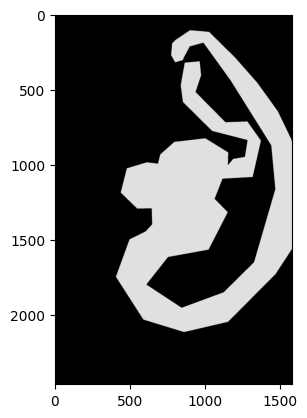

In [ ]:
plt.imshow(final)

In [ ]:
flip = np.rot90(final)

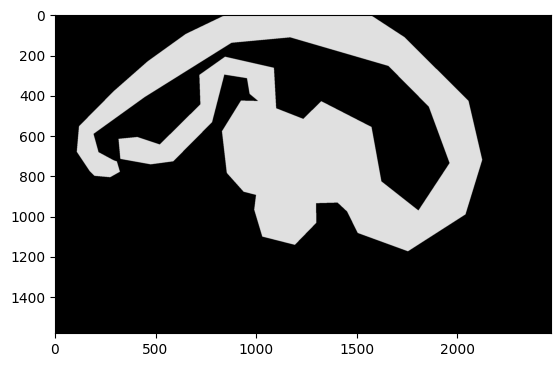

In [ ]:
plt.imshow(flip)

In [ ]:
out = str_mask(final)
out

In [ ]:
data = {"type": "FeatureCollection", "features": [{"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[33802.231379543366, -53093.23785525016], [33768.906691736905, -53595.84314754603], [33735.46549186214, -53727.219289911176], [33721.133549058664, -53839.486175205035], [33682.91503491608, -53975.639631838], [33625.5872637022, -54216.894002363086], [33558.70486395267, -54579.96988671768], [33498.363436021216, -54794.092991881276], [33453.224216657225, -55101.86039663575], [33433.4576482134, -55261.78990495396], [33408.018835866846, -55467.613023030644], [33380.90719126734, -55686.970874790255], [33360.1176763738, -55855.17694983802], [33351.94535387606, -56195.67808659063], [33299.5855394815, -56764.797902333295], [33329.01404569381, -57194.32404594245], [33372.79655642716, -57544.584131809206], [33491.94375865972, -57789.45719484304], [33539.71690133796, -58002.04767976119], [33532.55092993623, -58178.80830767066], [33558.46192303481, -58371.69617051905], [33644.81781523007, -58513.220306418305], [33706.92290071178, -58706.70153426516], [33739.863072726635, -58866.38403968068], [33742.75275772046, -58995.729047468485], [33825.49543891369, -59288.82100523469], [33859.79695728213, -59170.101018244044], [33850.01596098757, -58893.92226174591], [33835.91038594301, -58816.5797624251], [33831.13307167519, -58704.31287713125], [33833.5217288091, -58484.556420811365], [33814.41247173781, -58384.23282118708], [33809.63515746999, -58217.026821813255], [33804.85784320216, -58128.64650785852], [33792.91455753261, -57965.46844012226], [33771.4166433274, -57908.140668908374], [33766.63932905958, -57767.20989800758], [33714.08887211351, -57449.51849919734], [33790.525900398694, -57162.879643127926], [33801.38667745067, -56541.01992151846], [33666.315729435286, -56216.97141809886], [33632.87452956052, -55868.22747654775], [33714.08887211352, -55380.94142122975], [33860.04182506324, -54742.170841688174], [33928.23251353801, -54378.48716982276], [34010.28235671861, -53899.97399820445], [34067.610127932494, -53699.32679895586], [34091.496699271614, -53508.234228242916], [34086.719385003795, -53331.47360033345], [34029.39161378991, -53178.5995437631], [33967.28652830821, -53059.16668706751], [33900.40412855867, -52963.62040171104], [33823.880059997806, -52837.78342588771], [33799.31618756218, -52698.05031372706], [33794.53887329436, -52786.430627681795], [33761.097673419594, -52874.810941636526], [33763.486330553504, -52960.80259845735], [33782.5955876248, -53037.23962674253], [33802.231379543366, -53093.23785525016]]]}, "properties": {"data": {"text": "Fornix", "id": "128", "name": "Fornix", "acronym": "fx", "definition (description)": "The principal efferent fiber tract of the hippocampus. The body of the fornix courses forward under the corpus callosum and above the thalamus, then turns downward and subdivides into a precommissural part that distributes fibers to the septum, and a postcommissural part that curves behind the anterior commissure. The postcommissural fibers traverse the diencephalon and most of them terminate in the nuclei of the thalamic anterior complex and the mammillary body. Note: it may be needed to subdivide it further according to this description ", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "F", "parent_structure_id": "0", "color_hex_triplet": "9F9F9F"}}, "id": "23922"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[34128.8797127866, -53967.63814278994], [33928.23251353801, -54378.48716982276], [33813.57697111024, -54989.98339610417], [33765.80382843201, -55658.80739359946], [33784.9130855033, -56222.530477202636], [33813.57697111024, -56776.69893227017], [33928.23251353801, -57197.102587838635], [34233.98062667871, -57493.29607244369], [34491.95559714118, -57531.51458658628], [34816.81296735318, -56881.799846162285], [34960.13239538789, -56146.09344891746], [35113.00645195824, -55591.924993849934], [35323.208279742474, -54989.98339610417], [35361.42679388506, -54569.5797405357], [35294.54439413553, -54091.84831375335], [35027.01479513742, -53805.20945768394], [34520.61948274812, -53661.890029649236], [34128.8797127866, -53967.63814278994]]]}, "properties": {"data": {"text": "Thalamus", "id": "49", "name": "Thalamus", "acronym": "TH", "definition (description)": "Massive dorsal diencephalic structure with several distinct and some indistinct nuclei. As a convenience, the thalamus is divided into the following nuclear regions: the anterior complex, the central complex, the dorsal complex, the periventricular complex, the posterior complex, the ventral complex, and the reticular belt. Note: this is the definition of the structure in the adult brain. No clear distinction, however, between the dorsal (sensory-related) and ventral (motor-related) thalamic divisions.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "FFE1E1"}}, "id": "17603"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[25952.840816174306, -60079.82186370785], [25876.403787889125, -59678.52746521068], [25685.31121717619, -58455.53501264786], [25627.98344596231, -57041.4499893721], [25857.29453081783, -54958.540968601046], [26468.79075709924, -53601.78371653917], [27080.286983380654, -52722.75789125964], [27806.438752089824, -52130.37092204952], [28456.153492513826, -51843.73206598011], [29258.742289508176, -51862.841323051405], [30061.331086502527, -52397.90052104764], [30424.40697085711, -53066.724518542935], [30634.608798641348, -54041.29662917893], [30691.93656985523, -54671.902112531636], [31437.1975956357, -57385.41661665539], [31895.819765346758, -59602.0904369255], [32946.82890426793, -61837.87351426691], [33195.249246194755, -63232.849280471375], [33500.99735933546, -64666.04356081843], [34093.38432854557, -66041.9100699516], [34380.02318461498, -68354.13017557818], [34380.02318461498, -69768.21519885394], [34188.93061390204, -71717.35942012594], [34074.27507147428, -72500.838960049], [33902.29175783263, -73169.6629575443], [33539.215873478046, -73762.04992675441], [32813.06410476887, -74125.12581110898], [32201.56787848746, -74316.21838182193], [31169.66799663758, -73934.03324039605], [29507.162631435, -71755.57793426853], [28475.26274958512, -70265.05588270759], [27749.110980875943, -68182.14686193653], [27099.396240451948, -65525.96012902666], [26583.446299527008, -64092.765848679606], [26430.572242956652, -63758.35384993196], [26621.664813669595, -63443.05110825561], [26401.908357349712, -62296.49568397796], [26354.135214671478, -61503.46151551926], [25952.840816174306, -60079.82186370785]]]}, "properties": {"data": {"text": "Hippocampus", "id": "17", "name": "Hippocampus", "acronym": "HIP", "definition (description)": "A distinctive allocortical (three-layered) region formed by the interlocking  dentate gyrus and Ammon\u2019s horn. The hippocampus is continuous with the subicular complex. The principal afferents of the hippocampus travel in the alveolar and perforant paths; its efferents leave by way of the fimbria that join the fornix. Note: this is the definition of the region in the adult brain.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "8DBF6F"}}, "id": "12567"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[30948.696180159146, -34923.08309328515], [31999.70531908032, -34808.42755085739], [34082.614339851374, -34368.914638217626], [35018.96793634478, -34731.99052257222], [36127.304846479834, -35133.28492106939], [36452.16221669184, -35763.8904044221], [35668.68267676878, -36929.55508577103], [34598.564280776314, -38248.09382369032], [33795.975483781964, -39700.39736110867], [32515.65526000526, -42165.49152330561], [32057.0330902942, -43522.24877536748], [31865.940519581265, -45070.0985981423], [31846.83126250997, -45968.233680493126], [32018.81457615162, -46961.91504820042], [32343.67194636362, -48051.14270126418], [32955.168172645026, -49063.93332604277], [33432.89959942738, -49598.992524039], [33967.95879742361, -50344.25354981946], [34139.94211106526, -50821.984976601816], [34445.69022420596, -51357.04417459805], [34770.54759441796, -51777.44783016652], [35343.825306556784, -51758.33857309523], [35706.901190911376, -51414.37194581193], [35611.3549055549, -51853.884858451696], [35229.16976412902, -52236.069999877574], [36012.64930405207, -52427.16257059052], [36585.92701619089, -51911.21262966558], [36891.675129331605, -51165.95160388511], [37694.263926325955, -50478.018349318525], [37855.83126581042, -49833.99095282042], [38148.12328666079, -49693.8590069799], [38379.87099825663, -49451.0316322019], [38609.30595498501, -49122.36730593085], [38009.92676611431, -49368.31593157759], [37839.13025170288, -48865.40888156074], [38000.01203946666, -48318.6723002623], [38687.94529403324, -47630.73904569571], [39528.752605170186, -46942.805791129125], [39337.66003445724, -46273.98179363383], [39242.11374910077, -45261.19116885524], [39490.5340910276, -44343.94682943313], [40293.12288802194, -42757.87849251572], [41649.88014008383, -41687.760096523256], [42891.98184971794, -41171.810155598316], [43006.637392145676, -40345.865599961275], [43618.133618427084, -38855.34354840034], [44191.41133056591, -37594.13258169493], [44229.6298447085, -35530.33281799517], [44611.81498613438, -35109.929162426706], [44344.28538713626, -33275.440483582475], [43083.07442043085, -31823.136946164122], [41286.804255729214, -31326.29626231048], [39452.31557688498, -32052.448031019652], [37426.73432732781, -31402.733290595657], [36547.708502048285, -32358.196144160356], [35477.59010605582, -31517.38883302342], [32687.63857364688, -30905.89260674201], [31037.19737785851, -32300.494238464333], [29612.25360887598, -33218.576336871454], [29095.0982442436, -32549.2887148733], [26649.11333911796, -32702.16277144365], [24814.624660273723, -32931.473856299184], [24088.472891564554, -33848.718195721296], [23553.41369356832, -34651.30699271565], [22827.261924859136, -34765.96253514341], [21795.362043009256, -33848.718195721296], [21298.521359155624, -31861.35546030671], [20763.46216115939, -33237.22196943988], [20457.71404801868, -34574.86996443047], [19425.8141661688, -36218.26607256176], [18355.69577017633, -37555.914067552345], [17744.199543894923, -38473.15840697446], [16826.955204472804, -36180.047558419166], [15986.147893335874, -34842.39956342858], [15412.870181197068, -38320.28435040411], [15107.122068056357, -40384.08411410387], [13654.818530638004, -42333.22833537586], [13234.414875069531, -43747.31335865162], [13234.414875069531, -45314.272438497734], [13223.979370759407, -46942.21111087715], [13196.19636092693, -51276.360644741464], [13769.47407306575, -52728.66418215982], [15603.962751909974, -54868.90097414475], [17591.32548732456, -56665.171138846395], [19578.688222739147, -58155.69319040733], [21604.26947229632, -59684.433756110855], [23668.069235996052, -61671.79649152544], [24699.969117845932, -63009.444486516026], [25540.776428982877, -64805.71465121767], [26114.054141121705, -66296.23670277861], [26534.45779669017, -67863.19578262471], [27833.887277538168, -71226.42502717246], [28330.727961391814, -72640.51005044824], [29783.03149881016, -75468.68009699974], [33031.60520093016, -78870.1278556901], [35219.50225743195, -80421.63827179937], [37241.11548712397, -81059.56969191946], [38840.819350603546, -80742.8350486769], [40056.003557828735, -81003.91960539865], [41133.930199158836, -80016.68327996774], [42127.61156686613, -78717.25379911973], [42292.9600994019, -77662.94784497695], [41363.241284014366, -76309.48740813669], [40828.18208601813, -75621.5541535701], [40522.43397287743, -74092.81358786658], [41095.71168501625, -72946.25816358894], [40264.90778156188, -70098.86893135717], [39346.15205032746, -66950.045044889], [39484.5323772191, -65133.40324267206], [38242.4245145078, -62686.918777512685], [37039.93129190603, -60091.45433810123], [36273.12247531953, -58111.92300885665], [36084.76714148648, -56444.04037588296], [35561.48031178633, -57933.471039464544], [35196.6962087369, -60013.0294689172], [35282.58290317753, -61408.68560413396], [35600.69374396396, -64272.48850768067], [36116.256444313585, -65157.2179433038], [36417.334265925034, -66796.51236988488], [36605.557372798765, -68961.3483802129], [36748.595751089815, -71269.07798447344], [36425.76567283512, -73139.0719903606], [36109.580198809774, -74548.21163252271], [35614.10607228268, -75884.17939834789], [34913.14887468301, -76777.99123855477], [33619.28766977979, -76804.87646750892], [31891.857581665936, -75996.58886425971], [30118.88240849383, -73912.90584751635], [28690.391080613917, -71483.7488456336], [27451.93483882142, -68827.4981852815], [26713.83823946557, -66325.94106203309], [26185.26020324461, -63378.96980683783], [25388.00144741933, -60795.734095524116], [25356.260648468407, -60070.26708850859], [24786.52965269974, -58556.691179614565], [24482.67039079877, -59874.98920347079], [23641.497671246267, -59842.90960640552], [21780.661475343746, -58016.8659735303], [19246.300894442233, -56268.84726344027], [18758.09705724941, -56025.273982125575], [16918.776220755084, -54566.64361497534], [15658.868368197102, -52893.573982003676], [14480.164256826378, -50906.533480756334], [14539.499029835453, -46421.153229692325], [14824.582969690542, -44238.27863484627], [16205.896400129306, -42029.9491937587], [18237.40866599999, -39850.189611286034], [20195.16774949913, -38053.419123532774], [21957.152944724672, -36403.4356570189], [25537.807301361463, -35313.96285841264], [28709.77959422829, -35096.75569813473], [30948.696180159146, -34923.08309328515]]]}, "properties": {"data": {"text": "Ganglionic eminence", "id": "47", "name": "Ganglionic eminence", "acronym": "GE", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "D", "parent_structure_id": "0", "color_hex_triplet": "775F5F"}}, "id": "4879"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[32650.635419662874, -41897.363760371554], [33051.929818160046, -41132.99347751979], [33711.199187119695, -39852.67325374309], [33797.190843940516, -39699.79919717273], [34599.77964093487, -38247.495659754386], [35669.898036927334, -36928.956921835095], [36453.37757685039, -35763.29224048616], [36128.52020663839, -35132.68675713346], [35020.18329650334, -34731.39235863628], [34083.82970000993, -34368.31647428169], [32000.920679238872, -34807.829386921454], [30949.9115403177, -34922.484929349215], [28714.128462976296, -35094.468242990864], [25541.99178914148, -35314.22469931075], [21959.006088273847, -36403.45235237451], [20191.399809179144, -38056.40308904144], [18232.700959371505, -39852.67325374309], [16207.119709814331, -42031.12855987061], [14821.698572145513, -44238.24775160508], [14535.059716076095, -46416.7030577326], [14477.731944862215, -50907.378469486706], [15662.505883282443, -52894.741204901286], [16914.162221452207, -54566.801198639514], [19071.181683082687, -56286.32378525059], [22024.379700784702, -58085.393605110665], [23029.124484266315, -59363.224723534324], [23640.620710547722, -59840.95615031668], [24175.679908543956, -60137.149634921734], [24662.96596386195, -59535.20803717597], [24615.192821183722, -58254.88781339927], [24596.08356411243, -57710.27398686739], [24576.974307041135, -57117.887017657275], [24810.372209729772, -53366.34240493397], [25112.03350503737, -52531.6653205467], [25570.65567474843, -51270.45435384129], [26258.58892931501, -50276.772986134], [27749.110980875943, -49206.65459014153], [28972.103433438766, -48977.343505286], [30004.003315288646, -49283.091618426704], [31035.903197138527, -49627.05824571], [31655.55056721295, -49655.40529703972], [31914.92902241805, -50085.680415421055], [33046.25634849983, -50814.855805847874], [33557.47538113925, -52195.146918624756], [33638.42566386026, -53192.65747271055], [33574.395129291865, -53733.33053240934], [33562.260089861484, -53845.70355966444], [33252.577017408636, -55321.61685295563], [33214.35850326605, -57691.164729796095], [33558.32513054934, -58761.28312578856], [33558.32513054934, -58770.83775432421], [34026.501928796046, -59678.52746521068], [34198.48524243769, -59086.14049600056], [34456.46021290016, -59735.85523642456], [34685.77129775569, -59926.9478071375], [34647.5527836131, -59898.28392153056], [34685.77129775569, -59926.9478071375], [34685.77129775569, -61245.48654505679], [34743.099068969575, -63939.89179210926], [35010.62866796769, -64971.79167395913], [35067.95643918157, -65277.53978709984], [35163.50272453804, -65850.81749923866], [35373.70455232228, -66634.29703916173], [34857.75461139734, -65315.75830124243], [34685.77129775569, -65096.001844922546], [34867.30923993298, -66366.7674401636], [34934.19163968251, -67112.02846594407], [35010.62866796769, -67436.88583615607], [35163.50272453804, -68507.00423214854], [35048.84718211028, -69309.59302914288], [35125.28421039545, -70341.49291099276], [35125.28421039545, -71182.3002221297], [34628.44352654181, -73322.53701411464], [34494.99671338824, -73975.1991683218], [34213.70592521758, -74348.85424531672], [33779.606082228056, -74851.25701446352], [33221.024156454674, -75214.60364074788], [32713.063434537158, -75386.97363538996], [32060.15402219777, -75486.33571569825], [31180.757870611167, -75041.57116930488], [30778.73092704147, -74381.25305742932], [30372.151923050696, -73861.18904563942], [30018.475685671598, -73212.68817493331], [29935.24143927185, -73117.33755627363], [29199.24953383782, -72274.20763623317], [29772.21754349087, -73320.20626756962], [30214.687389819504, -74077.12631436178], [31121.894853959348, -75090.14329320934], [31895.819765346758, -75997.83300409581], [33615.65290176322, -76800.42180109015], [34915.08238261122, -76781.31254401886], [35612.57026571345, -75883.17746166805], [36109.4109495671, -74545.52946667746], [36424.71369124345, -73140.99907193735], [36749.57106145545, -71268.29187895052], [36606.25163342075, -68965.6264018596], [36415.159062707804, -66796.72572426772], [36118.96557810275, -65153.32961613643], [35603.01563717781, -64274.3037908569], [35383.259180857924, -62306.05031251361], [35278.15826696581, -61407.91523016279], [35192.16661014498, -60012.939463958326], [35421.47769500051, -58723.064611645976], [35096.62032478851, -58082.90449975763], [34771.762954576516, -58675.29146896774], [34504.2333555784, -59057.47661039362], [33739.863072726635, -58866.38403968068], [33577.43438762063, -58436.425755576565], [33415.00570251464, -57882.25730050904], [33329.01404569381, -57194.32404594245], [33233.46776033734, -56401.289877483745], [33348.1233027651, -55952.22233630834], [33453.224216657225, -55101.86039663575], [33558.32513054934, -54385.263256462225], [33701.64455858405, -53716.43925896693], [33797.190843940516, -53152.716175363756], [33844.96398661875, -52588.99309176058], [33816.30010101181, -51977.496865479174], [33582.35920837899, -51338.48979220863], [34083.82970000993, -51709.96726648106], [34695.325926291334, -52130.37092204952], [35230.38512428757, -52235.471835941644], [35287.712895501456, -52168.58943619211], [35612.57026571345, -51853.28669451576], [35708.11655106992, -51413.77378187599], [35345.04066671534, -51757.74040915929], [34771.762954576516, -51776.849666230584], [34446.90558436451, -51356.44601066211], [34141.15747122381, -50821.38681266588], [33969.174157582165, -50343.655385883525], [33434.11495958593, -49598.39436010306], [33405.45107397899, -49569.73047449612], [32956.38353280358, -49063.33516210683], [32344.88730652217, -48050.54453732824], [32020.029936310166, -46961.31688426448], [31848.046622668524, -45967.63551655719], [31867.155879739817, -45069.50043420637], [32058.248450452753, -43521.65061143155], [32507.315991628166, -42174.44798790532], [32650.635419662874, -41897.363760371554]]]}, "properties": {"data": {"text": "Lateral ventricle", "id": "112", "name": "Lateral ventricle", "acronym": "LV", "definition (description)": "Paired cavities of the ventricular system in the telencephalon. They are connected with the third ventricle in the diencephalon by the foramen of Monro. During embryonic development, the neuroepithelium lining the hypertrophied lateral ventricles and the adjacent subventricular zone are the source of neurons and neuroglia in the telencephalon. In the mature brain the enduring shrunken regions of the lateral ventricles are lined by cells of the ependyma.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "CNS Cavity", "parent_structure_id": "0", "color_hex_triplet": "231F20"}}, "id": "17973"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[16826.955204472804, -36180.047558419166], [17744.199543894923, -38473.15840697446], [17985.496894120442, -38111.212381636185], [18355.69577017633, -37555.914067552345], [19425.8141661688, -36218.26607256176], [20457.71404801868, -34574.86996443047], [20487.29328581007, -34445.46079909317], [20763.46216115939, -33237.22196943988], [18080.058257005177, -34912.940083391826], [16826.955204472804, -36180.047558419166]]]}, "properties": {"data": {"text": "Corona radiata", "id": "121", "name": "Corona radiata", "acronym": "cor", "definition (description)": "Fan-shaped radiating mass of ascending (thalamocortical) and descending (corticofugal) fibers of the internal capsule. It is continuous with the white matter of the cerebral cortex.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "F", "parent_structure_id": "0", "color_hex_triplet": "9F9F9F"}}, "id": "18957"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[31231.439478862223, -46765.90375624935], [30467.06919601046, -45657.56684611429], [30390.632167725285, -44358.13736526629], [31193.220964719636, -43020.48937027571], [32225.12084656951, -41415.31177628701], [32913.0541011361, -40268.75635200936], [33104.14667184904, -39083.98241358913], [32072.24678999916, -37899.208475168896], [29740.917427301283, -37173.05670645973], [27447.806578746, -37173.05670645973], [24275.669904911192, -38052.08253173925], [21753.247971500357, -39236.85647015948], [20377.381462367193, -41147.782177288886], [19269.04455223214, -42982.27085613312], [19918.759292656134, -45160.72616226064], [21676.810943215183, -44854.978049119934], [20186.288891654258, -47683.14809567146], [20148.07037751167, -49326.54420380275], [20606.692547222716, -50931.72179779145], [21141.751745218964, -52154.71425035427], [21791.466485642944, -50396.662599795214], [22517.618254352128, -51352.12545335992], [23167.332994776123, -52154.71425035427], [24887.166131192585, -51428.562481645095], [26148.377097898003, -49670.51083108604], [26606.999267609055, -48332.86283609546], [26339.46966861094, -47683.14809567146], [24619.636532194476, -47492.055524958516], [25689.754928186943, -46192.626044110526], [27065.621437320115, -45963.31495925499], [28556.143488881055, -46536.59267139382], [30849.254337436338, -48523.955406808396], [31575.406106145514, -49250.10717551757], [32225.12084656951, -49555.85528865828], [31231.439478862223, -46765.90375624935]]]}, "properties": {"data": {"text": "Choroid plexus", "id": "115", "name": "Choroid plexus", "acronym": "Chp", "definition (description)": "Highly vascularized and arborized epithelial tissue of mesenchymal origin that secretes the cerebrospinal fluid circulating in the brain ventricles and subarachnoid spaces of the meninges. The lateral, third, and fourth ventricles have their own choroid plexus arbors.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "O", "parent_structure_id": "0", "color_hex_triplet": "872601"}}, "id": "12314"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[7547.833217856911, -71866.80544354454], [7089.211048145866, -71446.40178797606], [6936.3369915755175, -71188.4268175136], [6573.261107220926, -70748.91390487384], [6234.071794205462, -70089.6445359142], [6014.315337885579, -69478.14830963279], [5789.781567297861, -68847.54282628009], [5780.226938762222, -68603.89979862107], [5923.546366796931, -68279.04242840907], [6248.403737008935, -68087.94985769613], [6840.79070621905, -67868.19340137625], [7700.707274427274, -67858.63877284061], [8493.741442885977, -67877.7480299119], [9525.641324735858, -67868.19340137625], [10404.66715001539, -67896.8572869832], [11073.491147510678, -68087.94985769613], [11770.979030612914, -68498.79888472895], [12382.475256894322, -68833.2108834766], [13701.013994813606, -70132.6403643246], [13987.652850883023, -70543.48939135742], [14350.728735237615, -71068.99396081801], [14618.258334235725, -71498.95224492213], [14752.023133734794, -72081.7845855966], [14580.039820093138, -72425.7512128799], [14054.535250632558, -72616.84378359283], [13490.812167029377, -72836.60023991272], [13032.189997318317, -73171.01223866036], [12735.99651271326, -73400.32332351588], [12296.483600073494, -73620.07977983577], [11723.205887934673, -73753.84457933484], [10796.406919976915, -73715.62606519225], [10032.036637125158, -73438.54183765847], [8809.044184562328, -72855.70949698401], [7920.463730747157, -72272.87715630955], [7547.833217856911, -71866.80544354454]]]}, "properties": {"data": {"text": "Cerebellar hemispheres", "id": "107", "name": "Cerebellar hemispheres", "acronym": "HEM", "definition (description)": "Portion of the cerebellar cortex situated on either side of the midline vermis. Its principal components are the simplex lobule, crus I and II of the ansiform lobule, the flocculus, and the paraflocculus.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "FF9F9F"}}, "id": "37050"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[30055.273535519955, -84898.18922818295], [30781.425304229124, -83675.19677562013], [32692.351011358536, -82605.07837962767], [34488.62117606017, -82413.98580891473], [36437.76539733217, -82375.76729477213], [38119.38001960605, -82222.89323820178], [39762.776127737336, -82146.4562099166], [41406.172235868624, -82337.54878062954], [42801.148002073096, -87497.04818987894], [40832.8945237298, -87611.7037323067], [39017.51510195687, -87669.03150352059], [36590.63945390252, -87688.14076059188], [35081.00814527029, -87363.28339037987], [33666.92312199453, -86751.78716409847], [31660.451129508656, -85930.08911003283], [30533.004962302308, -85356.811397894], [30055.273535519955, -84898.18922818295]]]}, "properties": {"data": {"text": "Entorhinal cortex", "id": "15", "name": "Entorhinal cortex", "acronym": "ENT", "definition (description)": "Multilayered cortical component of the parahippocampal gyrus. It is bordered internally by the subicular complex and is separated from the neocortex by the rhinal sulcus. It is the source of the perforant pathway to the hippocampus.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "AFD29A"}}, "id": "77831"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[44699.02200311378, -71674.36359171552], [45019.10205905796, -70298.49708258235], [45244.99768999074, -69499.79983005972], [45418.00780042122, -70692.6255096778], [45642.54157100892, -72436.34521743338], [45076.42983027184, -77261.43262793512], [44911.612488031926, -78501.14568043534], [45169.587458494396, -78926.32665027163], [46320.920197039864, -79224.9087920106], [46349.584082646805, -76630.82714458242], [46621.89099591274, -74949.21252230855], [47245.33050786371, -74383.10078157145], [47773.22373445821, -73716.66544121008], [48141.07693308062, -73253.2659572312], [48372.96616101154, -73030.62341009764], [48704.800016683796, -73489.74301348846], [49416.6198425895, -74590.91395222179], [49407.06521405385, -74578.97066655222], [50126.05101136129, -75443.66454902828], [50699.32872350011, -76972.40511473181], [51623.73903432397, -78138.06979608074], [51423.09183507538, -78668.35167980916], [50524.95675272456, -80302.1931594048], [49359.29207137562, -82385.10218017585], [48461.1569890248, -83608.09463273866], [47763.24262656725, -84460.80832946555], [47455.84594497585, -84690.16491330996], [47344.403883265724, -84910.53218498937], [47300.07017898652, -84959.4936389229], [46620.85834523639, -85407.83304458486], [45085.93930303179, -86439.09658093676], [42830.73956356668, -87388.0645518159], [41667.6563028643, -83430.77805298928], [41546.97033745251, -82575.26026638973], [41405.063815449466, -82337.32903749762], [39761.66770731818, -82146.23646678467], [38118.27159918688, -82222.67349506984], [36436.65697691301, -82375.54755164021], [34487.512755641015, -82413.7660657828], [32691.24259093937, -82604.85863649573], [30780.316883809966, -83674.9770324882], [30433.96159939276, -84260.19803029658], [30073.274372172084, -84866.91694231017], [29855.906572986118, -84909.91277072058], [29593.15428825582, -84857.36231377452], [28394.048407032118, -84016.55500263759], [26989.518012292006, -82869.99957835993], [26091.38292994119, -82115.18392404383], [25219.5230760634, -81279.1539271747], [24942.438848529622, -81011.6243281766], [24569.80833563939, -80572.11141553683], [24302.27873664128, -80170.81701703965], [23900.984338144102, -79836.405018292], [23002.849255793277, -78642.07645133612], [22066.49565929988, -77304.42845634554], [21359.45314766199, -76272.52857449566], [20423.09955116859, -75106.86389314673], [20136.460695099173, -74762.89726586343], [19104.560813249293, -73711.88812694226], [18129.988702613293, -72871.08081580533], [16715.90367933754, -71628.9791061712], [15512.020483846005, -70558.86071017873], [14193.481745926721, -69565.17934247144], [12779.396722650956, -68246.64060455214], [8608.610923395478, -65239.768173529264], [11064.95293081693, -62894.41168964431], [17590.15219034924, -56664.04216221404], [19577.514925763826, -58154.564213774975], [21603.096175320985, -59683.3047794785], [23666.895939020746, -61670.66751489308], [24698.795820870626, -63008.31550988367], [25539.60313200757, -64804.58567458531], [26112.88084414639, -66295.10772614625], [26533.284499714857, -67862.06680599236], [27832.713980562854, -71225.29605054011], [28329.5546644165, -72639.38107381588], [29781.858201834853, -75467.5511203674], [30758.55988257553, -76490.21523314292], [33030.43190395484, -78868.99887905775], [35213.66452435019, -80419.23735896648], [35218.44183861801, -80421.62601610039], [37241.63443104127, -81059.39747085482], [38839.64605362824, -80741.70607204456], [40055.47253478932, -81004.45835677485], [41132.75690218352, -80015.55430333539], [42126.438269890816, -78716.12482248739], [42248.259783720314, -77946.97722536781], [42491.90281137932, -77595.84462668278], [42482.34818284367, -77598.23328381669], [43189.390694481546, -77483.57774138892], [43781.77766369166, -76795.64448682233], [44202.18131926013, -75840.18163325763], [44393.273889973076, -74598.07992362352], [44507.92943240084, -73661.7263271301], [44584.36646068602, -72648.93570235153], [44660.80348897119, -71992.0549905258], [44699.02200311378, -71674.36359171552]]]}, "properties": {"data": {"text": "Temporal cortex", "id": "14", "name": "Temporal cortex", "definition (description)": "Lateral portion of the cerebral hemispheres. It is separated by the lateral fissure from the frontal lobe anteriorly and the paracentral lobule dorsally, but is continuous with the parietal lobe dorsally and the occipital lobe posteriorly. Two horizontal fissures, the superior and middle temporal sulci, divide the temporal lobe into three convolutions, the superior, middle and inferior gyri. The primary auditory area lies buried in the floor of the lateral fissure in the anterior transverse gyrus (Heschl\u2019s gyrus). Note: this is the definition of the adult temporal lobe.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "CFE4C2"}}, "id": "85393"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[24576.974307041135, -56735.70187623139], [24596.08356411243, -57710.27398686739], [24920.94093432442, -58895.047925287625], [25207.579790393836, -59449.21638035515], [25475.109389391946, -60366.460719777264], [25563.983557623083, -61365.712732954205], [25676.745011630454, -61781.52036253749], [25997.324205011268, -62715.32261221998], [26323.547997586364, -63579.93923875742], [26444.838116262858, -63729.63126818373], [26622.58095220774, -63504.418014670664], [26410.141320550523, -62154.84091503732], [26365.168773022713, -61465.79547364683], [26096.80330958285, -60721.57252467709], [25876.403787889125, -59678.52746521068], [25685.31121717619, -58455.53501264786], [25627.98344596231, -57041.4499893721], [25857.29453081783, -54958.540968601046], [26468.79075709924, -53601.78371653917], [27080.286983380654, -52722.75789125964], [27806.438752089824, -52130.37092204952], [28456.153492513826, -51843.73206598011], [29258.742289508176, -51862.841323051405], [30061.331086502527, -52397.90052104764], [30424.40697085711, -53066.724518542935], [30634.608798641348, -54041.29662917893], [30691.93656985523, -54671.902112531636], [31437.1975956357, -57385.41661665539], [31597.060994772954, -58158.08971248545], [31895.819765346758, -59602.0904369255], [32946.82890426793, -61837.87351426691], [33195.249246194755, -63232.849280471375], [33500.99735933546, -64666.04356081843], [34093.38432854557, -66041.9100699516], [34380.02318461498, -68354.13017557818], [34380.02318461498, -69768.21519885394], [34188.93061390204, -71717.35942012594], [34074.27507147428, -72500.838960049], [33902.29175783263, -73169.6629575443], [33539.215873478046, -73762.04992675441], [32813.06410476887, -74125.12581110898], [32201.56787848746, -74316.21838182193], [31169.66799663758, -73934.03324039605], [29507.162631435, -71755.57793426853], [28475.26274958512, -70265.05588270759], [27749.110980875943, -68182.14686193653], [27099.396240451948, -65525.96012902666], [26583.446299527008, -64092.765848679606], [26010.168587388187, -62831.554881974196], [26335.025957600184, -64226.53064817867], [26640.77407074089, -65927.25452752384], [26717.211099026063, -66328.548926021], [27443.36286773524, -68831.86160236053], [28685.464577369356, -71488.0483352704], [29048.54046172394, -72080.43530448052], [29908.45702993217, -73074.11667218781], [30119.307835315478, -73407.3969774711], [30205.910510915353, -73544.28507761285], [30500.843999142293, -74010.47026868122], [30910.582071423938, -74725.24892935807], [31226.995767851462, -74870.38683688946], [31857.60125120417, -75290.79049245793], [32239.502069622184, -75453.93227798914], [32349.889419035855, -75436.28094950387], [32556.25880131605, -75416.6020526186], [33188.853857674585, -75225.8589405285], [33445.48418225873, -75055.35366653228], [33765.69909319102, -74834.41131405439], [33916.72190920779, -74701.39591762928], [34203.03696055406, -74411.16421663141], [34342.334899390036, -74219.54578106357], [34556.40125060887, -73898.70366199761], [34667.884470831, -73470.87061585476], [34790.59883978534, -72847.54467491369], [34838.64535432604, -72443.51118883511], [35125.28421039545, -71182.3002221297], [35125.28421039545, -70341.49291099276], [35048.84718211028, -69309.59302914288], [35163.50272453804, -68507.00423214854], [35010.62866796769, -67436.88583615607], [34934.19163968251, -67112.02846594407], [34876.86386846863, -66366.7674401636], [34781.31758311216, -65736.16195681089], [34532.89724118534, -64895.35464567396], [34399.13244168628, -64723.37133203231], [34150.712099759454, -62850.66413904549], [33864.07324369004, -60825.08288948832], [33558.32513054934, -58780.392382859856], [33615.65290176322, -58875.938668216324], [33558.32513054934, -58780.392382859856], [33558.32513054934, -58761.28312578856], [33214.35850326605, -57691.164729796095], [33211.277588375946, -57014.355707310686], [33204.97694353716, -55630.243056855026], [33335.296243343844, -54785.117934411515], [33625.78769786118, -53527.26888637279], [33601.847166591084, -52934.16466092621], [33551.28154920092, -52203.52325522064], [33118.99863580179, -51315.860959035424], [32967.66976460669, -50767.03768239774], [32267.7342039804, -50358.26218501489], [31829.303618516817, -49841.022863977436], [31703.113974428867, -49692.15039021744], [30361.846175367806, -49399.86150905129], [28998.450553406867, -49017.49741721671], [27737.358831424353, -49291.36836449886], [26487.90001417054, -50123.89892956365], [25436.89087524936, -51614.42098112458], [24791.07083117652, -53424.908232465415], [24576.974307041135, -55226.07056759916], [24576.974307041135, -56735.70187623139]]]}, "properties": {"data": {"text": "Fornix", "id": "128", "name": "Fornix", "acronym": "fx", "definition (description)": "The principal efferent fiber tract of the hippocampus. The body of the fornix courses forward under the corpus callosum and above the thalamus, then turns downward and subdivides into a precommissural part that distributes fibers to the septum, and a postcommissural part that curves behind the anterior commissure. The postcommissural fibers traverse the diencephalon and most of them terminate in the nuclei of the thalamic anterior complex and the mammillary body. Note: it may be needed to subdivide it further according to this description ", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "F", "parent_structure_id": "0", "color_hex_triplet": "9F9F9F"}}, "id": "7657"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[12986.177158252918, -47392.24797912545], [12137.13492141776, -47736.69200043963], [11709.961808964654, -47287.488363415134], [11326.42428673456, -47216.41329146064], [10695.934476743001, -49034.412940096234], [10057.53166530648, -49755.310670457875], [11042.254009722237, -50716.241022465685], [11403.08898979389, -50503.75683340392], [12435.159087351829, -51097.34545873122], [13028.800562649558, -50996.862987204586], [13616.984420034612, -52587.18248867124], [16140.154252654815, -55506.38061684758], [17585.700730219207, -56588.38324165072], [8582.812682123607, -65323.49561942644], [-2167.1367229657626, -57644.233454416535], [-5982.915427833097, -53352.126912469634], [-6886.417460844546, -50190.78132931318], [-7440.585915912074, -45241.48374784801], [-6714.434147202905, -40808.136107307786], [-6026.500892636308, -37521.34389104521], [-4918.1639825012535, -34693.17384449369], [-4115.57518550691, -33317.307335360514], [-2816.1457046589057, -32782.24813736428], [1311.453822740601, -33661.27396264381], [4751.12009557354, -35610.418183915805], [7311.760543126948, -37444.906862760035], [9757.745448252579, -39317.61405574685], [11248.267499813519, -40043.76582445603], [12509.478466518936, -40769.9175931652], [13694.252404939165, -41037.44719216332], [14324.857888291866, -41429.18696212485], [13656.033890796578, -42336.87667301131], [13235.630235228105, -43750.96169628708], [13235.630235228105, -45317.92077613319], [12996.764521836929, -48021.8806517213], [12986.177158252918, -47392.24797912545]]]}, "properties": {"data": {"text": "Occipital cortex", "id": "12", "name": "Occipital cortex", "definition (description)": "The most posterior region of the cerebral cortex, partially separated from the parietal lobe by the  parietooccipital sulcus. It contains several visual areas with direct projections from the retina, by way of the lateral geniculate body, or indirect projection by way of the pulvinar. The distinctive primary visual projection area, the striate cortex, lies along the wall of the calcarine sulcus.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "CFE4C2"}}, "id": "100168"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[47016.69592418069, -52870.00903045622], [47524.39901100409, -48190.43593221119], [47422.26833746115, -47871.561341302375], [47419.32580294739, -46331.114948490416], [47950.63252672411, -44797.8942967809], [49610.10107043635, -41677.60730405167], [52263.49476468502, -40317.42201883803], [55703.161037517944, -40164.54796226768], [59983.634621487814, -41234.666358260154], [64416.98226202805, -44368.584517952375], [67092.27825200922, -49184.11729991848], [67703.77447829062, -52394.47248789588], [69079.64098742379, -57057.131213291636], [69461.82612884967, -62254.84913668362], [67398.02636514991, -65388.767296375845], [63270.42683775039, -65465.20432466102], [58428.181259914876, -65281.10453886624], [54856.88508666205, -66716.75580721156], [54144.70246271891, -67055.44692292556], [50943.94040213311, -66419.89774758427], [50635.04677212031, -65441.21084793484], [50936.57029207764, -64305.87925081658], [51537.42330539334, -64594.352437835936], [50182.27535109805, -63187.11182509095], [49920.18213467277, -62128.210326941495], [48120.199349141614, -60805.82076319221], [47016.69592418069, -59099.62683569808], [46940.25889589552, -56003.92719014844], [47016.69592418069, -52870.00903045622]]]}, "properties": {"data": {"text": "Insula", "id": "24", "name": "Insula", "acronym": "INS", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "DBEBD1"}}, "id": "33855"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[38832.4800822265, -48900.906477000826], [38689.93334899601, -48578.958586183864], [38575.080742310725, -47721.79874249174], [38038.073093229694, -48299.07655804112], [37905.31137517485, -48684.110429495035], [37907.202763669084, -48963.658132190394], [37950.98933184721, -49196.71752829583], [38046.7756728818, -49360.43052845802], [38618.182928145136, -49113.87599906152], [38316.53014130156, -49531.51196035353], [37884.813741048805, -49796.795566056586], [37845.520249473986, -49938.048872575186], [37695.47928648451, -50477.42018538259], [36892.89048949016, -51165.35343994918], [36587.142376349446, -51910.61446572964], [36558.478490742506, -51939.27835133658], [36630.40251803106, -52131.890609428854], [36310.05814881568, -53964.85960089375], [36120.540991935966, -54286.248899133185], [36157.184092245334, -54996.75948274363], [36391.107964969015, -56087.35173642354], [36374.55851696151, -56480.7373980614], [36166.73872078098, -57136.99627472857], [36288.81411370777, -58147.16135445445], [36759.125689991095, -59191.24140989268], [37547.360480543044, -60131.108147406245], [38354.74865544415, -61656.335572089614], [38851.589339297796, -62621.35305418997], [39768.83367871991, -64971.79167395913], [40017.25402064673, -66271.22115480714], [40418.54841914391, -67723.52469222547], [40514.09470450038, -67924.17189147406], [40896.27984592626, -68755.42457407535], [41192.47333053132, -69596.2318852123], [41393.12052977991, -68831.86160236053], [41049.15390249661, -66920.93589523113], [40991.82613128273, -65717.05269973961], [40972.71687421144, -65048.22870224431], [40858.061331783676, -64360.29544767772], [40819.84281764108, -63404.832594113024], [41202.02795906697, -63079.97522390102], [41756.196414134494, -63385.72333704172], [42061.9445272752, -62946.210424401965], [41698.868642920614, -62372.932712263144], [41507.77607220767, -61551.2346581975], [41374.01127270861, -59678.52746521068], [41431.3390439225, -58875.938668216324], [41813.524185348375, -58990.59421064409], [41450.44830099379, -57471.40827347621], [41182.91870199567, -56181.53342116386], [41278.46498735214, -55627.364966096335], [41574.6584719572, -56296.18896359163], [41651.09550024237, -55684.69273731022], [41440.89367245814, -54920.32245445846], [41374.01127270861, -54232.38919989187], [41717.97789999191, -53515.79205971834], [41909.07047070484, -54194.17068574928], [41966.39824191873, -53515.79205971834], [41823.07881388402, -52665.430120045756], [41813.524185348375, -52092.152407906935], [41861.29732802661, -51576.202466981995], [42100.163041417785, -51748.185780623644], [42358.138011880255, -51662.194123802816], [42568.33983966449, -51289.563610912584], [42453.68429723673, -50869.15995534411], [42405.91115455849, -50515.638699525174], [42530.121325521905, -49961.47024445765], [42673.440753556606, -48881.79721992953], [42597.00372527143, -48365.84727900459], [42386.801897487196, -47725.687167116244], [42128.826927024726, -47171.51871204872], [41937.73435631179, -46684.23265673072], [42329.474126273315, -47075.97242669224], [42444.129668701076, -47525.039967867655], [42625.66761087837, -47954.99825197177], [42788.096295984375, -48423.17505021847], [42893.19720987649, -47582.367739081536], [43055.62589498249, -46368.92991505437], [43218.05458008849, -45489.904089774835], [43160.726808874606, -44935.73563470731], [43093.84440912508, -44505.777350603195], [42921.86109548343, -44085.37369503472], [42883.64258134084, -43607.64226825237], [42463.23892577238, -42977.03678489967], [42081.05378434649, -43091.69232732743], [41775.30567120579, -43512.0959828959], [41641.540871706726, -44085.37369503472], [41431.3390439225, -44677.76066424484], [41106.48167371049, -44945.290263242954], [40953.607617140144, -45251.03837638366], [40877.17058885497, -45709.66054609472], [40552.313218642965, -46378.48454359001], [40380.32990500132, -47181.073340584364], [39998.14476357544, -47792.56956686577], [39998.14476357544, -48155.645451220356], [39939.45952488896, -48608.56417437487], [39569.266428432216, -49217.71162507102], [38832.4800822265, -48900.906477000826]]]}, "properties": {"data": {"text": "Internal capsule", "id": "120", "name": "Internal capsule", "acronym": "Int", "definition (description)": "Massive fiber tract between the thalamus and striatum, composed of thalamocortical and corticofugal fibers. It is continuous with the corona radiata rostrally, and the cerebral peduncle caudally. Note: there are different subdivisions of the internal capsule in the literature. It is considered here as a part of the corticofugal tract even though it includes thalamocortical fibers.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "F", "parent_structure_id": "0", "color_hex_triplet": "9F9F9F"}}, "id": "27338"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[43361.374008123195, -43187.238612683905], [42925.68891703963, -42444.863378425434], [42722.05810378939, -41671.89850993118], [43135.683383817595, -40941.1756445863], [43938.272180811946, -40520.77198901783], [44817.29800609147, -40176.805361734536], [45199.483147517356, -41132.268215299235], [45588.415404802, -41371.0368410932], [45452.293353636625, -42009.95198514304], [45084.82760508959, -42718.33655221664], [45084.82760508959, -43406.26980678323], [44970.172062661826, -44380.84191741923], [44970.172062661826, -45489.17882755429], [45123.04611923218, -46290.16221339707], [45103.93686216089, -46920.76769674977], [44798.18874902018, -47169.18803867659], [44263.12955102394, -45659.55673004436], [44088.17290924943, -44975.9173114897], [43800.88692076296, -44008.93666674955], [43361.374008123195, -43187.238612683905]]]}, "properties": {"data": {"text": "Internal capsule", "id": "120", "name": "Internal capsule", "acronym": "Int", "definition (description)": "Massive fiber tract between the thalamus and striatum, composed of thalamocortical and corticofugal fibers. It is continuous with the corona radiata rostrally, and the cerebral peduncle caudally. Note: there are different subdivisions of the internal capsule in the literature. It is considered here as a part of the corticofugal tract even though it includes thalamocortical fibers.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "F", "parent_structure_id": "0", "color_hex_triplet": "9F9F9F"}}, "id": "34097"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[43160.726808874606, -45805.206831451185], [43055.62589498249, -46368.92991505437], [43046.071266446845, -46435.812314803894], [42912.30646694778, -47458.15756811813], [43256.27309423108, -47333.94739715471], [43218.05458008849, -47735.24179565189], [43151.17218033896, -48337.18339339765], [43151.17218033896, -48738.477791894824], [43198.94532301719, -49072.889790642475], [43304.046236909315, -49273.53698989106], [43571.57583590743, -49120.66293332071], [43581.13046444308, -48547.38522118189], [43628.90360712131, -48021.8806517213], [43628.90360712131, -47572.81311054589], [43753.11377808472, -47133.30019790612], [43867.76932051249, -46942.20762719319], [43590.685092978725, -47066.417798156595], [43657.56749272825, -46703.34191380201], [43562.021207371785, -46540.91322869601], [43409.14715080143, -46779.778942087185], [43361.374008123195, -46426.25768626825], [43495.13880762225, -45766.9883173086], [43485.5841790866, -45394.35780441837], [43160.726808874606, -45805.206831451185]]]}, "properties": {"data": {"text": "Internal capsule", "id": "120", "name": "Internal capsule", "acronym": "Int", "definition (description)": "Massive fiber tract between the thalamus and striatum, composed of thalamocortical and corticofugal fibers. It is continuous with the corona radiata rostrally, and the cerebral peduncle caudally. Note: there are different subdivisions of the internal capsule in the literature. It is considered here as a part of the corticofugal tract even though it includes thalamocortical fibers.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "F", "parent_structure_id": "0", "color_hex_triplet": "9F9F9F"}}, "id": "35069"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[45138.534915753546, -46302.04751530483], [44985.66085918319, -49053.78053357118], [44947.4423450406, -53983.96885796505], [44756.34977432766, -57270.76107422762], [44565.25720361472, -59028.81272478668], [43991.9794914759, -64073.65659160831], [44871.00531675543, -63844.34550675278], [45253.19045818131, -62200.949398621495], [45291.408972323894, -58990.59421064409], [45597.1570854646, -53907.53182967987], [45902.9051986053, -51881.9505801227], [46170.43479760342, -50467.86555684694], [46361.52736831636, -49359.528646711886], [46820.14953802742, -47563.25848201024], [47278.77170773848, -46149.17345873448], [47852.0494198773, -44926.18100617166], [48845.730787584595, -43206.3478697552], [49610.10107043635, -41677.60730405167], [49610.10107043635, -41142.54810605544], [48883.94930172718, -40569.27039391661], [47049.46062288295, -40836.79999291473], [45482.50154303684, -42059.79244547755], [45100.31640161095, -42709.50718590155], [45138.534915753546, -46302.04751530483]]]}, "properties": {"data": {"text": "External capsule", "id": "125", "name": "External capsule", "acronym": "ext", "definition (description)": "Slender fiber band situated between the claustrum and the putamen. Note: made of cortico-cortical association fibers.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "F", "parent_structure_id": "0", "color_hex_triplet": "9F9F9F"}}, "id": "43387"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[42463.23892577238, -42977.03678489967], [42883.64258134084, -43607.64226825237], [42921.86109548343, -44085.37369503472], [43093.84440912508, -44505.777350603195], [43189.390694481546, -45117.2735768846], [43227.60920862413, -45652.33277488084], [43705.34063540649, -45174.601348098484], [44163.962805117546, -45365.69391881143], [44030.198005618484, -44677.76066424484], [43800.88692076296, -44008.93666674955], [43667.1221212639, -43569.42375410978], [43361.374008123195, -43187.238612683905], [43036.5166379112, -42805.05347125802], [42807.20555305567, -42059.79244547755], [42635.22223941402, -41276.31290555449], [42233.92784091685, -41448.29621919614], [41641.540871706726, -41696.716561122965], [40284.78361964485, -42766.83495711543], [39482.1948226505, -44352.90329403284], [39233.774480723674, -45270.14763345495], [39329.32076608015, -46282.93825823354], [39520.413336793084, -46951.762255728834], [38679.60602565615, -47639.695510295416], [38660.49676858485, -47658.80476736671], [38660.49676858485, -48404.06579314718], [38832.4800822265, -48900.906477000826], [39577.74110800697, -49206.65459014153], [39998.14476357544, -48480.502821432354], [39998.14476357544, -47792.56956686577], [40380.32990500132, -47181.073340584364], [40552.313218642965, -46378.48454359001], [40877.17058885497, -45709.66054609472], [40953.607617140144, -45251.03837638366], [41106.48167371049, -44945.290263242954], [41431.3390439225, -44677.76066424484], [41641.540871706726, -44085.37369503472], [41775.30567120579, -43512.0959828959], [42081.05378434649, -43091.69232732743], [42463.23892577238, -42977.03678489967]]]}, "properties": {"data": {"text": "Caudate nucleus", "id": "35", "name": "Caudate nucleus", "acronym": "CA", "definition (description)": "Elongated and arched component of the basal ganglia beneath the cerebral cortex. It abuts the lateral ventricle and extends from anterodorsal (its \u201chead\u201d) to posteroventral (its \u201ctail\u201d).", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "F8F9BB"}}, "id": "22283"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[47059.0152514186, -66204.3387550576], [46887.03193777695, -65564.17864316926], [46791.48565242048, -65210.65738735031], [47746.94850598518, -65325.312929778076], [46791.48565242048, -64484.50561864114], [46371.08199685201, -63643.69830750419], [46638.611595850125, -62841.10951050984], [47632.29296355742, -62611.79842565432], [48587.755817122124, -63529.04276507643], [48855.28541612024, -64446.287104498544], [49352.12609997388, -65745.71658534654], [49657.87421311459, -64713.81670349666], [50384.02598182376, -64025.88344893008], [50632.446323750584, -64140.53899135784], [50938.19443689129, -64302.96767646384], [50852.20278007047, -64627.82504667584], [50642.00095228623, -65430.41384367019], [50947.749065426935, -66806.28035280335], [50737.547237642706, -66806.28035280335], [49743.86586993541, -67608.86914979771], [49505.000156544236, -69042.06343014477], [49247.025186081766, -69443.35782864195], [49686.53809872153, -71077.19930823758], [49600.546441900704, -71612.25850623382], [49457.227013866, -71545.3761064843], [47785.167020127774, -70790.56045216817], [48052.69661912589, -69529.34948546276], [49161.033529260945, -69605.78651374794], [49533.66404215118, -68879.63474503877], [48969.940958548, -68000.60891975925], [47785.167020127774, -66968.70903790937], [47479.41890698706, -66653.406296233], [47059.0152514186, -66204.3387550576]]]}, "properties": {"data": {"text": "Temporal cortex", "id": "14", "name": "Temporal cortex", "definition (description)": "Lateral portion of the cerebral hemispheres. It is separated by the lateral fissure from the frontal lobe anteriorly and the paracentral lobule dorsally, but is continuous with the parietal lobe dorsally and the occipital lobe posteriorly. Two horizontal fissures, the superior and middle temporal sulci, divide the temporal lobe into three convolutions, the superior, middle and inferior gyri. The primary auditory area lies buried in the floor of the lateral fissure in the anterior transverse gyrus (Heschl\u2019s gyrus). Note: this is the definition of the adult temporal lobe.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "CFE4C2"}}, "id": "93771"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[45753.37048134463, -52872.618081974666], [45377.56230110431, -57558.295119669645], [45253.19045818131, -62200.949398621495], [44871.00531675543, -63844.34550675278], [44512.61040107736, -66564.14902834033], [45539.14240036824, -68186.46461201049], [45070.5581029646, -67983.04348424889], [45641.57606175008, -72437.35287631369], [45077.37085924814, -77261.95457786365], [44911.20111782311, -78500.54837642945], [45170.69381995397, -78927.2642924464], [46321.34525391917, -79225.90844081453], [46348.47201826727, -76631.45581256162], [46622.97372726689, -74948.18587334116], [47245.45211437329, -74383.06924061426], [48392.56243331386, -72934.72895531499], [50317.510680435764, -72854.74802611602], [49783.80091281503, -71694.78176912095], [47781.066207032454, -70794.49216333005], [48048.59580603057, -69533.28119662465], [49161.02619442221, -69605.02176159981], [49533.976586774545, -68876.05373171206], [48965.84014545269, -68004.54063092111], [47781.066207032454, -66972.64074907123], [47054.91443832328, -66208.27046621947], [46787.38483932516, -65214.58909851218], [47742.84769288987, -65329.24464093995], [46787.38483932516, -64488.43732980301], [46366.981183756696, -63647.63001866607], [46634.51078275481, -62845.04122167172], [47628.192150462106, -62615.73013681619], [48583.655004026805, -63532.974476238305], [48851.18460302492, -64450.218815660424], [49348.02528687857, -65749.64829650841], [49653.77340001927, -64717.748414658534], [50379.92516872845, -64029.81516009195], [51488.2620788635, -64488.43732980301], [50188.832598015506, -63074.352306527246], [49500.899343448924, -61698.48579739408], [47781.066207032454, -60475.49334483125], [47016.69592418069, -59099.62683569808], [47246.00700903622, -57685.54181242232], [46940.25889589552, -56003.92719014844], [46749.166325182574, -55086.68285072633], [46787.38483932516, -53863.690398163504], [47016.69592418069, -52870.00903045622], [47016.69592418069, -51685.23509203598], [47207.78849489363, -50806.20926675646], [47349.830045624956, -46427.15101607166], [46361.52736831636, -49359.528646711886], [45753.37048134463, -52872.618081974666]]]}, "properties": {"data": {"text": "Lateral migratory stream", "id": "45", "name": "Lateral migratory stream", "acronym": "Lms", "definition (description)": "Tangentially migrating neurons and glia in the developing cerebral cortex that leave dorsal cortical NEP [neuroepithelium] and migrate laterally and ventrally to the insula, the temporal lobe, and other telencephalic structures that lack a nearby germinal matrix. The bulk of the lateral migratory stream follows a trajectory outlined by the receding subventricular zone between the basal ganglia and the lateral cortex. Note: considered here as a developmental telencephalic structure.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "D", "parent_structure_id": "0", "color_hex_triplet": "775F5F"}}, "id": "48008"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[38125.43757058862, -62449.36974054832], [38240.09311301639, -62678.68082540385], [39482.1948226505, -65124.66573052949], [39348.43002315144, -66959.15440937372], [40265.674362573554, -70093.07256906595], [40972.71687421144, -72558.16673126287], [41870.851956562256, -71908.45199083888], [41393.12052977991, -71201.409479201], [41202.02795906697, -69615.34114228359], [40896.27984592626, -68755.42457407535], [40418.54841914391, -67723.52469222547], [40017.25402064673, -66271.22115480714], [39768.83367871991, -64971.79167395913], [38851.589339297796, -62621.35305418997], [37762.361686234035, -60481.11626220503], [36615.80626195639, -59009.703467715386], [37227.3024882378, -60500.225519276326], [38125.43757058862, -62449.36974054832]]]}, "properties": {"data": {"text": "Caudate nucleus", "id": "35", "name": "Caudate nucleus", "acronym": "CA", "definition (description)": "Elongated and arched component of the basal ganglia beneath the cerebral cortex. It abuts the lateral ventricle and extends from anterodorsal (its \u201chead\u201d) to posteroventral (its \u201ctail\u201d).", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "F8F9BB"}}, "id": "23407"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[51731.22860534999, -78271.8345955798], [50699.32872350011, -76972.40511473181], [50126.05101136129, -75443.66454902828], [49170.58815779659, -74297.10912475064], [48387.108617873535, -72940.35187268876], [50317.14358207423, -72863.91484440358], [49820.30289822059, -71583.59462062689], [49247.025186081766, -69443.35782864195], [49503.93351591469, -69040.12202413961], [49743.86586993541, -67608.86914979771], [50737.547237642706, -66806.28035280335], [52877.78402962764, -66844.49886694594], [54177.21351047564, -67303.12103665702], [55018.020821612576, -68258.58389022172], [55629.51704789398, -69061.17268721607], [56011.70218931986, -69978.41702663817], [56355.66881660316, -70972.09839434546], [56470.32435903092, -72042.21679033793], [56393.88733074575, -74220.67209646547], [56852.50950045681, -75443.66454902828], [56737.85395802904, -75692.0848909551], [55954.37441810598, -75959.61448995322], [55209.11339232551, -76131.59780359486], [54482.96162361634, -75940.50523288193], [54024.33945390528, -75157.02569295886], [53737.70059783587, -74621.96649496263], [53546.60802712293, -74277.99986767935], [53355.51545640999, -73685.61289846923], [53259.96917105352, -73112.3351863304], [53087.98585741187, -72749.25930197582], [52686.6914589147, -72424.40193176382], [52916.00254377023, -72997.67964390264], [53126.204371554464, -73628.28512725534], [53126.204371554464, -75118.80717881628], [52782.237744271166, -75730.30340509769], [52686.6914589147, -76150.70706066616], [52266.287803346226, -76532.89220209204], [52075.19523263329, -77106.16991423086], [51922.321176062935, -77698.55688344098], [51731.22860534999, -78271.8345955798]]]}, "properties": {"data": {"text": "Olfactory cortex", "id": "30", "name": "Olfactory cortex", "acronym": "OLF", "definition (description)": "Paleocortical region, also called the piriform lobe or cortex, where fibers of the lateral olfactory tract terminate. It is situated rostral to the  entorhinal cortex of the parahippocampal gyrus and includes the prepiriform area along the rhinal fissure and the periamygdaloid area. Note: this seems to be a definition of the amygdala in the adult brain. It is unclear if there is a prepiriform and a periaygdaloid area in the 20 g.w. brain.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "D1EBDD"}}, "id": "55204"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[42004.61675606132, -72405.29267469252], [41278.46498735214, -72338.41027494299], [41046.65118321601, -72544.90744954106], [41096.927045174845, -72945.12918695659], [40724.296532284614, -73690.39021273705], [40523.649333036024, -74091.68461123423], [40528.42664730385, -74120.34849684116], [40829.39744617673, -75620.42517693774], [40834.174760444555, -75629.9798054734], [41364.45664417296, -76308.35843150434], [42272.146355059434, -77631.67448369144], [43189.390694481546, -77483.57774138892], [43781.77766369166, -76795.64448682233], [44202.18131926013, -75840.18163325763], [44393.273889973076, -74598.07992362352], [44507.92943240084, -73661.7263271301], [44584.36646068602, -72648.93570235153], [44699.02200311378, -71674.36359171552], [44966.5516021119, -70508.6989103666], [45272.2997152526, -69266.59720073247], [45060.8868468524, -68195.39261867352], [45121.17691705205, -67991.9123395859], [45530.07754154155, -68184.94024090405], [44723.21326117456, -66890.848888233], [44622.584974828605, -66787.17109573208], [44493.59748959737, -67503.76823590559], [44230.84520486707, -68172.59223340088], [44230.84520486707, -68220.36537607913], [44206.95863352796, -68483.11766080942], [44278.61834754531, -69495.908285588], [44278.61834754531, -69519.79485692712], [43819.996177834255, -71373.39279284264], [43667.1221212639, -72061.32604740924], [43265.82772276673, -72730.15004490453], [42601.78103953926, -73117.11250059822], [42157.490812631666, -72591.60793113764], [42004.61675606132, -72405.29267469252]]]}, "properties": {"data": {"text": "Amygdala", "id": "31", "name": "Amygdala", "acronym": "AMY", "definition (description)": "A large structure in the uncus of the temporal lobe that is a basal ganglionic component of the limbic system. The complex cell groupings in the amygdala have been put into two major subdivisions: the corticomedial complex and the basolateral complex. This structure is involved in linking emotions with olfactory, auditory, and visual sensory information and plays a major role in behavioral aggression. Note: this is more of a definition of the amygdalda in the adult brain. More superstructures may be necessary.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "CAEEF2"}}, "id": "47503"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[43686.23137833519, -64417.623218891604], [44095.553562685134, -64041.33417800587], [44739.193875371515, -63860.831143519856], [44917.633401722596, -63864.02374922921], [44504.54146874527, -66500.68212577183], [44622.584974828605, -66787.17109573208], [44493.72833383823, -67502.87000168074], [44233.17115956674, -68172.38274410709], [44206.77720958991, -68481.73613209689], [44278.61834754531, -69519.79485692712], [43819.996177834255, -71373.39279284264], [43667.1221212639, -72061.32604740924], [43265.82772276673, -72730.15004490453], [42603.987972089446, -73118.82980426296], [42004.61675606132, -72405.29267469252], [42081.05378434649, -71507.15759234171], [42081.05378434649, -71526.26684941299], [42195.70932677426, -70303.27439685017], [42119.27229848908, -68908.2986306457], [42330.325817800986, -68163.09140716644], [42176.60006970296, -67780.85246343937], [42826.31481012696, -65640.61567145443], [43686.23137833519, -64417.623218891604]]]}, "properties": {"data": {"text": "Anterior commissure", "id": "124", "name": "Anterior commissure", "acronym": "Ac", "definition (description)": "Large fiber bundle that crosses in the ventral telencephalon and interconnects several forebrain structures on the right and left sides, including the olfactory bulb, the primary olfactory cortex, the entorhinal area, the amygdala, and some components of the temporal lobe.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "F", "parent_structure_id": "0", "color_hex_triplet": "9F9F9F"}}, "id": "42146"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[33749.686305404706, -60024.26687983395], [34171.57666382421, -59490.719629018284], [34687.52660474915, -59930.23254165805], [34687.52660474915, -61248.77127957734], [34744.85437596304, -63943.1765266298], [35012.38397496115, -64975.07640847968], [35165.258031531506, -65854.10223375921], [35375.45985931574, -66637.58177368226], [34859.5099183908, -65319.043035762974], [34399.13244168628, -64723.37133203231], [34148.25244589961, -62841.77136363229], [33871.82087483703, -60830.35503808732], [33749.686305404706, -60024.26687983395]]]}, "properties": {"data": {"text": "Choroid plexus", "id": "115", "name": "Choroid plexus", "acronym": "Chp", "definition (description)": "Highly vascularized and arborized epithelial tissue of mesenchymal origin that secretes the cerebrospinal fluid circulating in the brain ventricles and subarachnoid spaces of the meninges. The lateral, third, and fourth ventricles have their own choroid plexus arbors.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "O", "parent_structure_id": "0", "color_hex_triplet": "872601"}}, "id": "12963"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[56871.6187575281, -75462.77380609958], [56680.52618681516, -75004.15163638852], [56412.99658781704, -74239.78135353676], [56489.433616102215, -72061.32604740924], [56374.77807367445, -70991.20765141677], [55992.59293224857, -69997.52628370948], [55648.62630496528, -69080.28194428736], [55037.13007868387, -68277.693147293], [54196.32276754693, -67322.2302937283], [54158.10425340434, -67284.01177958571], [56642.30767267257, -65869.92675630996], [58438.577837374214, -65296.649044171136], [65241.4733547549, -65411.3045865989], [67511.78374044981, -65575.33151439781], [68337.17300030454, -66748.95258158949], [70400.9727640043, -68430.56720386336], [71518.9197087599, -69462.88327404826], [74245.6341057641, -71701.79986931328], [76668.80908338874, -73016.78890097394], [80567.09752593274, -76150.70706066616], [82974.86391691578, -78329.16236679368], [82974.86391691578, -79284.62522035839], [82057.61957749366, -80966.23984263226], [80452.44198350498, -82800.7285214765], [77318.52382381275, -83794.4098891838], [74528.5722914038, -83297.56920533015], [72655.865098417, -82112.7952669099], [71853.27630142265, -81998.13972448214], [70592.06533471723, -80889.80281434709], [66044.06215174924, -79399.28076278615], [63598.07724662361, -79246.4067062158], [61266.74788392573, -77870.54019708262], [60196.62948793326, -76456.45517380687], [58973.63703537044, -75500.99232024216], [56871.6187575281, -75462.77380609958]]]}, "properties": {"data": {"text": "Orbital cortex", "id": "9", "name": "Orbital cortex", "acronym": "ORB", "definition (description)": "Note: may include only the orbital gyrus. Both terms (orbito-frontal ctx and orbital gyrus) appear in coronal and saggital plates, but only the orbital gyrus is listed in the glossary. The orbital sulcus seems to develop at a later g.w.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "CFE4C2"}}, "id": "68504"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[62164.309744170125, -42776.178082914885], [70957.58855026634, -31988.691163575502], [72476.7744874342, -29755.03634748398], [73843.08636803176, -28627.59018027764], [74703.00293624, -28168.96801056658], [75390.93619080658, -27977.87543985364], [76480.16384387034, -28627.59018027764], [77798.70258178964, -29430.17897727199], [79231.89686213668, -30519.40663033575], [80435.7800576282, -32048.147196039274], [82748.0001632548, -34838.09872844822], [84198.54521109516, -37621.01630254526], [84867.36920859045, -38691.134698537724], [85325.9913783015, -39799.47160867278], [85803.72280508386, -40774.04371930878], [86663.6393732921, -42512.986112796534], [87294.2448566448, -44691.44141892406], [87791.08554049843, -46545.03935483958], [87943.9595970688, -47462.28369426169], [88039.50588242526, -48092.8891776144], [88345.25399556596, -49010.13351703651], [88937.64096477607, -50825.51293880944], [89319.82610620196, -51972.068363087084], [89472.70016277231, -52870.2034454379], [89663.79273348526, -53882.99407021649], [89740.22976177043, -54972.22172328025], [89721.12050469914, -56328.978975342136], [89568.24644812878, -58450.10651025577], [89319.82610620196, -60055.28410424448], [88612.78359456407, -62252.84866744329], [88351.66230363134, -63198.81472603477], [88389.88081777393, -65128.84969023547], [87854.82161977768, -67058.88465443617], [86918.46802328428, -69199.12144642111], [86173.2069975038, -71110.04715355052], [85485.27374293722, -72715.2247475392], [85064.87008736875, -73785.34314353167], [84243.17203330311, -75883.29562199712], [83803.65912066335, -77450.25470184324], [83574.34803580781, -78138.18795640982], [83574.34803580781, -78692.35641147735], [82974.86391691578, -78329.16236679368], [82547.00845940702, -77942.05504809527], [68773.79408238396, -67023.11000522075], [67511.78374044981, -65575.33151439781], [68490.02399477284, -63730.548673615085], [69461.82612884967, -62254.84913668362], [69454.6000888573, -62156.57499278737], [69079.64098742379, -57057.131213291636], [67703.77447829062, -52394.47248789588], [67092.27825200922, -49184.11729991848], [64416.98226202805, -44368.584517952375], [62605.08315039885, -43087.75928386967], [62164.309744170125, -42776.178082914885]]]}, "properties": {"data": {"text": "Frontal cortex", "id": "5", "name": "Frontal cortex", "acronym": "FCtx", "definition (description)": "Note: this is the \"agranular\" frontal cortex, dorsally located. It includes the precentral gyrus, i.e., the future primary cortex.The abbreviation was provided by the collator.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "CFE4C2"}}, "id": "75340"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[44374.16463290178, -45919.862373878954], [43495.13880762225, -45766.9883173086], [43495.13880762225, -45805.206831451185], [43380.48326519449, -46416.7030577326], [43418.701779337076, -46798.88819915848], [43571.57583590743, -46531.35860016036], [43648.012864192606, -46722.451170873304], [43609.79435005002, -47066.417798156595], [43877.323949048136, -46951.762255728834], [43762.66840662037, -47142.85482644177], [43648.012864192606, -47563.25848201024], [43648.012864192606, -48021.8806517213], [43571.57583590743, -48556.939849717535], [43571.57583590743, -49130.217561856356], [43304.046236909315, -49283.091618426704], [43189.390694481546, -49091.99904771377], [43151.17218033896, -48748.03242043047], [43151.17218033896, -48327.628764862005], [43227.60920862413, -47754.351052723185], [43227.60920862413, -47677.914024438], [42692.5500106279, -48900.906477000826], [42654.33149648531, -48709.81390628788], [42692.5500106279, -48900.906477000826], [42539.67595405755, -49971.024872993294], [42425.02041162978, -50506.08407098953], [42463.23892577238, -50888.269212415405], [42577.89446820014, -51308.67286798388], [42348.58338334461, -51652.63949526717], [42119.27229848908, -51767.29503769494], [41851.74269949096, -51576.202466981995], [41813.524185348375, -52111.26166497823], [41813.524185348375, -52684.53937711705], [41966.39824191873, -53525.34668825399], [41928.17972777614, -54213.279942820576], [41737.0871570632, -53525.34668825399], [41393.12052977991, -54251.49845696316], [41431.3390439225, -54939.43171152975], [41660.65012877803, -55703.801994381516], [41584.213100492845, -56315.298220662924], [41278.46498735214, -55627.364966096335], [41202.02795906697, -56200.642678235155], [41469.557558065084, -57461.853644940566], [41813.524185348375, -58990.59421064409], [41431.3390439225, -58875.938668216324], [41393.12052977991, -59678.52746521068], [41507.77607220767, -61551.2346581975], [41698.868642920614, -62392.04196933444], [42081.05378434649, -62965.31968147326], [41775.30567120579, -63385.72333704172], [41202.02795906697, -63079.97522390102], [40819.84281764108, -63423.94185118432], [40858.061331783676, -64379.40470474902], [40972.71687421144, -65067.337959315606], [41010.935388354024, -65717.05269973961], [41049.15390249661, -66940.04515230242], [41354.902015637315, -68545.22274629113], [41393.12052977991, -68850.97085943184], [41202.02795906697, -69615.34114228359], [41354.902015637315, -70991.20765141677], [41393.12052977991, -71220.5187362723], [41851.74269949096, -71870.23347669629], [41889.96121363355, -71908.45199083888], [41278.46498735214, -72328.85564640735], [42004.61675606132, -72405.29267469252], [42195.70932677426, -70303.27439685017], [42090.028793750294, -69084.19822459931], [42315.1265095851, -68142.027656638], [42310.36486920202, -67436.88583615607], [42577.89446820014, -66290.33041187841], [42960.07960962602, -65334.86755831372], [43686.23137833519, -64417.623218891604], [43991.9794914759, -64073.65659160831], [44183.07206218884, -62774.227110760316], [44756.34977432766, -57270.76107422762], [44947.4423450406, -53983.96885796505], [45023.87937332578, -51194.01732555612], [44985.66085918319, -49053.78053357118], [44794.56828847025, -47181.073340584364], [44374.16463290178, -45919.862373878954]]]}, "properties": {"data": {"text": "Putamen", "id": "36", "name": "Putamen", "acronym": "Put", "definition (description)": "Lateral component of the striatum. It lies between the external capsule and the globus pallidus. It is the major source of striatal efferents to the thalamus, subthalamic nucleus, substantia nigra, and tegmentum. Note: this is the definition of the region in the adult brain.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "F0DB90"}}, "id": "40485"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[21665.353263386423, -33328.68307722993], [21783.19102191519, -33826.295985161414], [22271.830334861646, -34272.24556625675], [22827.261924859136, -34765.96253514341], [23681.684799350216, -34551.070095030154], [24088.472891564554, -33848.718195721296], [24814.624660273723, -32931.473856299184], [23851.053892535972, -31779.021923699598], [23010.246581399042, -31664.366381271837], [22131.220756119525, -32352.29963583842], [21665.353263386423, -33328.68307722993]]]}, "properties": {"data": {"text": "Corona radiata", "id": "121", "name": "Corona radiata", "acronym": "cor", "definition (description)": "Fan-shaped radiating mass of ascending (thalamocortical) and descending (corticofugal) fibers of the internal capsule. It is continuous with the white matter of the cerebral cortex.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "F", "parent_structure_id": "0", "color_hex_triplet": "9F9F9F"}}, "id": "19293"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[14324.857888291866, -41429.18696212485], [13292.958006441986, -40722.14445048697], [12996.764521836929, -40884.57313559297], [11009.401786422342, -39929.11028202827], [9757.745448252579, -39317.61405574685], [7311.760543126948, -37444.906862760035], [4751.12009557354, -35610.418183915805], [1311.453822740601, -33661.27396264381], [-2768.372561980679, -32791.802765899934], [-2911.6919900153734, -32744.029623221704], [-3131.4484463352564, -32218.525053761117], [-2290.641135198326, -31425.490885302414], [-2051.7754218071495, -31205.73442898253], [-1860.6828510941996, -30489.137288809005], [-1411.615309918794, -28979.50598017677], [-761.9005694947991, -26953.9247306196], [919.7140527790762, -24431.502797208785], [3614.1192998315382, -21565.114236514673], [7168.441115092239, -19138.238588460328], [11448.914699062108, -17055.329567689278], [15652.951254746804, -15641.24454441351], [20621.358093283256, -14322.70580649422], [26315.91670052889, -12679.309698362931], [32813.06410476887, -11437.207988728813], [37150.86545995263, -10462.63587809282], [44737.24051725637, -10921.258047803873], [48826.621530513294, -11265.22467508717], [52514.70814527305, -11494.535759942693], [58495.905608588095, -12564.654155935159], [61782.69782485068, -13596.55403778504], [67553.69346038147, -16501.16111262174], [71413.76338878289, -19100.020074317727], [73439.34463834006, -20972.727267304545], [75235.6148030417, -23112.96405928948], [75350.27034546946, -24985.671252276297], [75388.48885961204, -26629.06736040759], [74700.55560504546, -28167.36255464676], [72474.3271562397, -29753.430891564167], [70219.434821827, -32887.3490512564], [62441.96719381031, -42441.977586903435], [61964.23576702797, -42633.07015761637], [61027.88217053456, -41973.80078865673], [59986.42766014903, -41238.094391411905], [55705.95407617916, -40167.97599541944], [52266.287803346226, -40320.85005198979], [50231.15192525341, -41362.30456237532], [49848.96678382753, -41553.397133088256], [49610.10107043635, -41276.31290555449], [48886.44962921354, -40539.71913736805], [47315.36878086746, -40784.454799763786], [46442.81224938552, -41141.18556786331], [45482.50154303684, -42059.79244547755], [45636.51691060709, -41426.33368462509], [45023.87937332578, -40693.480564880025], [44813.67754554154, -40177.530623955085], [43934.651720262016, -40521.49725123838], [43294.49160837367, -40855.90924998603], [42969.17918077175, -41112.28121953513], [43227.60920862413, -39814.4547396005], [43332.710122516255, -39537.37051206674], [43619.348978585665, -38858.9918860358], [44192.626690724486, -37597.780919330384], [44230.84520486707, -35533.98115563063], [44613.03034629296, -35113.57750006216], [44345.50074729484, -33279.08882121793], [43084.28978058943, -31826.78528379958], [41288.01961588779, -31329.944599945935], [39453.53093704356, -32056.09636865511], [37427.94968748639, -31406.381628231113], [36548.92386220686, -32361.844481795815], [35478.80546621439, -31521.037170658874], [32688.85393380546, -30909.540944377466], [32679.299305269815, -30919.095572913113], [32134.685478737934, -31377.71774262417], [31771.609594383342, -31205.734428982523], [31265.21428199405, -30556.019688558525], [30424.40697085711, -30670.67523098629], [29736.47371629053, -31205.734428982523], [29277.85154657947, -31970.104711834287], [29182.305261223002, -32266.298196439344], [28819.22937686841, -32562.4916810444], [25054.705733823488, -32906.458308327696], [24624.74744971936, -32696.25648054346], [23850.82253833195, -31779.012141121344], [23010.01522719502, -31664.356598693583], [22130.98940191549, -32352.28985326017], [21873.01443145302, -32906.458308327696], [21629.700745400114, -33278.01444880031], [21414.39226174196, -32323.625967653228], [21308.400470549852, -31756.264660704685], [20873.02590131169, -33191.40342597528], [19235.936955614437, -34186.7785321044], [18079.826902801142, -34912.930300813576], [17153.027934843383, -35849.28389730698], [16637.077993918443, -35868.393154378275], [15987.363253494448, -34846.04790106404], [15461.858684033868, -38018.184574898856], [15414.085541355627, -38323.93268803957], [15194.329085035744, -39776.23622545791], [15108.337428214916, -40387.73245173932], [14468.177316326575, -41247.64901994755], [14324.857888291866, -41429.18696212485]]]}, "properties": {"data": {"text": "Parietal cortex", "id": "10", "name": "Parietal cortex", "acronym": "PAR", "definition (description)": "Note: it includes the postcentral gyrus, i.e., the future primary somatosensory cortex.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "G", "parent_structure_id": "0", "color_hex_triplet": "CFE4C2"}}, "id": "110447"}, {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[29278.0829007835, -31970.11449441254], [29095.0982442436, -32549.2887148733], [29612.25360887598, -33218.576336871454], [31037.19737785851, -32300.494238464333], [31991.46484050819, -31494.150477834275], [31265.445636198077, -30556.02947113678], [30424.63832506114, -30670.685013564544], [29736.70507049455, -31205.744211560777], [29278.0829007835, -31970.11449441254]]]}, "properties": {"data": {"text": "Corona radiata", "id": "121", "name": "Corona radiata", "acronym": "cor", "definition (description)": "Fan-shaped radiating mass of ascending (thalamocortical) and descending (corticofugal) fibers of the internal capsule. It is continuous with the white matter of the cerebral cortex.", "type (gray matter/fiber tract/CNS cavity/developmental/other)": "F", "parent_structure_id": "0", "color_hex_triplet": "9F9F9F"}}, "id": "20839"}], "rotation": 90}

In [ ]:
width = 50560
height = 78911
rotation = 270

ratio = 32
org_img_sz = np.array([width,height])
outsize = org_img_sz.T//(ratio)
final=fill_canvasFinal(data,rotation,width,height,blank_img(outsize))
plt.imshow(final)
# flip = np.rot90(final)
# plt.imshow(flip)

In [ ]:
def apply_correction(pts,rot,jp2_wid,jp2_hei):
    if rot==270:
        theta = -90*np.pi/180
    elif rot==90:
        theta = 90*np.pi/180
    elif rot==180:
        theta = np.pi
    elif rot == 0:
        theta = 0

    c,s = np.cos(theta), np.sin(theta)

    # x' = x c - y s
    # y' = x s + y c

    org = np.array([jp2_wid/2,-jp2_hei/2])

    pts_rot = []
    for pt in pts:
        x,y = pt-org
        x_ = x*c-y*s+org[0]
        y_ = x*s+y*c+org[1]
        pts_rot.append([x_,y_])

    pts_rot = np.array(pts_rot)
    return pts_rot 


In [ ]:
def fill_canvasFinal(data,rotation,width,height,blank_img):
    
    for feature in data['features']:
        parts = feature['geometry']['coordinates']

        color = feature['properties']['data']['color_hex_triplet']
        color = hex_to_rgb(color)
        for part in parts:
            part = apply_correction(part, rotation, width, height)
            outer_np = np.squeeze(np.array(part))
            outer_np = np.vstack((outer_np))
            outer_np/=(ratio)
            outer_np = np.abs(outer_np).astype(int)
            image_580 = np.ascontiguousarray(blank_img, dtype=np.uint8)
            img_fill = cv2.fillPoly(image_580, [outer_np],color )
    return img_fill